# Bibliotecas importadas

In [5]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss  #para as correlações
import pingouin as pg  # para a correlação ETA

# from ydata_profiling import ProfileReport
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import roc_curve, roc_auc_score
# %matplotlib inline
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import StandardScaler

In [6]:
import matplotlib.pyplot as plt
from pandas.plotting import table

# Importação da database e obtenção da database USA
## Importar a db

In [7]:
#Importação da db
df = pd.read_json('atpplayers.json', lines=True)

In [4]:
# dimensões originais da base de dados
df.shape

(1308835, 16)

## Filtrar a base de dados para incluir apenas torneios ocorridos nos EUA

In [8]:
# size of all the unique values for Location
print(len(df["Location"].unique()))


#list of known aliases for USA
usa_aliases = list(["U.S.A", "USA", "United States", "Oklahoma", "Texas", "Fayetteville", "Salinas", "Delray", "Carson"])


# all the locations that take place in the USA
filtered_list = [location for location in df["Location"].unique() if any(alias in location for alias in usa_aliases)]


# size of all the unique values that contain USA aliases
print(len(filtered_list))


# Base de dados apenas com os torneios americanos
df_usa = df[df['Location'].isin(filtered_list)]
df_usa.count()
df_usa

2512
375


_id      PlayerName  \
13       {'$oid': '624ab34913b144c54b3c9ac7'}  Novak Djokovic   
14       {'$oid': '624ab34913b144c54b3c9ac8'}  Novak Djokovic   
15       {'$oid': '624ab34913b144c54b3c9ac9'}  Novak Djokovic   
16       {'$oid': '624ab34913b144c54b3c9aca'}  Novak Djokovic   
22       {'$oid': '624ab34913b144c54b3c9ad0'}  Novak Djokovic   
...                                       ...             ...   
1308575  {'$oid': '624ab49e0c8e73db4fc70c43'}     Pedro Sousa   
1308576  {'$oid': '624ab49e0c8e73db4fc70c44'}     Pedro Sousa   
1308577  {'$oid': '624ab49e0c8e73db4fc70c45'}     Pedro Sousa   
1308578  {'$oid': '624ab49e0c8e73db4fc70c46'}     Pedro Sousa   
1308580  {'$oid': '624ab49e0c8e73db4fc70c48'}     Pedro Sousa   

                     Born Height                               Hand  \
13       Belgrade, Serbia    188  Right-Handed, Two-Handed Backhand   
14       Belgrade, Serbia    188  Right-Handed, Two-Handed Backhand   
15       Belgrade, Serbia    188  Right-Handed, Two-Handed Backhand   
16       Belgrade, Serbia    188  Right-Handed, Two-Handed Backhand   
22       Belgrade, Serbia    188  Right-Handed, Two-Handed Backhand   
...                   ...    ...                                ...   
1308575  Lisbon, Portugal    180  Right-Handed, Two-Handed Backhand   
1308576  Lisbon, Portugal    180  Right-Handed, Two-Handed Backhand   
1308577  Lisbon, Portugal    180  Right-Handed, Two-Handed Backhand   
1308578  Lisbon, Portugal    180  Right-Handed, Two-Handed Backhand   
1308580  Lisbon, Portugal    180  Right-Handed, Two-Handed Backhand   

                                                LinkPlayer Tournament  \
13       https://www.atptour.com/en/players/novak-djoko...    US Open   
14       https://www.atptour.com/en/players/novak-djoko...    US Open   
15       https://www.atptour.com/en/players/novak-djoko...    US Open   
16       https://www.atptour.com/en/players/novak-djoko...    US Open   
22       https://www.atptour.com/en/players/novak-djoko...    US Open   
...                                                    ...        ...   
1308575  https://www.atptour.com/en/players/pedro-sousa...  U.S.A. F3   
1308576  https://www.atptour.com/en/players/pedro-sousa...  U.S.A. F2   
1308577  https://www.atptour.com/en/players/pedro-sousa...  U.S.A. F2   
1308578  https://www.atptour.com/en/players/pedro-sousa...  U.S.A. F2   
1308580  https://www.atptour.com/en/players/pedro-sousa...  U.S.A. F2   

                     Location                     Date Ground        Prize  \
13       New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard  $27,200,000   
14       New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard  $27,200,000   
15       New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard  $27,200,000   
16       New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard  $27,200,000   
22       New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard  $27,200,000   
...                       ...                      ...    ...          ...   
1308575            FL, U.S.A.  2012.01.23 - 2012.01.29   Clay      $10,000   
1308576            FL, U.S.A.  2012.01.16 - 2012.01.22   Clay      $10,000   
1308577            FL, U.S.A.  2012.01.16 - 2012.01.22   Clay      $10,000   
1308578            FL, U.S.A.  2012.01.16 - 2012.01.22   Clay      $10,000   
1308580            FL, U.S.A.  2012.01.16 - 2012.01.22   Clay      $10,000   

              GameRound GameRank            Oponent WL           Score  
13          Semi-Finals        4   Alexander Zverev  W  46 62 64 46 62  
14          Round of 32       56      Kei Nishikori  W   67,  63 63 62  
15          Round of 64      121  Tallon Griekspoor  W        62 63 62  
16         Round of 128      145        Holger Rune  W   61 67,  62 61  
22       Quarter-Finals        8  Matteo Berrettini  W     57 62 62 63  
...                 ...      ...                ... ..             ...  
1308575     Round of 32      509         Daniel Yoo  W           63 63  
1308576   

In [6]:
# Dimensão da base de dados após a filtrage
df_usa.shape

(165985, 16)

In [9]:
# Remoção da primeira coluna 
df_usa = df_usa.drop("_id", axis=1)
df_usa

PlayerName              Born Height  \
13       Novak Djokovic  Belgrade, Serbia    188   
14       Novak Djokovic  Belgrade, Serbia    188   
15       Novak Djokovic  Belgrade, Serbia    188   
16       Novak Djokovic  Belgrade, Serbia    188   
22       Novak Djokovic  Belgrade, Serbia    188   
...                 ...               ...    ...   
1308575     Pedro Sousa  Lisbon, Portugal    180   
1308576     Pedro Sousa  Lisbon, Portugal    180   
1308577     Pedro Sousa  Lisbon, Portugal    180   
1308578     Pedro Sousa  Lisbon, Portugal    180   
1308580     Pedro Sousa  Lisbon, Portugal    180   

                                      Hand  \
13       Right-Handed, Two-Handed Backhand   
14       Right-Handed, Two-Handed Backhand   
15       Right-Handed, Two-Handed Backhand   
16       Right-Handed, Two-Handed Backhand   
22       Right-Handed, Two-Handed Backhand   
...                                    ...   
1308575  Right-Handed, Two-Handed Backhand   
1308576  Right-Handed, Two-Handed Backhand   
1308577  Right-Handed, Two-Handed Backhand   
1308578  Right-Handed, Two-Handed Backhand   
1308580  Right-Handed, Two-Handed Backhand   

                                                LinkPlayer Tournament  \
13       https://www.atptour.com/en/players/novak-djoko...    US Open   
14       https://www.atptour.com/en/players/novak-djoko...    US Open   
15       https://www.atptour.com/en/players/novak-djoko...    US Open   
16       https://www.atptour.com/en/players/novak-djoko...    US Open   
22       https://www.atptour.com/en/players/novak-djoko...    US Open   
...                                                    ...        ...   
1308575  https://www.atptour.com/en/players/pedro-sousa...  U.S.A. F3   
1308576  https://www.atptour.com/en/players/pedro-sousa...  U.S.A. F2   
1308577  https://www.atptour.com/en/players/pedro-sousa...  U.S.A. F2   
1308578  https://www.atptour.com/en/players/pedro-sousa...  U.S.A. F2   
1308580  https://www.atptour.com/en/players/pedro-sousa...  U.S.A. F2   

                     Location                     Date Ground        Prize  \
13       New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard  $27,200,000   
14       New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard  $27,200,000   
15       New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard  $27,200,000   
16       New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard  $27,200,000   
22       New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard  $27,200,000   
...                       ...                      ...    ...          ...   
1308575            FL, U.S.A.  2012.01.23 - 2012.01.29   Clay      $10,000   
1308576            FL, U.S.A.  2012.01.16 - 2012.01.22   Clay      $10,000   
1308577            FL, U.S.A.  2012.01.16 - 2012.01.22   Clay      $10,000   
1308578            FL, U.S.A.  2012.01.16 - 2012.01.22   Clay      $10,000   
1308580            FL, U.S.A.  2012.01.16 - 2012.01.22   Clay      $10,000   

              GameRound GameRank            Oponent WL           Score  
13          Semi-Finals        4   Alexander Zverev  W  46 62 64 46 62  
14          Round of 32       56      Kei Nishikori  W   67,  63 63 62  
15          Round of 64      121  Tallon Griekspoor  W        62 63 62  
16         Round of 128      145        Holger Rune  W   61 67,  62 61  
22       Quarter-Finals        8  Matteo Berrettini  W     57 62 62 63  
...                 ...      ...                ... ..             ...  
1308575     Round of 32      509         Daniel Yoo  W           63 63  
1308576     Semi-Finals      464   Olivier Patience  L      67,  62 46  
1308577  Quarter-Finals      323      Boy Westerhof  W      67,  62 75  
1308578     Round of 16      786    Jarmere Jenkins  W           64 60  
1308580     Round of 32      409  Daniel Kosakowski  W           64 63  

[165985 rows x 15 columns]

## Exploração inicial

In [8]:
# Valores únicos das 16 variáveis do dataframe
print(df_usa.columns)

# por cada columna do dataframe (à excepção de _id) mostra o nome da coluna e os seus valores únicos
for column in df_usa.columns:
    if column != "_id":
        print(column)
        print(df_usa[column].unique())

Index(['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer', 'Tournament',
       'Location', 'Date', 'Ground', 'Prize', 'GameRound', 'GameRank',
       'Oponent', 'WL', 'Score'],
      dtype='object')
PlayerName
['Novak Djokovic' 'Daniil Medvedev' 'Rafael Nadal' ... 'Sven Lah'
 'Tadas Babelis' 'Volodoymyr Uzhylovskyi']
Born
['Belgrade, Serbia' 'Moscow, Russia' 'Manacor, Mallorca, Spain' ...
 'Arequipa, Peru' 'Vilnius' 'Krivoy Rog']
Height
[188 198 185 193 196 183 170 211 191 208 175 178 180 173 203 201 168 'NA'
 206 3 200 0 163 174 15 165 244 510]
Hand
['Right-Handed, Two-Handed Backhand' 'Left-Handed, Two-Handed Backhand'
 'Right-Handed, One-Handed Backhand' 'Left-Handed, One-Handed Backhand'
 'Right-Handed, Unknown Backhand' 'Left-Handed, Unknown Backhand' 'null'
 'Ambidextrous, Two-Handed Backhand']
LinkPlayer
['https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles'
 'https://www.atptour.com/en/players/daniil-medvedev/mm58/player-activity

In [9]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165985 entries, 13 to 1308580
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PlayerName  165985 non-null  object
 1   Born        165985 non-null  object
 2   Height      165985 non-null  object
 3   Hand        165985 non-null  object
 4   LinkPlayer  165985 non-null  object
 5   Tournament  165985 non-null  object
 6   Location    165985 non-null  object
 7   Date        165985 non-null  object
 8   Ground      165985 non-null  object
 9   Prize       165985 non-null  object
 10  GameRound   165985 non-null  object
 11  GameRank    165985 non-null  object
 12  Oponent     165985 non-null  object
 13  WL          165985 non-null  object
 14  Score       165985 non-null  object
dtypes: object(15)
memory usage: 20.3+ MB


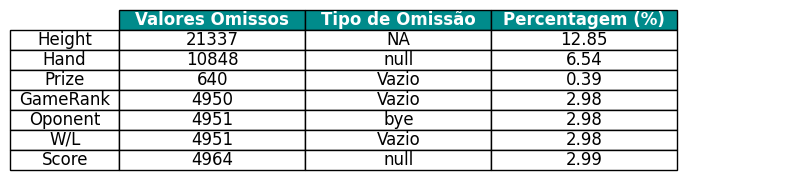

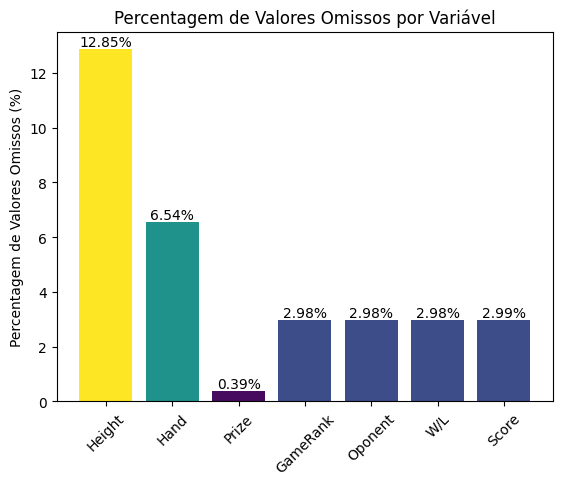

In [10]:
# Verificação de valores omissos

sum(df_usa['Height']=='NA')         #21337 

sum(df_usa['Hand']=='null')         #10848 

sum(df_usa['Prize']=='')            #640 

sum(df_usa['GameRank']=='')         # 4950

sum(df_usa['Oponent']=='')          # 1
sum(df_usa['Oponent']=='bye')       # 4950

sum(df_usa['WL']=='')               #4951

sum(df_usa['Score']=='null')        #4950 
sum(df_usa['Score']=='')            # 14

# As variáveis: PlayerName, Born, LinkPlayer, Tournament, Location, Date, Ground e GameRound não 
# contêm qualquer tipo de valores omissos

# Visualização
missing_values = {
    'Height': 21337, 'Hand': 10848, 'Prize': 640, 
    'GameRank': 4950, 'Oponent': 4951, 'W/L': 4951, 
    'Score': 4964
}

#missing_values_all_var = {
 #   'Height': 21337, 'Hand': 10848, 'Prize': 640, 
  #  'GameRank': 4950, 'Oponent': 4951, 'W/L': 4951, 
   # 'Score': 4964, 'PlayerName': 0, 'Born': 0, 'LinkPlayer': 0, 'Tournament': 0, 'Location': 0, 'Date': 0, 'Ground': 0, 'GameRound': 0 }

total_linhas = 165985  # Total de dados para cada variável
percentages = [v / total_linhas * 100 for v in missing_values.values()]
percentages = [round(p, 2) for p in percentages]
percentages

#Tabela Valores Omissos
# Dados da tabela
data_table = {
    'Variável': ['Height', 'Hand', 'Prize', 'GameRank', 'Oponent', 'W/L', 'Score'],
    'Valores Omissos': [21337, 10848, 640, 4950, 4951, 4951, 4964],
    'Tipo de Omissão': ['NA', 'null', 'Vazio', 'Vazio', 'bye', 'Vazio', 'null'],
    'Percentagem (%)': percentages
}

#data_table_all_var = data_table = {
#    'Variável': ['Height', 'Hand', 'Prize', 'GameRank', 'Oponent', 'W/L', 'Score','PlayerName', 'Born', 'LinkPlayer', 'Tournament', 'Location', 'Date', 'Ground', 'GameRound' ],
#    'Valores Omissos': [21337, 10848, 640, 4950, 4951, 4951, 4964, 0, 0, 0, 0, 0, 0, 0, 0,
#    'Tipo de Omissão': ['NA', 'null', 'Vazio', 'Vazio', 'bye', 'Vazio', 'null', '-', '-', '-', '-', '-', '-', '-', '-'],
#    'Percentagem (%)': percentages }

# Criar df para a tabela
df_table = pd.DataFrame(data_table)
df_table.set_index('Variável', inplace=True)  # Usar a coluna 'Variável' como índice

#df_table_all_var = pd.DataFrame(data_table_all_var)
#df_table_all_car.set_index('Variável', inplace=True)  # Usar a coluna 'Variável' como índice


# Criar uma figura para a tabela
fig, ax = plt.subplots(figsize=(10, 2)) 
ax.axis('tight')
ax.axis('off')
vis_table = table(ax, df_table, loc='center', cellLoc='center', colWidths=[0.2]*len(df_table.columns))
#vis_table_all_var = table(ax, df_table_all_var, loc='center', cellLoc='center', colWidths=[0.2]*len(df_table_all_var.columns))

# Personalizar header
vis_table.auto_set_font_size(False)
vis_table.set_fontsize(12)
vis_table.scale(1.2, 1.2)
for (i, key) in enumerate(df_table.columns):
    vis_table[(0, i)].set_facecolor('darkcyan')
    vis_table[(0, i)].set_text_props(weight='bold', color='white')

# Centralizar o conteúdo das células
for pos, cell in vis_table.get_celld().items():
    cell.set_text_props(verticalalignment='center', horizontalalignment='center')
   
# Salvar a imagem
plt.savefig('tabela_valores_omissos.png', dpi=300, bbox_inches='tight')
#plt.savefig('tabela_valores_omissos_all_var.png', dpi=300, bbox_inches='tight')

plt.show()


# Visualização de percentagens (barplot)

# Criar um mapa de cores baseado na percentagem de valores omissos, quanto maior a percentagem, mais escura a cor
max_percentage = max(percentages)  # Máximo de percentagem para normalização
colors = [plt.cm.viridis(p / max_percentage) for p in percentages]

fig, ax = plt.subplots()
bars = ax.bar(missing_values.keys(), percentages, color=colors)
ax.set_ylabel('Percentagem de Valores Omissos (%)')
ax.set_title('Percentagem de Valores Omissos por Variável')
# ax.set_ylim(0, 100)  # Define o limite do eixo Y até 100%, visualização mais accurate mas menos percetível
ax.bar_label(bars, fmt='%.2f%%')

plt.xticks(rotation=45)

# Salvar o gráfico como uma imagem PNG
#plt.savefig('missing_data_chart.png', bbox_inches='tight', dpi=300)

plt.show()

# Tratamento da Base de Dados

## Tratamento inicial do dataset

### Algum feature engineering feito inicialmente

#### Criação da variável MainHand e BackHand, a partir da separação da variável Hand

In [10]:
df_usa['MainHand'] = None
df_usa['BackHand'] = None
main_hand = list([])
back_hand = list([])


for row in df_usa.iterrows():
    main_hand.append(row[1][3].split(",")[0])
    back_hand.append(row[1][3].split(",")[-1])


df_usa['MainHand'] = main_hand
df_usa['BackHand'] = back_hand

#### Criação das variáveis Winner e Loser

In [11]:
df_usa['Winner'] = None
df_usa['Loser'] = None
winner_list = list([])
loser_list = list([])

for row in df_usa.iterrows():
    if row[1][13] == "L":
        winner_list.append(row[1][12])
        loser_list.append(row[1][0])
    else:
        winner_list.append(row[1][0])
        loser_list.append(row[1][12])
    
    
df_usa['Winner'] = winner_list
df_usa['Loser'] = loser_list

#### Criar a variável 'CountryBorn' com o país de nascença do jogador

In [12]:
df_usa['CountryBorn'] = None
country = list([])


#print(df_usa.columns)
for row in df_usa.iterrows():
    #print(index)
    country.append(row[1][1].split(",")[-1])
    

df_usa['CountryBorn'] = country
df_usa['CountryBorn'] = df_usa['CountryBorn'].str.strip()


#utilização do ficheiro de websrapping para inserir os Países que faltavam
df_born_scrap = pd.read_csv('Scrap_Born.txt', sep='#', encoding = 'latin1')

#Criar a veriável CountryScrap
df_born_scrap['CountryScrap'] = None
valores = list([])

for row in df_born_scrap.iterrows():
    #print(index)
    valores.append(row[1][1].split("$")[1])

df_born_scrap['CountryScrap'] = valores

def link_Single(data):
    parts = data.split("/")  # Dividir a string em partes usando "/"
    substring = "/".join(parts[:7]) + "/player-activity?year=all&matchType=Singles"
    return substring

# Aplicar a função link_Single a cada elemento da coluna 'LinkPlayer' e atualizar a coluna
df_born_scrap['LinkPlayer'] = df_born_scrap['LinkPlayer'].apply(link_Single)

links_sem_pais = list(df_born_scrap['LinkPlayer'])
novo_pais = list(df_born_scrap['CountryScrap'])

for i, link in enumerate(links_sem_pais):
    df_usa.loc[df_usa['LinkPlayer'] == link, 'CountryBorn'] = novo_pais[i]



#Uniformização do Born
df_usa['CountryBorn'] = df_usa['CountryBorn'].str.strip()

df_usa.loc[df_usa['CountryBorn'].isin(['Aschaffenburg','Bad Hersfeld','Bergisch - Gladbach','Berlin','Bonn','Bremen',
                  'Cologne','Duesseldorf','Duisburg','Essen','Forchheim','Friedrichshafen','GER',
                  'Grenoble','Hamburg','Muenster','Munich','Nuremberg','Nurtingen','Paderborn',
                  'Reutlingen','Rheinfelden','Rotenburg','Starnberg','Traunstein',
                  'Wasserburg am Inn','Weiden in der Oberpfalz','Wiesbaden','Achim','�stringen',
                'T�bingen','M�nchengladbach','L�beck','Gr�felfing','schwaebisch hall','Itzehoe']),
         'CountryBorn'] = "Germany"
df_usa.loc[df_usa['CountryBorn'].isin(['Villeurbanne','Villeneuve saint Georges','Toulouse','Toulon','Suresnes',
                      'Sucy En Brie','Strasbourg','Saint-Nazaire','Saint-julien-en-genevois',
                      'Saint Jean de Maurienne','Saint Etienne','Rueil-Malmaison','Rennes','REIMS',
                      'Pouillon','Paris','PARIS','NIMES','Neuilly-sur-Seine','Montpellier',
                      'Marseille','Martigues','Lyon','Lons le saunier','Levallois','Leon',
                      'La Roche-sur-Yon','Grenoble','Gonesse','Frejus','Dunkerque','Clichy',
                      'carhaix plougher','Carcassonne','BREST','Boulogne-Sur-Mer','Bordeaux',
                      'Biarritz','Bayonne','BASTIA','Ajaccio','Aix-en-Provence','Le Pont-De-Beauvoisin',
                      'Nogent sur marne','Longjumeau','Céret','Sèvres']),'CountryBorn'] = "France"
df_usa.loc[df_usa['CountryBorn'].isin(['Aktau','Almaty','Shymkent','Temirtau']),'CountryBorn'] = 'Kazakhstan'
df_usa.loc[df_usa['CountryBorn'].isin(['Alatri','Ancona','Bologna','Busto Arsizio','Campobasso','Casalmaggiore',
                     'Civitavecchia','Como','Cuneo','Erice','Florence','Formia','Genova',
                     'Guastalla','L Aquila','Licata','Macerata','Messina','Monselice','Monterotondo',
                     'Novara','Pisa','Ravenna','Rimini','Roma','Rome','Rovato (Brescia)','Rovereto',
                     'San Benedetto del Tronto','Trieste','Turin','Urbino','Vercelli','Verona',
                     'vicenza','Ciriè','Milano','Sanremo','torino','Perugia','Pesaro','Pescara']),
         'CountryBorn'] = "Italy"
df_usa.loc[df_usa['CountryBorn'].isin(['Alexandria']),'CountryBorn'] = "Egypt"
df_usa.loc[df_usa['CountryBorn'].isin(['Algemesi','Barbastro','Barcelona','Burgos','Ciutadella de Menorca','Elche',
                     'Gijon','Jerez de la frontera','Las Palmas','Madrid','MADRID',
                     'Palma de Mallorca','Pamplona','San Sebastian','Sant Carles de la Rapita',
                     'Sant Carters de la Rapita,Spai','Santa Cruz de Bezana','Valencia','Adeje',
                     'Córdoba','Spai']),'CountryBorn'] = "Spain"
df_usa.loc[df_usa['CountryBorn'].isin(['Alphen aan den Rijn','Blaricum','Dirksland','Groningen','Haarlem',
                           'Heythuysen','Holland','Hoorn','Lelystad','Rotterdam','The Netherlands',
                           'Utrecht','Waalwijk']),'CountryBorn'] = "Netherlands"
df_usa.loc[df_usa['CountryBorn'].isin(['Altadena','Arlington','Atlanta','Atlanta Ga','Austin','Boca Raton','Boston',
                   'Bradenton','CA','CA USA','Calhoun','California','Chandler Arizona','Colorado Springs',
                   'Concord','CT','D.C.','DC','Des Moines','Does Moines','durham nc USA','Fargo',
                   'FL','Florida','Fresno','GA','Galveston','Greenbrae','Hackensack','Hershey',
                   'HI','Hilton Head Island','Holtsville','Humboldt','IA','Idaho','IL','Illinois',
                   'IN','Indianapolis','Irvine','Irvington','Kalamazoo','KS','LA','Lithonia GA',
                   'Loma linda','MA','Maryland','MI','Miami','Michigan','Mineola','Murrieta','MN',
                   'MO','MS','NC','New York','New York City','New York New York','NJ','North Carolina',
                   'NY','OH','Ohio','Olathe','Olney','Omaha','OR','PA','PA U.S.A.','Palo Alto',
                   'Princeton','Princeton','Princeton NJ','Sacramento','Salem','San Antonio',
                   'San Diego','San Jose','Santa Ana','Santa Monica','Spokane','Stamford','Tarzana',
                   'Tennessee','Texas','Tulsa','TX','U.S.A','U.S.A.','US','USA','VA','WA',
                   'West Palm Beach','Winston Salem','WI','WV','Walnut Creek','Davis','TN','SC',
                   'AL','CO']),'CountryBorn'] = "United States"
df_usa.loc[df_usa['CountryBorn'].isin(['Andong','Anseong','Daejeon','Gangwonto','Korea (South)',
                                   'Kyunggi-do','Seoul','South Korea','Suwon','Korea',
                                   'Busan, Korea','Dae Gu, Korea','Gokseong, Korea',
                                   'Hoingsung, Korea','Ulsan, Korea','Jeju','AN SUNG']),
         'CountryBorn'] = "Korea, Republic of"
df_usa.loc[df_usa['CountryBorn'].isin(['Toamasina','Antananarivo']),'CountryBorn'] = "Madagascar"
df_usa.loc[df_usa['CountryBorn'].isin(['Tampico','Saltillo','Queretaro','Apizaco','Acapulco']),
         'CountryBorn'] = "Mexico"
df_usa.loc[df_usa['CountryBorn'].isin(['Villa Gesell','Villa Maria Cordoba','Santa Fe','Rauch','Merlo','Mendoza',
                         'Marco Juarez','La Plata','Corrientes','C�rdoba','Capital Federal',
                         'Buenos Aires','Buenos aires','Bragado','Balcarce','Bahia Blanca',
                         'Argentin','ARG','Mar del Palta','Chascomús','Ciudad Autónoma de Buenos',
                         'ARG']),'CountryBorn'] = "Argentina"
df_usa.loc[df_usa['CountryBorn'].isin(['Asenovgrad','Dimitrovgrad','Sliven','Sofia','VARNA']),
         'CountryBorn'] = "Bulgaria"
df_usa.loc[df_usa['CountryBorn'].isin(['Auckland','New Plymouth','Wellington']),'CountryBorn'] = "New Zealand"
df_usa.loc[df_usa['CountryBorn'].isin(['Bacau','Bucharest','Bucuresti','Constanta','Cugir','Iasi','Pitesti',
                       'Ploiesti','Rm Valcea','Rumania','Hyvinkää']),'CountryBorn'] = "Romania"
df_usa.loc[df_usa['CountryBorn'].isin(['Budapest','Baja']),'CountryBorn'] = "Hungary"
df_usa.loc[df_usa['CountryBorn'].isin(['Bangkok']),'CountryBorn'] = "Thailand"
df_usa.loc[df_usa['CountryBorn'].isin(['Minsk','Barakovichi']),'CountryBorn'] = "Belarus"
df_usa.loc[df_usa['CountryBorn'].isin(['Barquisimeto','Caracas','Venezuela']),'CountryBorn'] = "Venezuela, Bolivarian Republic of"
df_usa.loc[df_usa['CountryBorn'].isin(['Belfast','Birmingham','Chelmsford','Chichester','Colchester','England','Essex',
                  'Exeter','Great Britain','Hampstead','Hatfield','High Wycombe','KINGSTON UPON THAMES',
                  'Leeds','London','Newcastle upon Tyne','Newmarket','Newport','Norfolk','Norwich',
                  'Nottingham','Penrith','Redditch','Scotland','St Albans','Stevenage','Sunderland',
                  'Taunton','Great Britain']),'CountryBorn'] = "United Kingdom"
df_usa.loc[df_usa['CountryBorn'].isin(['Belgrade','Novi Sad']),'CountryBorn'] = "Serbia"
df_usa.loc[df_usa['CountryBorn'].isin(['Belo Horizonte','BRA','Brasil','Brasilia','Campinas','Curitiba','Mato Grosso',
                      'Pernambuco','Porto Alegre','Santa Cruz do Sul','Sao Paulo','Sao paulo',
                      'Sertaozinho','Uruguaiana','Londrina- Paraná','São Bernardo do Campo',
                      'S�o Paulo']),'CountryBorn'] = "Brazil"
df_usa.loc[df_usa['CountryBorn'].isin(['Visakhapatnam','Pune','Mysore','Mumbai','MUMBAI','Kolkata','Haryana',
                     'Hyderabad','Delhi','Chennai','Bengaluru']),'CountryBorn'] = "India"
df_usa.loc[df_usa['CountryBorn'].isin(['Bern','Bienne','Chur','Flawil','Frauenfeld','Geneva','Lugano','Wil']),
         'CountryBorn'] = "Switzerland"
df_usa.loc[df_usa['CountryBorn'].isin(['Bogota','Pereira']),'CountryBorn'] = "Colombia"
df_usa.loc[df_usa['CountryBorn'].isin(['Bolivia','La Paz','Santa Cruz','Trinidad']),
         'CountryBorn'] = "Bolivia"
df_usa.loc[df_usa['CountryBorn'].isin(['Sarajevo','Bosnia','Bosnia & Herzegovina','Bosnia-Herzegovina']),
         'CountryBorn'] = 'Bosnia and Herzegovina'
df_usa.loc[df_usa['CountryBorn'].isin(['Box Hill','Brisbane','Campbelltown','Gold Coast','Melbourne','Monto',
                         'Perth','Aust..','Port Lincoln','Port Pirie','S.A. Australia','South Australia',
                         'St Kilda East','Subiaco','Sydney','Traralgon','Schwaz','Aust.','AUS',
                         'Adelaide']),'CountryBorn'] = "Australia"
df_usa.loc[df_usa['CountryBorn'].isin(['Bratislava','Slovak','Slovak Republic','Trnava','Bratislava',
                                   'Czechoslovakia','Piestany','Czechoslovakia',
                                   'Povazska, Czechoslovakia']),
         'CountryBorn'] = "Slovakia"
df_usa.loc[df_usa['CountryBorn'].isin(['Bree','Diest','Gent','leuven','Namur','Roeselare','Verviers','Vilvoorde',
                       'Woluwe St Lambert','Li�ge']),'CountryBorn'] = "Belgium"
df_usa.loc[df_usa['CountryBorn'].isin(['Bridgetown']),'CountryBorn'] = "Barbados"
df_usa.loc[df_usa['CountryBorn'].isin(['Brno','Czech Republic','CZE','Czech Rep.','Czech Repbulic','Czech.','Klatovy',
                     'Kolin','Moravska Trebova','Ostrava','Pilsen','Prague','Valasske Mezirici',
                     'Hodonín','Hradec Králové','Olomouc, Czechoslovakia','Ostrava, Czechoslovakia',
                     'Plzen, Czechoslovakia','Prague, Czechoslovakia','Trebic, Czechoslovakia',
                     'Cz Republic','Czeck Republic','Czechia']),'CountryBorn'] = "Czech Republic"
df_usa.loc[df_usa['CountryBorn'].isin(['San Fernando','Cagayan de Oro City']),'CountryBorn'] = "Philippines"
df_usa.loc[df_usa['CountryBorn'].isin(['Calgary','Canda','Longueuil','Oakville',"St. John's",'Vancouver','Victoria',
                      'Montreal']),'CountryBorn'] = "Canada"
df_usa.loc[df_usa['CountryBorn'].isin(['Camboda']),'CountryBorn'] = "Cambodia"
df_usa.loc[df_usa['CountryBorn'].isin(['Cartago']),'CountryBorn'] = "Costa Rica"
df_usa.loc[df_usa['CountryBorn'].isin(['Changhwa','Chinese Taipei','Chunghua','keelung','New Taipei City','Tainan',
                     'Taipei','Taipei City','Taiwan']),'CountryBorn'] = "Taiwan, Province of China"
df_usa.loc[df_usa['CountryBorn'].isin(['Chernivtsi','Crimea','Dnepropetrovsk','dnepropetrovsk','Donetsk','Evpatoria',
                       'Kharkiv','Kiev','Krivoy Rog','Kyiv']),'CountryBorn'] = "Ukraine"
df_usa.loc[df_usa['CountryBorn'].isin(['chile','Iquique','Providencia','Punta Arenas','Santiago']),'CountryBorn'] = "Chile"
df_usa.loc[df_usa['CountryBorn'].isin(['CHINA','Dalian','HEILONGJIANG','Hunan','Jiangsu','Shanghai','sichuan suining',
                     'Tianjin','tianjin','Wuhan','Xin jiang','Hong Kong']),'CountryBorn'] = "China"
df_usa.loc[df_usa['CountryBorn'].isin(['Moldova','Chisinau']),'CountryBorn'] = "Moldova"
df_usa.loc[df_usa['CountryBorn'].isin(['Willemstad','Curacao']),'CountryBorn'] = "Curaçao"
df_usa.loc[df_usa['CountryBorn'].isin(['Santo Domingo','Santiago De Los Caballeros','Puerto Plata',
                         'Dominican Rep.']),'CountryBorn'] = "Dominican Republic"
df_usa.loc[df_usa['CountryBorn'].isin(['Dubai']),'CountryBorn'] = "United Arab Emirates"
df_usa.loc[df_usa['CountryBorn'].isin(['dublin']),'CountryBorn'] = "Ireland"
df_usa.loc[df_usa['CountryBorn'].isin(['Durban','Gauteng','Johanesburg','Port Elizabeth','Pretoria','RSA','Edenvale']),
         'CountryBorn'] = "South Africa"
df_usa.loc[df_usa['CountryBorn'].isin(['Iran','Esfahan']),'CountryBorn'] = "Iran, Islamic Republic of"
df_usa.loc[df_usa['CountryBorn'].isin(['Frederiksberg']),'CountryBorn'] = "Denmark"
df_usa.loc[df_usa['CountryBorn'].isin(['fukuoka','Fukushima','Hyogo','Hyougo','Ishikawa','Kanagawa','kanagawa',
                     'Nagoya','nishinomiya','Okayama','Osaka','Osaka Japan','Saitma','Shizuoka',
                     'Tokyo','Toyama','Yamagata','YOKOHAMA','Yokohama']),'CountryBorn'] = "Japan"
df_usa.loc[df_usa['CountryBorn'].isin(['Funchal','Guimaraes','Lisboa','Lisbon','Montijo','Peniche','Porto',
                        'Oliveira de Azemís']),'CountryBorn'] = "Portugal"
df_usa.loc[df_usa['CountryBorn'].isin(['Gatchina','Kazan','MOSCOW','Moscow','North-Ossetia','novosibirsk','Orenbourg',
                      'Ostrov','Penza','Rostov-on-Don','Russia','Saint-Petersburg','Samara',
                      'Taganrog','Tomsk','Ufa']),'CountryBorn'] = "Russian Federation"
df_usa.loc[df_usa['CountryBorn'].isin(['Gitega']),'CountryBorn'] = "Burundi"
df_usa.loc[df_usa['CountryBorn'].isin(['Grand Bahamas']),'CountryBorn'] = "Bahamas"
df_usa.loc[df_usa['CountryBorn'].isin(['Graz','Hall in Tirol','Klagenfurt','Linz','Portschach am Worthersee',
                       'Vienna','Wr.Neustadt','Schwaz']),'CountryBorn'] = "Austria"
df_usa.loc[df_usa['CountryBorn'].isin(['Guatemala City']),'CountryBorn'] = "Guatemala"
df_usa.loc[df_usa['CountryBorn'].isin(['Quito','Guayaquil']),'CountryBorn'] = "Ecuador"
df_usa.loc[df_usa['CountryBorn'].isin(['Petach Tikva','Haifa']),'CountryBorn'] = "Israel"
df_usa.loc[df_usa['CountryBorn'].isin(['Harare']),'CountryBorn'] = "Zimbabwe"
df_usa.loc[df_usa['CountryBorn'].isin(['Havana']),'CountryBorn'] = "Cuba"
df_usa.loc[df_usa['CountryBorn'].isin(['Turku','Helsinki']),'CountryBorn'] = "Finland"
df_usa.loc[df_usa['CountryBorn'].isin(['Tekirdag','Izmir','Istanbul','Turkiye']),'CountryBorn'] = "Turkey"
df_usa.loc[df_usa['CountryBorn'].isin(['Ivory Coast']),'CountryBorn'] = "Côte d'Ivoire"
df_usa.loc[df_usa['CountryBorn'].isin(['Kinshasa','Democratic Republic of the Congo']),
         'CountryBorn'] = "Democratic Republic of the Congo"
df_usa.loc[df_usa['CountryBorn'].isin(['Lima']),'CountryBorn'] = "Peru"
df_usa.loc[df_usa['CountryBorn'].isin(['Zielona Gora','Wroclaw','Warszawa','Warsaw','warsaw','Walbrzych',
                      'Tomaszow Mazowiecki','Priemysl','Ostrow Wlkp','LODZ','Lodz']),'CountryBorn'] = "Poland"
df_usa.loc[df_usa['CountryBorn'].isin(['Macedonia']),'CountryBorn'] = "Macedonia, the Former Yugoslav Republic of"
df_usa.loc[df_usa['CountryBorn'].isin(['maribor','Trbovlje']),'CountryBorn'] = "Slovenia"
df_usa.loc[df_usa['CountryBorn'].isin(['Namangan','Nukus','Tashkent']),'CountryBorn'] = "Uzbekistan"
df_usa.loc[df_usa['CountryBorn'].isin(['Noumea','Noum�a']),'CountryBorn'] = "New Caledonia"
df_usa.loc[df_usa['CountryBorn'].isin(['oran']),'CountryBorn'] = "Algeria"
df_usa.loc[df_usa['CountryBorn'].isin(['Port au Prince']),'CountryBorn'] = "Haiti"
df_usa.loc[df_usa['CountryBorn'].isin(['Saint Denis Reunion']),'CountryBorn'] = "Réunion"
df_usa.loc[df_usa['CountryBorn'].isin(['Saipan']),'CountryBorn'] = "Northern Mariana Islands"
df_usa.loc[df_usa['CountryBorn'].isin(['Samosir Island']),'CountryBorn'] = "Indonesia"
df_usa.loc[df_usa['CountryBorn'].isin(['San Juan']),'CountryBorn'] = "Puerto Rico"
df_usa.loc[df_usa['CountryBorn'].isin(['Schoelcher']),'CountryBorn'] = "Martinique"
df_usa.loc[df_usa['CountryBorn'].isin(['Vilnius','Siauliai']),'CountryBorn'] = "Lithuania"
df_usa.loc[df_usa['CountryBorn'].isin(['Split','split','Zagreb']),'CountryBorn'] = "Croatia"
df_usa.loc[df_usa['CountryBorn'].isin(['Tahiti']),'CountryBorn'] = "French Polynesia"
df_usa.loc[df_usa['CountryBorn'].isin(['Tallinn','Tartu']),'CountryBorn'] = "Estonia"
df_usa.loc[df_usa['CountryBorn'].isin(['Vietnam']),'CountryBorn'] = "Viet Nam"
df_usa.loc[df_usa['CountryBorn'].isin(['Windhoek']),'CountryBorn'] = "Namibia"
df_usa.loc[df_usa['CountryBorn'].isin(['Yerevan']),'CountryBorn'] = "Armenia"
df_usa.loc[df_usa['CountryBorn'].isin(['Eksj�','Stockholm','Lund','Kristianstad','Karlskrona','Hjo','Gothenburg']),
         'CountryBorn'] = "Sweden"
df_usa.loc[df_usa['CountryBorn'].isin(['Paysand�']),'CountryBorn'] = "Uruguay"
df_usa.loc[df_usa['CountryBorn'].isin(['Accra']),'CountryBorn'] = "Gana"

df_usa.loc[df_usa['CountryBorn'].isin(['Vietnam']),'CountryBorn'] = "Viet Nam"
df_usa.loc[df_usa['CountryBorn'].isin(['Windhoek']),'CountryBorn'] = "Namibia"
df_usa.loc[df_usa['CountryBorn'].isin(['Yerevan']),'CountryBorn'] = "Armenia"
df_usa.loc[df_usa['CountryBorn'].isin(['Eksj�','Stockholm','Lund','Kristianstad','Karlskrona','Hjo','Gothenburg']),
         'CountryBorn'] = "Sweden"
df_usa.loc[df_usa['CountryBorn'].isin(['Paysand�']),'CountryBorn'] = "Uruguay"
df_usa.loc[df_usa['CountryBorn'].isin(['Accra']),'CountryBorn'] = "Gana"

#Tratamento final do CountryBorn
df_usa['CountryBorn'] = df_usa['CountryBorn'].replace('', pd.NA)

sum(df_usa['CountryBorn'].isna())

4

### Remoção de Jogos Duplicados

In [13]:
df_no_mirrors = df_usa.drop(columns=["PlayerName", "Born", "Height", "Hand", "LinkPlayer", "GameRank",
                     "Oponent", "WL", "MainHand", "BackHand",
                     "Score", "CountryBorn"], axis=1)


print(df_no_mirrors)
print(len(df_no_mirrors))
print(len(df_no_mirrors.drop_duplicates()))


df_no_mirrors = df_no_mirrors.drop_duplicates()


df_usa_no_mirrors = df_usa.reindex(df_no_mirrors.index)
print(len(df_usa_no_mirrors))
print(df_usa_no_mirrors)

        Tournament              Location                     Date Ground  \
13         US Open  New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard   
14         US Open  New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard   
15         US Open  New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard   
16         US Open  New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard   
22         US Open  New York, NY, U.S.A.  2021.08.30 - 2021.09.12   Hard   
...            ...                   ...                      ...    ...   
1308575  U.S.A. F3            FL, U.S.A.  2012.01.23 - 2012.01.29   Clay   
1308576  U.S.A. F2            FL, U.S.A.  2012.01.16 - 2012.01.22   Clay   
1308577  U.S.A. F2            FL, U.S.A.  2012.01.16 - 2012.01.22   Clay   
1308578  U.S.A. F2            FL, U.S.A.  2012.01.16 - 2012.01.22   Clay   
1308580  U.S.A. F2            FL, U.S.A.  2012.01.16 - 2012.01.22   Clay   

               Prize       GameRound            Winner              Loser  
13       $2

### Criação das variáveis "Winner_gamerank" e "Loser_gamerank" 

In [14]:
mirrored_games_indexes = list(set(df_usa.index) - set(df_usa_no_mirrors.index))
mirrored_games = df_usa.loc[mirrored_games_indexes]

mirrored_temp = mirrored_games
df_no_mirrors_temp = df_usa_no_mirrors

mirrored_temp = mirrored_temp.drop(columns= ['Born', 'Height', 'Hand', 'LinkPlayer',
                                             'WL', 'Score', 'MainHand', 'BackHand', 'Winner', 
                                             'Loser', 'CountryBorn', 'CountryBorn'], axis=1)
df_no_mirrors_temp = df_no_mirrors_temp.drop(columns= ['Born', 'Height', 'Hand', 'LinkPlayer',
                                             'WL', 'Score', 'MainHand', 'BackHand', 'Winner',
                                            'Loser', 'CountryBorn'], axis=1)
#print(mirrored_temp.columns)
#print(df_no_mirrors_temp.columns)

list_players = mirrored_temp['PlayerName']
mirrored_temp['PlayerName'] = mirrored_temp['Oponent']
mirrored_temp['Oponent'] =list_players


test = df_no_mirrors_temp.merge(mirrored_temp, left_on=['PlayerName', 'Tournament', 'Location', 'Date', 'Ground', 'Prize',
       'GameRound', 'Oponent'], right_on=['PlayerName', 'Tournament', 'Location', 'Date', 'Ground', 'Prize',
       'GameRound', 'Oponent'], how='left')


test.columns = ['PlayerName', 'Tournament', 'Location', 'Date', 'Ground', 'Prize',
       'GameRound', 'Oponent_gamerank', 'Oponent', 'Player_gamerank']

df_no_mirrors_temp = df_usa_no_mirrors
test_v2 = df_no_mirrors_temp.merge(test, left_on=['PlayerName', 'Tournament', 'Location', 'Date', 'Ground', 'Prize',
       'GameRound', 'Oponent'], right_on=['PlayerName', 'Tournament', 'Location', 'Date', 'Ground', 'Prize',
       'GameRound', 'Oponent'], how='left')

df_usa = test_v2

In [15]:
df_usa['Winner_gamerank'] = None
df_usa['Loser_gamerank'] = None
winner_gamerank_list = list([])
loser_gamerank_list = list([])

for row in df_usa.iterrows():
    #ordered_names = sorted([row[1][0], row[1][12]])
    if row[1][13] == "L":
        winner_gamerank_list.append(row[1][20])
        loser_gamerank_list.append(row[1][21])
    else:
        winner_gamerank_list.append(row[1][21])
        loser_gamerank_list.append(row[1][20])
    

df_usa['Winner_gamerank'] = winner_gamerank_list
df_usa['Loser_gamerank'] = loser_gamerank_list

df_usa = df_usa.drop(columns=['Oponent_gamerank','Player_gamerank'])

df_usa['Winner_gamerank'] = df_usa['Winner_gamerank'].replace('', pd.NA)
df_usa['Loser_gamerank'] = df_usa['Loser_gamerank'].replace('', pd.NA)
df_usa['Winner_gamerank'] = pd.to_numeric(df_usa['Winner_gamerank'], errors='coerce')
df_usa['Loser_gamerank'] = pd.to_numeric(df_usa['Loser_gamerank'], errors='coerce')

#### Tratamento da variável 'Height'

[0, 3, 15, 163, 165, 168, 170, 173, 174, 175, 178, 180, 183, 185, 188, 191, 193, 196, 198, 200, 201, 203, 206, 208, 211, 510]


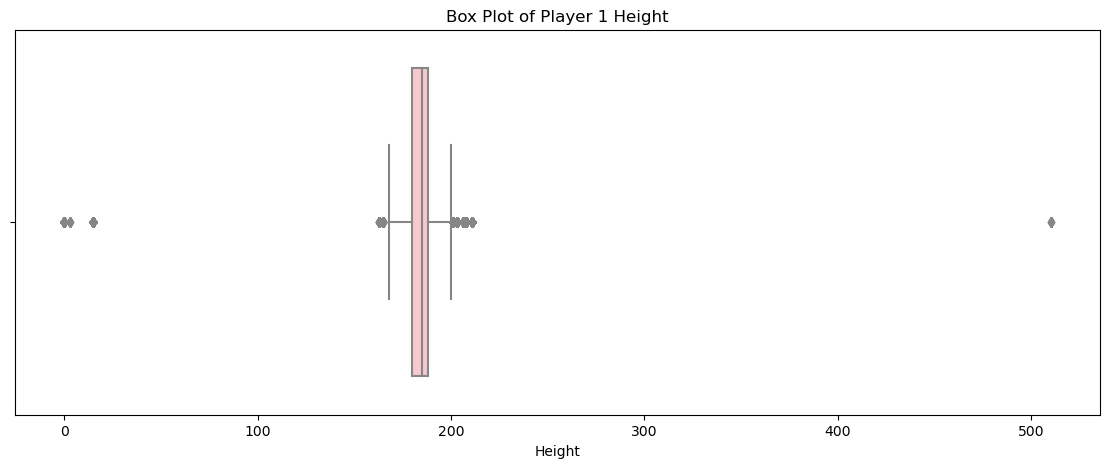

[188 198 185 193 196 183 170 211 191 208 175 178 180 173 203 201 168 'NA'
 206 200 163 174 165]


<IntegerArray>
[188, 198, 185, 193, 196, 183, 170, 211, 191, 208, 175, 178, 180, 173, 203,
 201, 168, 206, 200, 163, 174, 165]
Length: 22, dtype: Int64

In [16]:
# Filtrando os valores iguais a zero
lista_filtrada = [x for x in df_usa['Height'] if x != 'NA']

# Obtendo os valores únicos
valores_unicos = list(set(lista_filtrada))
print(valores_unicos)

#Vizualização da distribuição da variável
plt.figure(figsize=(14,5))
sns.boxplot(x=lista_filtrada, color = "pink")
plt.xlabel('Height')
plt.title('Box Plot of Player 1 Height')

plt.savefig('height_outliers.png', bbox_inches='tight', dpi=300)

plt.show()

#Contagem da ocorrência dos maiores outliers
len(df_usa[df_usa['Height']==510])  # 6 obs.      
len(df_usa[df_usa['Height']==3])    # 4         
len(df_usa[df_usa['Height']==0])    # 294        
len(df_usa[df_usa['Height']==15])   # 113         

#Nomes dos jogadores com alturas outliers    
df_usa.loc[df_usa['Height']==510,'PlayerName'].unique() #'Carlos Di Laura'
df_usa.loc[df_usa['Height']==3,'PlayerName'].unique()   #'Jorge Panta'
df_usa.loc[df_usa['Height']==15,'PlayerName'].unique()  #'Nathan Healey', 'Grant Stafford', 'Alfredo Perez','James Trotter', 'Johannes Ingildsen'
df_usa.loc[df_usa['Height']==0,'PlayerName'].unique()   #68 nomes distintos


#Height=510 (originalmente)
df_usa.loc[df_usa['PlayerName']=='Carlos Di Laura','LinkPlayer'].unique()  #assumimos que os 510 cm era engano e que a medida original de altura estava em pés, ou seja 5'10", o que, em centímetros é 177cm, no entanto a sua wikipédia diz que o jogador tem 175 cm, então vamos 
df_usa.loc[df_usa['PlayerName'] == 'Carlos Di Laura', 'Height'] = 175


#Height=3
df_usa.loc[df_usa['PlayerName']=='Jorge Panta','LinkPlayer'].unique()  
#Não encontramos informação sobre a altura verdadeira do jogador, em princípio a abordagem será de passar a valor omisso
df_usa.loc[df_usa['PlayerName'] == 'Jorge Panta', 'Height'] = 'NA'


#Height=15
df_usa.loc[df_usa['PlayerName']=='Nathan Healey','LinkPlayer'].unique() #através da wikipédia deduzimos que a altura real do jogador é 180cm
df_usa.loc[df_usa['PlayerName'] == 'Nathan Healey', 'Height'] = 180


df_usa.loc[df_usa['PlayerName']=='Grant Stafford','LinkPlayer'].unique() #através da wikipédia deduzimos que a altura real do jogador é 188cm
df_usa.loc[df_usa['PlayerName'] == 'Grant Stafford', 'Height'] = 188


df_usa.loc[df_usa['PlayerName']=='Alfredo Perez','LinkPlayer'].unique() #é erro no site ATP diz que a altura do jogador é 193
df_usa.loc[df_usa['PlayerName'] == 'Alfredo Perez', 'Height'] = 193


df_usa.loc[df_usa['PlayerName']=='James Trotter','LinkPlayer'].unique() #é erro no site ATP diz que a altura do jogador é 183
df_usa.loc[df_usa['PlayerName'] == 'James Trotter', 'Height'] = 183


df_usa.loc[df_usa['PlayerName']=='Johannes Ingildsen','LinkPlayer'].unique() #através da wikipédia deduzimos que a altura real do jogador é 193cm
df_usa.loc[df_usa['PlayerName'] == 'Johannes Ingildsen', 'Height'] = 193


#Height=0
df_usa.loc[df_usa['Height'] == 0, 'Height'] = 'NA'
    
    
print(df_usa['Height'].unique())

# Exclusão das linhas com NAs
df_usa = df_usa[df_usa['Height'] != 'NA']

# Tratamento final da altura
df_usa['Height'] = df_usa['Height'].replace('NA', pd.NA)
df_usa['Height'] = pd.to_numeric(df_usa['Height'], errors='coerce')
df_usa['Height'] = df_usa['Height'].astype('Int64')  


df_usa['Height'].unique()

#### Tratamento da variável 'Prize'

In [17]:
# Observação dos valores únicos da variável Prize
unique_prices = df_usa['Prize'].unique()
len(unique_prices)  #Existem 265 valores de prémios únicos


# Verificação das diferentes modedas dos prémios existentes (primeiro caracter de cada valor do preço)
primeiros_caracteres_unicos = set() 
for price in unique_prices:
    if price:
        primeiro_caractere = price[0]  
        primeiros_caracteres_unicos.add(primeiro_caractere)  

primeiros_caracteres_unicos
# Os valores do preço encontram-se em dólares ('$'), no entanto alguns apresentam um caracter desconhecido ('�')


# Valores únicos do preço com caracter desconhecido
vals_unknown = [price for price in unique_prices if price.startswith('�')]
vals_unknown   #Valores com caracter desconhecido: ['�50,000', '�360,000']


# Filtrar o DataFrame para incluir apenas os jogos que contêm caracteres desconhecidos: 
jogos_vals_unknown = df_usa.loc[df_usa['Prize'].isin(['�50,000', '�360,000'])]


#Ao observar o primeiro jogo com este caracter o oponente é "bye"
#bye: avanço automático de um jogador para a próxima rodada de um torneio sem enfrentar um adversário 
#!!!(Mencionar no relatório e tirar daqui)!!!


# Conversão dos caracteres desconhecidos para dólares (pois, após uma pesquisa, ambos os valores correspondem ao valor do torneio Tulsa e Newport no ano correspondente, respetivamente) 
# Substituir os caracteres '�' por '$' na coluna 'Prize'
df_usa['Prize'] = df_usa['Prize'].str.replace('�', '$')

# Tratamento final do Prize
df_usa['Prize'] = df_usa['Prize'].str.replace('$', '')  # Remover o símbolo do dólar
df_usa['Prize'] = df_usa['Prize'].str.replace(',', '')  # Remover vírgulas
df_usa['Prize'] = df_usa['Prize'].replace('', pd.NA)
df_usa['Prize'] = df_usa['Prize'].astype('Int64')  # Passar preço para tipo inteiro
df_usa['Prize'].unique()

<IntegerArray>
[27200000, 21656000,  4222190, 28619350,  6056280,  8359455,     <NA>,
 25282400,  5669360,  7972535,
 ...
    97500,    67500,    21000,     6500,     8000,    28000,    16500,
    22000,    13500,   105000]
Length: 263, dtype: Int64

#### Tratamento da variável 'Tournament'

In [18]:
#Verificar Nomes dos Torneios (Existência de torneios Mal escritos)
T_name_list = list(df_usa["Tournament"].unique())

def Tournament_checker(t_name):
    t_list = []
    for name in t_name:
        if name[0].lower() == 'h':
            t_list.append(name)
    t_list.sort() 
    return t_list

Tournament_checker(T_name_list)


def Tournament_checker2(t_name):
    t_list = []
    for name in t_name:
        if name.find("vs") != -1:
            t_list.append(name)
    t_list.sort() 
    return t_list

Tournament_checker2(T_name_list)


#Filtrar torneios
#bb = df_usa.loc[df_usa["Tournament"] == "Houston WCT", ["PlayerName", "Oponent", "Tournament", "Date", "Score", "GameRound"]] 

#bb2 = df_usa.loc[bb["GameRound"] == "Finals", ["PlayerName", "Oponent", "Tournament", "Date", "Score", "GameRound"]] 
bb = df_usa.loc[(df_usa["Tournament"] == "Houston WCT") & 
                         (df_usa["GameRound"] == "Finals"), 
                ["PlayerName", "Oponent", "Tournament", "Date", "Score", "GameRound"]]


#Mudar caracteres especiais e uniformização (1 vez)
df_usa["Tournament"].replace(to_replace=r'&amp', value='&', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r'1RD', value='Round 1', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r'1st Rd.', value='Round 1', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r'2nd RD', value='Round 2', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r'Rd 1', value='Round 1', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r'1st Rd.', value='Round 1', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r"Houston -1", value='Houston-1', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r';', value='', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r'Cary II', value='Cary-2', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r'U.S.A.', value='USA', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r'-A', value='A', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r'-B', value='B', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r'-C', value='C', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r'1st Round', value='Round 1', regex=True,inplace=True)
df_usa["Tournament"].replace(to_replace=r'1st RD', value='Round 1', regex=True,inplace=True)


# Mudar para Davis cup
Davis_cup_identifiers = list(["WG", "WORLD GROUP", "WGPO", "AGI", "DC", "QF", "AZI", "1RD", "SF", "G1", "G2", "FINAL",
                              "Round 1", "ARG V USA F", "AUS V USA F", "SUI V USA F"])

davis_cup_list = [tnm for tnm in df_usa["Tournament"].unique() if any(alias in tnm for alias in Davis_cup_identifiers)]

for each_t in list(df_usa["Tournament"].unique()):
    if each_t in davis_cup_list:
        df_usa.loc[df_usa['Tournament'] == each_t , 'Tournament'] = 'Davis Cup'

        
#Remover espaços grandes
df_usa["Tournament"].replace(to_replace=r'  ', value=' ', regex=True, inplace=True)


#davis_cup_list
len(list(df_usa["Tournament"].unique()))  

355

#### Tratamento da variável 'Score'

In [19]:
# Observar valores únicos
len(df_usa["Score"].unique()) # 6039

# Organizar a variável score de maior para menor
scores_descending = df_usa["Score"].sort_values(key=lambda x: x.str.len(), ascending=False).astype(str)
scores_descending

# Apresentar apenas as observações com uma ronda
string_len = scores_descending.str.len()
string_len

singular_round_games = scores_descending[string_len == 2]
singular_round_games

singular_round_observations = df_usa.reindex(singular_round_games.index)
singular_round_observations


# Apresentar apenas as observações com (RET)
games_ret = scores_descending[scores_descending.str.contains('RET', case=False, na=False)]
len(games_ret)    # 2116                                                          

games_ret_observations = df_usa.reindex(games_ret.index)
games_ret_observations 

#Apresentar apenas as observações com (-)
games_dash = scores_descending[scores_descending.str.contains('-', case=False, na=False)]
len(games_dash)  # 21                                                           

games_dash_observations = df_usa.reindex(games_dash.index)
games_dash_observations 


# Apresentar apenas as observações com (,)
games_comma = scores_descending[scores_descending.str.contains(',', case=False, na=False)]
len(games_comma) #13965                                                           

games_comma_observations = df_usa.reindex(games_comma.index)
games_comma_observations


def df_determine_anomalities(dat):
    df_teste = dat
    weird_list = []                  # Se existir elementos únicos                     
    weird_list2 = []                 # Se existir Traços
    weird_list3 = []                 # Se existir duplos
    for each in list(dat.index):                              
        elem = str(df_teste["Score"][each])
        elem_list = elem.split()
        for each_elem in elem_list:
            #print(elem_list)
            if each_elem in ["1", "2", "3", "4", "5", "6", "7", "8", "9", "0"]:
                weird_list.append((elem_list, each))
                continue
            if each_elem.find("-") != -1 :
                weird_list2.append((elem_list, each))
                continue
            if each_elem in ["11", "22", "33", "44", "55", "66", "77", "88", "99", "00"]:
                weird_list3.append((elem_list, each))
    print(f"Lista com scores de 1 númoer sozinhos: {weird_list} \n")
    print(f"Lista com tiebreaks: {weird_list2}\n")
    print(f"Lista com scores duplos: {weird_list3}\n")
    #escolher o que se quer retornar

df_determine_anomalities(df_usa)

# Tratar de Scores Mal imputados
df.loc[df['Score'] == '36 64 6 2', 'Score'] = '36 64 62'
df.loc[df['Score'] == '36 4', 'Score'] = '36 64'
df.loc[df['Score'] == '66 36 4', 'Score'] = '66 36 64'
df.loc[df['Score'] == '63 16 6', 'Score'] = '63 16 63'
df.loc[df['Score'] == '16 4', 'Score'] = '16 46'
df.loc[df['Score'] == '43 66 3', 'Score'] = '64 36 63'
df.loc[df['Score'] == '43 66 3', 'Score'] = '64 36 63'
df.loc[df['Score'] == '36 2', 'Score'] = '36 26'
df.loc[df['Score'] == '67,  64 36 4', 'Score'] = '67 63 64'

# Tratar de Tiebreaks mal imputados
df.loc[df['Score'] == '46 12-1057', 'Score'] = '67 10-12 57'
df.loc[df['Score'] == '46 15-138-1062 62', 'Score'] = '46 15-13 8-10 62 62'
df.loc[df['Score'] == '79 26 17-1563 68', 'Score'] = '79 26 17-15 63 68'
df.loc[df['Score'] == '8-1036', 'Score'] = '8-10 36 36'
df.loc[df['Score'] == '46 12-1057', 'Score'] = '67 10-12 57'
df.loc[df['Score'] == '11-1326', 'Score'] = '11-13 26'

# Tratar de Scores que são (RET) na realidade
df = df.loc[~df['Score'].str.contains('46 22', na=False)]
df = df.loc[~df['Score'].str.contains('76,  11', na=False)]
df = df.loc[~df['Score'].str.contains('63 11', na=False)]
df = df.loc[~df['Score'].str.contains('67,  22', na=False)]
df = df.loc[~df['Score'].str.contains('76,  11', na=False)]
df = df.loc[~df['Score'].str.contains('16 33 36', na=False)]


# Remover RETs, W/0, DEF
df_usa = df_usa.loc[~df_usa['Score'].str.contains('W/O', na=False)]
df_usa = df_usa.loc[~df_usa['Score'].str.contains('RET', na=False)]
df_usa = df_usa.loc[~df_usa['Score'].str.contains('DEF', na=False)]


# Remover vírgulas
df_usa["Score"].replace(to_replace=r',', value='', regex=True, inplace=True)


# Remover espaços grandes
df_usa["Score"].replace(to_replace=r'  ', value=' ', regex=True, inplace=True)


# Remover nulos e substituilos com ""
df_usa.loc[df_usa["Score"]==' ','Score']==''
df_usa["Score"].replace(to_replace='null', value='', inplace=True)
df_usa["Score"].replace('', pd.NA, inplace=True)

## ELIMINAR LINHAS COM VALORES NULOS NO SCORE

# Remover os Primeiros e últimos espaços
df_usa["Score"] = df_usa["Score"].str.strip()

list(set(df_usa['Score']))

Lista com scores de 1 númoer sozinhos: [(['36', '64', '6', '2'], 31492), (['36', '64', '6', '2'], 31492), (['36', '4'], 36248), (['67,', '64', '36', '4'], 42696), (['63', '16', '6'], 45460), (['43', '66', '3'], 59851), (['36', '2'], 73537)] 

Lista com tiebreaks: [(['36', '63', '10-12'], 21422), (['26', '61', '10-8'], 22158), (['64', '46', '7-10'], 28054), (['46', '64', '4-10'], 28146), (['76,', '57', '4-10'], 37511), (['76,', '60', '67,', '46', '8-10'], 45954), (['46', '15-138-1062', '62'], 76210), (['22', '30-0(RET)'], 76215), (['67', '64', '11-9'], 76616), (['79', '26', '17-1563', '68'], 79756), (['8-1036', '36'], 80542), (['63', '64', '10-8'], 81485), (['26', '64', '10-8'], 81813), (['64', '14-1275'], 84528), (['75', '8-1046'], 89049), (['8-1063', '62'], 89050), (['76', '36', '12-10'], 89074), (['8-1043', '(RET)'], 89919), (['11-1326'], 89923), (['57', '11-926'], 89932), (['36', '63', '10-6'], 90719)]

Lista com scores duplos: [(['75', '22', '(RET)'], 1880), (['75', '61', '11', '(R

['36 63 76 61',
 '62 36 57',
 '63 60 46 76',
 '46 76 36 63 46',
 '26 57 62 16',
 '63 76 57 46 46',
 '75 64 67 75',
 '75 06 16',
 '61 36 46 76 36',
 '26 36 64 26',
 '75 06 57',
 '67 63 63 76',
 '75 16 57',
 '62 76 57 06 76',
 '64 57 67 61 60',
 '36 63 16 64 64',
 '76 62 16 64',
 '36 57 64 57',
 '75 16 76',
 '64 64 57 76',
 '67 62 61 62',
 '60 06 63',
 '61 36 75',
 '46 62 36',
 '45 35 14',
 '26 61 16',
 '63 61 26 60',
 '64 57 67 64 63',
 '56 36',
 '75 67 64 26 63',
 '67 46 62 36',
 '62 16 62 64',
 '64 76 76',
 '63 60 64',
 '36 67 46',
 '60 06 62',
 '62 63 16 36 67',
 '67 63 64',
 '64 06 76 61',
 '64 61 63',
 '16 26 67',
 '63 46 67 16',
 '64 62 36 62',
 '67 57 64 67',
 '46 76 64 63',
 '36 63 64 63',
 '57 76 67',
 '63 26 16 63 26',
 '62 46 64 60',
 '46 63 75 26 76',
 '36 06 63 06',
 '16 60 61',
 '26 61 10-8',
 '75 62',
 '62 67 63 36 46',
 '63 16 62',
 '62 67 64',
 '64 60 64',
 '64 46 63 76',
 '63 64 36 75',
 '06 64 26',
 '75 75 64',
 '67 62 60',
 '36 63 76 46 06',
 '75 06 46',
 '64 76 46 7

### Criação de um dataset com todos os jogadores e as suas respetivas características

In [20]:
df_players = df_usa.drop(columns=["Hand", "Tournament","Location", "Date", "Ground", "Prize",
                                  "GameRound", "GameRank", "Oponent", "WL", "Score", "Winner", 
                                  "Loser", "Born", "Winner_gamerank", "Loser_gamerank"], axis=1)


# Verificar o número de observações depois de remover duplicates
# Deve  ser igual ao número de unique players
df_players.drop_duplicates().count() # 2164 observações         
df_players = df_players.drop_duplicates()
len(df_players["PlayerName"].unique()) # 2163 observações       


# Verificar quais os jogadores que têm exatamente o mesmo nome
duplicate_names = df_players[df_players.duplicated(subset='PlayerName')]
print(duplicate_names) # Martin Damm is the repeated name


# Verificar os links destes jogadores
filtered_df = df_players[df_players['PlayerName'] == "Martin Damm"]
for row in filtered_df.iterrows():
    print(row[1][2])
    
# Confirma-se que são 2 jogadores diferentes, mas com o mesmo nome.

        PlayerName  Height                                         LinkPlayer  \
72988  Martin Damm     188  https://www.atptour.com/en/players/martin-damm...   

           MainHand           BackHand     CountryBorn  
72988  Right-Handed   Unknown Backhand  Czech Republic  
https://www.atptour.com/en/players/martin-damm/d0dt/player-activity?year=all&matchType=Singles
https://www.atptour.com/en/players/martin-damm/d214/player-activity?year=all&matchType=Singles


### Aplicar novo dataset no df_usa, com informação extra dos jogadores

In [21]:
# Aplicar no dataframe de interesse (df_usa) a informação extra sobre cada jogador:
# Criar um backup de ambos os dataframes, para não perder informação
df_usa_temp = df_usa
df_players_temp = df_players


# Associar todas as informações relativas ao loser, ao dataframe df_usa_temp
df_combined = df_usa_temp.merge(df_players_temp, left_on="Loser", right_on="PlayerName", suffixes=('_usa', '_loser'), how='left')


# Associar todas as informações relativas ao loser, ao dataframe df_usa_temp
df_combined = df_combined.merge(df_players_temp, left_on="Winner", right_on="PlayerName", suffixes=('', '_winner'), how='left')

df_combined = df_combined.rename(columns={
    'PlayerName': 'PlayerName_winner',
    'Height': 'Height_winner',
    'LinkPlayer': 'LinkPlayer_winner',
    'MainHand': 'MainHand_winner',
    'BackHand': 'BackHand_winner',
    'CountryBorn': 'CountryBorn_winner'
})


# Para que seja possivel ver todas as colunas de uma só vez
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Remover informação repetida
df_combined = df_combined.drop(columns=['PlayerName_usa', "Height_usa",
                                       "Hand", "LinkPlayer_usa", "PlayerName_loser",
                                       "PlayerName_winner", "Oponent", "MainHand_usa", 
                                        "BackHand_usa", "CountryBorn_usa", "Born"], axis=1) 


df_combined.columns = ['Tournament', 'Location', 'Date', 'Ground', 'Prize', 'GameRound',
                       'GameRank', 'Original_wl', 'Score', 'Winner', 'Loser','Winner_gamerank',
                       'Loser_gamerank','Loser_height', 'Loser_link', 'Loser_mainhand', 
                       'Loser_backhand','Loser_countryBorn','Winner_height', 'Winner_link', 
                       'Winner_mainhand','Winner_backhand', 'Winner_countryBorn']

df_combined.columns

Index(['Tournament', 'Location', 'Date', 'Ground', 'Prize', 'GameRound',
       'GameRank', 'Original_wl', 'Score', 'Winner', 'Loser',
       'Winner_gamerank', 'Loser_gamerank', 'Loser_height', 'Loser_link',
       'Loser_mainhand', 'Loser_backhand', 'Loser_countryBorn',
       'Winner_height', 'Winner_link', 'Winner_mainhand', 'Winner_backhand',
       'Winner_countryBorn'],
      dtype='object')

### Feature Engeneering

In [22]:
df_treated = df_combined

#### Criação da variável "Duration_Days"

1. Divisão da Variável "Date" em "Date_Begin" e "Date_End"

In [23]:
# Identificar linhas com e sem intervalo de datas
intervalo_datas = df_treated['Date'].str.contains('-')
datas_unicas = df_treated['Date'].str.contains('-', na=False) == False

# Criar as colunas Date_Begin e Date_End com base na condição
df_treated['Date_Begin'] = df_treated.apply(
    lambda row: row['Date'].split('-')[0] 
        if intervalo_datas[row.name] 
        else row['Date'], axis=1
)

df_treated['Date_End'] = df_treated.apply(
    lambda row: row['Date'].split('-')[1] 
        if intervalo_datas[row.name] 
        else row['Date'], axis=1
)


# Verificação de anomalias no formato das datas
# definição de formato das datas
data_format = r'^\d{4}\.\d{2}\.\d{2}$'

# Aplicar a expressão regular para testar se as datas correspondem ao formato
matches_begin = df_treated['Date_Begin'].str.match(data_format)
matches_end = df_treated['Date_End'].str.match(data_format)

# Encontrar entradas que não correspondem ao padrão esperado
anomalias_begin = df_treated[~matches_begin]
anomalias_end = df_treated[~matches_end]

#print("Anomalias em Date_Begin:", anomalias_begin['Date_Begin'])
#print("Anomalias em Date_End:", anomalias_end['Date_End'])


# Correção das anomalias
# Verificação da causa das anomalias

# Hipótese: Existência de espaços extra
for coluna in ['Date_Begin', 'Date_End']:
    # Encontrar entradas com espaços múltiplos ou espaços no início/fim
    tem_espacos = df_treated[coluna].str.contains(r'^\s+|\s+$|\s{2,}', regex=True)
    print(f"Entradas com espaços extras em {coluna}:")
    print(df_treated.loc[tem_espacos, coluna].head())  # Mostra apenas algumas para verificação

    
# Remoção dos espaços extra
# Remover todos os espaços extras em colunas específicas
for coluna in ['Date_Begin', 'Date_End']:  # Lista de colunas de texto para limpar
    df_treated[coluna] = df_treated[coluna].str.replace(r'\s+', ' ', regex=True).str.strip()

    
# Verificação
# for coluna in ['Date_Begin', 'Date_End']:
#     # Encontrar entradas com espaços múltiplos ou espaços no início/fim
#     tem_espacos = df_treated[coluna].str.contains(r'^\s+|\s+$|\s{2,}', regex=True)
#     print(f"Entradas com espaços extras em {coluna}:")
#     print(df_treated.loc[tem_espacos, coluna].head())  # Mostra apenas algumas para verificação


# Transformação da data no tipo correto
# Conversão das colunas Date_Begin e Date_End para datetime
df_treated['Date_Begin'] = pd.to_datetime(df_treated['Date_Begin'], format='%Y.%m.%d')
df_treated['Date_End'] = pd.to_datetime(df_treated['Date_End'], format='%Y.%m.%d')


Entradas com espaços extras em Date_Begin:
0    2021.08.30 
1    2021.08.30 
2    2021.08.30 
3    2021.08.30 
4    2021.08.30 
Name: Date_Begin, dtype: object
Entradas com espaços extras em Date_End:
0     2021.09.12
1     2021.09.12
2     2021.09.12
3     2021.09.12
4     2021.09.12
Name: Date_End, dtype: object


2. Cálculo da diferença entre a data de inicio e de fim do torneio

In [24]:
# Calcular a duração em dias
df_treated['Tournament_Duration'] = (df_treated['Date_End'] - df_treated['Date_Begin']).dt.days

# Verificação
print(df_treated[['Date_Begin', 'Date_End','Tournament_Duration']].head())

# Tratamento e Limpeza

# Deteção de anomalias: Duração negativa
negative_durations = df_treated[df_treated['Tournament_Duration'] < 0]
len(negative_durations) # 27 valores com duração -1
print("Entradas com duração negativa:\n", negative_durations[['Tournament', 'Date', 'Date_Begin', 'Date_End', 'Tournament_Duration']]) 

#Correção dos valores Date_Begin e Date_End e duração negativa
conditions = (
    (df_treated['Tournament'] == 'New Haven') &
    (df_treated['Date_Begin'] == '1992-08-10') &
    (df_treated['Date_End'] == '1992-08-09')
)

# Atualizar as datas onde as condições são atendidas
df_treated.loc[conditions, 'Date_Begin'] = pd.to_datetime('1992-08-17')
df_treated.loc[conditions, 'Date_End'] = pd.to_datetime('1992-08-24')

#DUVIDAS SOBER ESTE CÓDIGO: SE ESTÁ A DAR VALORES DE DIFERENÇA NEGATIVA QUANDO DEVIA DAR 0, ENTÃO OS OUTROS VALORES TAMBÉM DEVEM ESTAR COM 1 DIA A MENOS

print(len(negative_durations)) # 0

  Date_Begin   Date_End  Tournament_Duration
0 2021-08-30 2021-09-12                   13
1 2021-08-30 2021-09-12                   13
2 2021-08-30 2021-09-12                   13
3 2021-08-30 2021-09-12                   13
4 2021-08-30 2021-09-12                   13
Entradas com duração negativa:
       Tournament                     Date Date_Begin   Date_End  \
55470  New Haven  1992.08.10 - 1992.08.09 1992-08-10 1992-08-09   
58796  New Haven  1992.08.10 - 1992.08.09 1992-08-10 1992-08-09   
60914  New Haven  1992.08.10 - 1992.08.09 1992-08-10 1992-08-09   
60915  New Haven  1992.08.10 - 1992.08.09 1992-08-10 1992-08-09   
61123  New Haven  1992.08.10 - 1992.08.09 1992-08-10 1992-08-09   
62098  New Haven  1992.08.10 - 1992.08.09 1992-08-10 1992-08-09   
62099  New Haven  1992.08.10 - 1992.08.09 1992-08-10 1992-08-09   
62100  New Haven  1992.08.10 - 1992.08.09 1992-08-10 1992-08-09   
62710  New Haven  1992.08.10 - 1992.08.09 1992-08-10 1992-08-09   
62711  New Haven  1992.08.10

#### Criação da variável Height_Dif

In [25]:
#Criar a variável com a diferença de alturas entre o winner e o loser
df_treated['height_dif'] = None
height_list = []


for row in df_treated.iterrows():
    try:
        height_list.append(int(row[1][18]) - int(row[1][13]))
    except:
        height_list.append(None)


#the difference is the height of the winner minus the height of the loser
df_treated['height_dif'] = height_list

#### Criação da variável alvo, "Nr_sets"

In [26]:
# Atribuição da variável
# criar a variável nr_sets
df_treated["Nr_sets"] = None
df_test = df_treated

nr_spaces_count = df_treated['Score'].str.count(' ')

# Modificar o número de sets para o valor equivalente
df_test["Nr_sets"] = nr_spaces_count
df_test["Nr_sets"] += 1
df_test['Nr_sets'].unique()    


for row in df_test.iterrows():
    print("score:")
    print(row[1][8])
    print("sets")
    print(row[1][27])

    
df_treated = df_test

df_treated['Nr_sets'] = df_treated['Nr_sets'].astype('category')

score:
46 62 64 46 62
sets
5
score:
67 63 63 62
sets
4
score:
62 63 62
sets
3
score:
61 67 62 61
sets
4
score:
57 62 62 63
sets
4
score:
46 46 46
sets
3
score:
16 63 62 62
sets
4
score:
63 63 61
sets
3
score:
67 63 64 62
sets
4
score:
61 64 61
sets
3
score:
16 63 64
sets
3
score:
46 64 76
sets
3
score:
62 64
sets
2
score:
<NA>
sets
<NA>
score:
63 61
sets
2
score:
76 64
sets
2
score:
63 64 62
sets
3
score:
64 76 61
sets
3
score:
64 61 64
sets
3
score:
63 36 36
sets
3
score:
63 64
sets
2
score:
76 61
sets
2
score:
75 61
sets
2
score:
<NA>
sets
<NA>
score:
61 57 36
sets
3
score:
75 46 61
sets
3
score:
76 62
sets
2
score:
<NA>
sets
<NA>
score:
46 46
sets
2
score:
76 62
sets
2
score:
<NA>
sets
<NA>
score:
67 75 01
sets
3
score:
63 76 63
sets
3
score:
63 64 64
sets
3
score:
63 64 62
sets
3
score:
63 64 63
sets
3
score:
62 63 63
sets
3
score:
61 63 67 62
sets
4
score:
63 36 64 60
sets
4
score:
64 64
sets
2
score:
64 36 63
sets
3
score:
75 46 63
sets
3
score:
26 63 64
sets
3
score:
64 76
sets


score:
67 76 67
sets
3
score:
<NA>
sets
<NA>
score:
26 63 36
sets
3
score:
76 26 76
sets
3
score:
<NA>
sets
<NA>
score:
76 64
sets
2
score:
63 75
sets
2
score:
<NA>
sets
<NA>
score:
76 67 36
sets
3
score:
75 46 63
sets
3
score:
61 76
sets
2
score:
61 75
sets
2
score:
67 64 64
sets
3
score:
64 46 46 46
sets
4
score:
76 63 36 57 76
sets
5
score:
63 64 76
sets
3
score:
61 76 76
sets
3
score:
76 57 76
sets
3
score:
76 26 57
sets
3
score:
63 67 62
sets
3
score:
62 64
sets
2
score:
46 76 76
sets
3
score:
76 63
sets
2
score:
63 76
sets
2
score:
46 46
sets
2
score:
76 76
sets
2
score:
46 36
sets
2
score:
75 67 75
sets
3
score:
64 64
sets
2
score:
46 67
sets
2
score:
61 76
sets
2
score:
76 26 57
sets
3
score:
76 75
sets
2
score:
63 16 76
sets
3
score:
75 64
sets
2
score:
16 64 62
sets
3
score:
67 63 64
sets
3
score:
61 76
sets
2
score:
64 61
sets
2
score:
57 63 67
sets
3
score:
46 76 76
sets
3
score:
46 63 62
sets
3
score:
36 63 26
sets
3
score:
64 64
sets
2
score:
26 75 63
sets
3
score:
64 75


score:
46 26
sets
2
score:
57 36
sets
2
score:
63 67 46
sets
3
score:
67 46
sets
2
score:
76 63
sets
2
score:
62 67 64 46 57
sets
5
score:
62 62
sets
2
score:
<NA>
sets
<NA>
score:
67 75 36
sets
3
score:
<NA>
sets
<NA>
score:
63 64
sets
2
score:
62 62 75
sets
3
score:
64 36 64
sets
3
score:
64 36 64
sets
3
score:
75 76
sets
2
score:
76 46 57
sets
3
score:
<NA>
sets
<NA>
score:
46 36
sets
2
score:
36 63 62
sets
3
score:
61 63
sets
2
score:
46 16 67
sets
3
score:
62 46 61 36 63
sets
5
score:
76 64 63
sets
3
score:
26 26
sets
2
score:
63 64
sets
2
score:
63 57 16
sets
3
score:
63 36 26 61 36
sets
5
score:
64 76
sets
2
score:
63 67 76
sets
3
score:
76 75
sets
2
score:
76 76
sets
2
score:
61 61
sets
2
score:
63 64
sets
2
score:
36 26
sets
2
score:
36 57 64 57
sets
4
score:
62 63
sets
2
score:
26 64 67
sets
3
score:
46 64 61
sets
3
score:
46 46
sets
2
score:
67 26
sets
2
score:
36 76 64
sets
3
score:
67 36
sets
2
score:
26 36 63 63 75
sets
5
score:
46 26
sets
2
score:
62 46 16
sets
3
score:


2
score:
26 63 67
sets
3
score:
67 62 63
sets
3
score:
76 46 62
sets
3
score:
64 57 62
sets
3
score:
62 63
sets
2
score:
36 76 64
sets
3
score:
63 67 63
sets
3
score:
64 36 36
sets
3
score:
76 36 64
sets
3
score:
67 26
sets
2
score:
76 36 75
sets
3
score:
63 26 76
sets
3
score:
36 75 61
sets
3
score:
26 62 62
sets
3
score:
75 63
sets
2
score:
57 62 75
sets
3
score:
62 62
sets
2
score:
36 63 64
sets
3
score:
75 67 36
sets
3
score:
64 64
sets
2
score:
64 63
sets
2
score:
36 63 60
sets
3
score:
67 61 64
sets
3
score:
64 61
sets
2
score:
62 61
sets
2
score:
62 61
sets
2
score:
46 57
sets
2
score:
67 75 46
sets
3
score:
62 61
sets
2
score:
<NA>
sets
<NA>
score:
76 67 46
sets
3
score:
75 64
sets
2
score:
<NA>
sets
<NA>
score:
57 67
sets
2
score:
64 64
sets
2
score:
62 76
sets
2
score:
46 63 64
sets
3
score:
<NA>
sets
<NA>
score:
36 36
sets
2
score:
<NA>
sets
<NA>
score:
67 26
sets
2
score:
<NA>
sets
<NA>
score:
64 67 16
sets
3
score:
64 64
sets
2
score:
<NA>
sets
<NA>
score:
26 36
sets
2
sco

sets
<NA>
score:
76 76
sets
2
score:
46 76 63
sets
3
score:
63 76
sets
2
score:
<NA>
sets
<NA>
score:
64 67 76
sets
3
score:
64 63
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
63 64
sets
2
score:
64 64 64
sets
3
score:
75 64 64
sets
3
score:
67 64 67
sets
3
score:
62 75
sets
2
score:
64 67 63
sets
3
score:
76 63
sets
2
score:
<NA>
sets
<NA>
score:
64 76
sets
2
score:
76 63
sets
2
score:
64 64
sets
2
score:
62 61
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
57 36 64 16
sets
4
score:
63 36 67 36
sets
4
score:
64 76 64
sets
3
score:
75 76 26 76
sets
4
score:
26 76 64
sets
3
score:
63 64
sets
2
score:
63 62
sets
2
score:
46 63 64
sets
3
score:
76 64
sets
2
score:
64 64
sets
2
score:
63 64
sets
2
score:
76 46 36
sets
3
score:
36 16
sets
2
score:
76 26 76
sets
3
score:
76 76
sets
2
score:
46 63 64
sets
3
score:
57 36 26
sets
3
score:
64 64
sets
2
score:
63 67 64
sets
3
score:
61 36 26
sets
3
score:
67 46
sets
2
score:
76 46 64
sets
3
score:
60 67 64
sets
3
score:
63

score:
61 46 67
sets
3
score:
64 64
sets
2
score:
76 63
sets
2
score:
76 63
sets
2
score:
26 46 76 67
sets
4
score:
36 61 67 63 61
sets
5
score:
46 63 64
sets
3
score:
62 63
sets
2
score:
76 62
sets
2
score:
36 36
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
36 64 64 57 36
sets
5
score:
63 36 75 16 64
sets
5
score:
57 63 76
sets
3
score:
63 76
sets
2
score:
64 75
sets
2
score:
76 61
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
67 76 26
sets
3
score:
75 75
sets
2
score:
<NA>
sets
<NA>
score:
36 57 61 64 36
sets
5
score:
64 67 63
sets
3
score:
36 63 63
sets
3
score:
<NA>
sets
<NA>
score:
36 26
sets
2
score:
36 67
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
16 06
sets
2
score:
36 36
sets
2
score:
61 62 64
sets
3
score:
36 46
sets
2
score:
<NA>
sets
<NA>
score:
63 60
sets
2
score:
26 67
sets
2
score:
62 62
sets
2
score:
<NA>
sets
<NA>
score:
64 63 61
sets
3
score:
36 57 46
sets
3
score:
36 64 61 64
sets
4
score:
64 64
sets
2
score:
63 76
sets
2
score

score:
46 63 75
sets
3
score:
63 63
sets
2
score:
46 46
sets
2
score:
36 46
sets
2
score:
62 61
sets
2
score:
57 67
sets
2
score:
26 36
sets
2
score:
63 76
sets
2
score:
61 26 75
sets
3
score:
64 63
sets
2
score:
46 26
sets
2
score:
62 16 67
sets
3
score:
62 62
sets
2
score:
62 62
sets
2
score:
46 57
sets
2
score:
64 76
sets
2
score:
46 46
sets
2
score:
62 62
sets
2
score:
26 36
sets
2
score:
16 63 61
sets
3
score:
64 60
sets
2
score:
36 61 36
sets
3
score:
76 63
sets
2
score:
61 67 46
sets
3
score:
36 63 64
sets
3
score:
46 57
sets
2
score:
76 63
sets
2
score:
64 64
sets
2
score:
64 75
sets
2
score:
63 64
sets
2
score:
62 62
sets
2
score:
63 62
sets
2
score:
61 61
sets
2
score:
62 62
sets
2
score:
62 60
sets
2
score:
64 63
sets
2
score:
75 62
sets
2
score:
76 61
sets
2
score:
62 62
sets
2
score:
46 46
sets
2
score:
64 64
sets
2
score:
75 62
sets
2
score:
61 63
sets
2
score:
64 62
sets
2
score:
63 61
sets
2
score:
63 26 36
sets
3
score:
64 63
sets
2
score:
63 63
sets
2
score:
<NA>
sets

score:
36 26
sets
2
score:
61 46 62
sets
3
score:
36 76 60
sets
3
score:
46 67
sets
2
score:
46 60 63
sets
3
score:
46 46
sets
2
score:
26 76 26
sets
3
score:
63 26 75
sets
3
score:
46 63 16
sets
3
score:
75 36 62
sets
3
score:
62 63
sets
2
score:
26 67
sets
2
score:
62 64
sets
2
score:
<NA>
sets
<NA>
score:
57 46
sets
2
score:
57 36
sets
2
score:
75 46 46
sets
3
score:
26 46
sets
2
score:
64 63
sets
2
score:
<NA>
sets
<NA>
score:
75 36 36
sets
3
score:
60 63
sets
2
score:
67 16
sets
2
score:
61 16 46
sets
3
score:
75 64
sets
2
score:
46 46
sets
2
score:
75 64
sets
2
score:
64 76
sets
2
score:
57 75 61
sets
3
score:
57 63 76
sets
3
score:
76 63
sets
2
score:
62 16 26
sets
3
score:
61 64
sets
2
score:
26 67
sets
2
score:
57 46
sets
2
score:
64 62
sets
2
score:
62 63
sets
2
score:
76 76
sets
2
score:
46 57
sets
2
score:
64 16 26
sets
3
score:
57 62 26
sets
3
score:
64 64
sets
2
score:
46 36 76 36
sets
4
score:
61 76
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
46 46
sets
2
s

score:
46 46
sets
2
score:
76 61
sets
2
score:
46 61 62
sets
3
score:
63 64
sets
2
score:
61 26 67
sets
3
score:
61 26 57
sets
3
score:
76 63
sets
2
score:
75 61
sets
2
score:
62 61
sets
2
score:
67 63 61
sets
3
score:
46 64 63
sets
3
score:
16 46
sets
2
score:
36 64 26
sets
3
score:
64 75
sets
2
score:
36 46
sets
2
score:
76 26 63
sets
3
score:
36 06
sets
2
score:
61 64
sets
2
score:
46 46
sets
2
score:
46 62 16
sets
3
score:
46 36
sets
2
score:
57 75 64
sets
3
score:
26 36
sets
2
score:
76 63
sets
2
score:
46 67
sets
2
score:
36 36
sets
2
score:
63 36 26
sets
3
score:
67 46
sets
2
score:
64 63
sets
2
score:
60 60
sets
2
score:
62 62
sets
2
score:
63 63
sets
2
score:
62 62
sets
2
score:
63 60
sets
2
score:
61 62
sets
2
score:
62 63
sets
2
score:
36 46
sets
2
score:
61 61
sets
2
score:
62 62
sets
2
score:
62 63
sets
2
score:
62 75
sets
2
score:
76 62
sets
2
score:
75 64
sets
2
score:
62 64
sets
2
score:
63 61
sets
2
score:
75 76
sets
2
score:
76 60
sets
2
score:
57 36
sets
2
score:
<NA

score:
60 62
sets
2
score:
36 36
sets
2
score:
16 75 75
sets
3
score:
75 46 67
sets
3
score:
26 60 62
sets
3
score:
64 64
sets
2
score:
46 16
sets
2
score:
46 26 64 63 60
sets
5
score:
63 62
sets
2
score:
67 36
sets
2
score:
16 46
sets
2
score:
62 36 26
sets
3
score:
36 61 62
sets
3
score:
16 36 64 36
sets
4
score:
76 75 62
sets
3
score:
57 06
sets
2
score:
61 46 63
sets
3
score:
36 26
sets
2
score:
64 76
sets
2
score:
63 63
sets
2
score:
64 16 62
sets
3
score:
62 62
sets
2
score:
26 57
sets
2
score:
76 76
sets
2
score:
36 60 26 26
sets
4
score:
36 62 26
sets
3
score:
<NA>
sets
<NA>
score:
64 36 61
sets
3
score:
<NA>
sets
<NA>
score:
46 67
sets
2
score:
75 61
sets
2
score:
63 46 36
sets
3
score:
26 46
sets
2
score:
62 75
sets
2
score:
67 36
sets
2
score:
36 16
sets
2
score:
46 64 62
sets
3
score:
76 76
sets
2
score:
76 62
sets
2
score:
64 64
sets
2
score:
76 63
sets
2
score:
36 36 36
sets
3
score:
64 62
sets
2
score:
06 75 26
sets
3
score:
76 63
sets
2
score:
46 46
sets
2
score:
75 16 

score:
16 67
sets
2
score:
46 46
sets
2
score:
64 46 57
sets
3
score:
36 16
sets
2
score:
36 36
sets
2
score:
06 36
sets
2
score:
26 26
sets
2
score:
62 64
sets
2
score:
63 75
sets
2
score:
67 67
sets
2
score:
26 06
sets
2
score:
64 36 57
sets
3
score:
63 61
sets
2
score:
57 26
sets
2
score:
<NA>
sets
<NA>
score:
63 63
sets
2
score:
<NA>
sets
<NA>
score:
16 67
sets
2
score:
<NA>
sets
<NA>
score:
61 61
sets
2
score:
36 46
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
62 26 26
sets
3
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
76 36 36
sets
3
score:
64 36 61
sets
3
score:
76 36 46
sets
3
score:
64 64
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
46 36
sets
2
score:
63 64
sets
2
score:
61 46 64
sets
3
score:
60 60
sets
2
score:
64 36 63
sets
3
score:
64 64
sets
2
score:
64 64
sets
2
score:
76 62
sets
2
score:
63 60
sets
2
score:
60 63
sets
2
score:
61 64
sets
2
score:
76 62
sets
2
score:
64 36 75
sets
3
score:
62 63
sets
2
score:
26 64 46
sets
3
score:
64 62

score:
46 64 46
sets
3
score:
67 26
sets
2
score:
63 62
sets
2
score:
62 46 63
sets
3
score:
64 64
sets
2
score:
64 36 26
sets
3
score:
67 06
sets
2
score:
64 60
sets
2
score:
57 75 63
sets
3
score:
63 76
sets
2
score:
46 36
sets
2
score:
67 76 16
sets
3
score:
61 62
sets
2
score:
46 46
sets
2
score:
36 62 63
sets
3
score:
64 46 57
sets
3
score:
75 64
sets
2
score:
61 64
sets
2
score:
62 63
sets
2
score:
76 64
sets
2
score:
61 61
sets
2
score:
75 63
sets
2
score:
46 63 36
sets
3
score:
63 61
sets
2
score:
63 63
sets
2
score:
62 60
sets
2
score:
64 61
sets
2
score:
63 75
sets
2
score:
64 62
sets
2
score:
64 63
sets
2
score:
46 63 63
sets
3
score:
<NA>
sets
<NA>
score:
26 46
sets
2
score:
46 46
sets
2
score:
61 62
sets
2
score:
63 64
sets
2
score:
75 57 61
sets
3
score:
61 62
sets
2
score:
63 57 63
sets
3
score:
63 46 16
sets
3
score:
64 63
sets
2
score:
46 67 16
sets
3
score:
16 16
sets
2
score:
61 62
sets
2
score:
26 62 16
sets
3
score:
36 64 62
sets
3
score:
63 62
sets
2
score:
67 76 

score:
60 64
sets
2
score:
64 62
sets
2
score:
64 36 63
sets
3
score:
76 75
sets
2
score:
64 46 64
sets
3
score:
26 64 62
sets
3
score:
62 62
sets
2
score:
16 67
sets
2
score:
06 36
sets
2
score:
36 60 76
sets
3
score:
64 64
sets
2
score:
64 61
sets
2
score:
64 64
sets
2
score:
36 16
sets
2
score:
61 36 26
sets
3
score:
16 67
sets
2
score:
64 61
sets
2
score:
62 36 36
sets
3
score:
62 63
sets
2
score:
63 61
sets
2
score:
16 62 57
sets
3
score:
64 36 63
sets
3
score:
61 60
sets
2
score:
36 46
sets
2
score:
60 61
sets
2
score:
46 64 64
sets
3
score:
61 64
sets
2
score:
57 16
sets
2
score:
16 06
sets
2
score:
64 75
sets
2
score:
46 36
sets
2
score:
62 60
sets
2
score:
63 63
sets
2
score:
61 60
sets
2
score:
36 61 36
sets
3
score:
61 46 62
sets
3
score:
36 26
sets
2
score:
26 63 63
sets
3
score:
62 46 75
sets
3
score:
06 26
sets
2
score:
63 64
sets
2
score:
64 64
sets
2
score:
57 46
sets
2
score:
46 62 46
sets
3
score:
76 76
sets
2
score:
63 62
sets
2
score:
76 16 16
sets
3
score:
63 64
se

score:
46 76 61
sets
3
score:
61 63
sets
2
score:
63 62
sets
2
score:
62 62
sets
2
score:
64 63
sets
2
score:
<NA>
sets
<NA>
score:
64 76
sets
2
score:
64 62
sets
2
score:
76 16 62
sets
3
score:
46 63 64
sets
3
score:
61 64
sets
2
score:
<NA>
sets
<NA>
score:
36 62 67
sets
3
score:
<NA>
sets
<NA>
score:
46 46 26
sets
3
score:
16 57
sets
2
score:
<NA>
sets
<NA>
score:
76 46 63
sets
3
score:
<NA>
sets
<NA>
score:
26 67 63 36
sets
4
score:
63 76
sets
2
score:
76 75
sets
2
score:
06 26
sets
2
score:
36 76 16
sets
3
score:
67 46
sets
2
score:
64 63
sets
2
score:
36 46
sets
2
score:
36 26
sets
2
score:
76 63
sets
2
score:
57 62 63
sets
3
score:
57 62 46
sets
3
score:
62 76
sets
2
score:
64 63
sets
2
score:
46 63 46
sets
3
score:
75 06 61
sets
3
score:
36 67
sets
2
score:
<NA>
sets
<NA>
score:
64 46 57
sets
3
score:
62 61
sets
2
score:
76 61
sets
2
score:
36 36
sets
2
score:
76 61
sets
2
score:
<NA>
sets
<NA>
score:
62 61
sets
2
score:
<NA>
sets
<NA>
score:
46 63 76
sets
3
score:
63 62
sets
2

score:
63 75
sets
2
score:
61 16 36
sets
3
score:
36 63 76
sets
3
score:
36 62 06
sets
3
score:
64 75
sets
2
score:
46 26 26
sets
3
score:
26 16
sets
2
score:
67 57
sets
2
score:
61 46 61 76
sets
4
score:
76 64
sets
2
score:
63 62
sets
2
score:
36 62 61
sets
3
score:
67 16
sets
2
score:
63 75
sets
2
score:
64 64
sets
2
score:
26 76 67
sets
3
score:
64 76
sets
2
score:
64 76 36 57 26
sets
5
score:
75 62
sets
2
score:
26 57
sets
2
score:
67 67
sets
2
score:
63 46 63
sets
3
score:
76 46 26
sets
3
score:
57 67
sets
2
score:
26 46
sets
2
score:
46 26
sets
2
score:
64 63
sets
2
score:
61 60
sets
2
score:
46 57
sets
2
score:
64 60
sets
2
score:
63 64
sets
2
score:
<NA>
sets
<NA>
score:
61 63
sets
2
score:
62 63
sets
2
score:
62 75
sets
2
score:
61 61
sets
2
score:
64 63
sets
2
score:
63 63
sets
2
score:
61 75
sets
2
score:
75 76
sets
2
score:
<NA>
sets
<NA>
score:
64 61
sets
2
score:
63 75
sets
2
score:
62 46 63
sets
3
score:
63 64
sets
2
score:
26 46
sets
2
score:
76 46 36
sets
3
score:
61 6

64 26 62
sets
3
score:
62 64
sets
2
score:
67 67
sets
2
score:
64 63
sets
2
score:
36 36
sets
2
score:
46 67
sets
2
score:
36 26
sets
2
score:
64 26 64
sets
3
score:
46 36
sets
2
score:
64 62
sets
2
score:
57 06
sets
2
score:
76 61
sets
2
score:
16 46
sets
2
score:
62 64
sets
2
score:
36 26
sets
2
score:
75 61
sets
2
score:
61 76
sets
2
score:
36 63 05
sets
3
score:
62 46 76
sets
3
score:
26 67
sets
2
score:
67 75 63
sets
3
score:
16 26
sets
2
score:
63 36 64
sets
3
score:
36 67
sets
2
score:
57 64 64
sets
3
score:
26 36
sets
2
score:
36 26
sets
2
score:
36 61 75
sets
3
score:
36 36
sets
2
score:
62 46 46
sets
3
score:
46 62 36
sets
3
score:
46 63 61
sets
3
score:
67 63 36
sets
3
score:
62 62
sets
2
score:
26 16
sets
2
score:
36 46
sets
2
score:
46 36
sets
2
score:
06 67
sets
2
score:
67 67
sets
2
score:
67 57
sets
2
score:
62 36 61
sets
3
score:
06 46
sets
2
score:
75 46 61
sets
3
score:
16 26
sets
2
score:
26 06
sets
2
score:
62 62
sets
2
score:
46 46
sets
2
score:
36 46
sets
2
score

score:
67 60 16
sets
3
score:
61 60
sets
2
score:
62 60
sets
2
score:
61 60
sets
2
score:
<NA>
sets
<NA>
score:
46 57
sets
2
score:
61 36 26
sets
3
score:
75 63
sets
2
score:
26 67
sets
2
score:
76 62
sets
2
score:
36 62 62
sets
3
score:
67 36
sets
2
score:
36 16
sets
2
score:
76 67 67
sets
3
score:
61 46 63
sets
3
score:
57 64 57
sets
3
score:
62 26 76
sets
3
score:
36 64 26
sets
3
score:
26 46
sets
2
score:
62 16 61
sets
3
score:
26 63 64
sets
3
score:
62 36 75
sets
3
score:
62 46 67
sets
3
score:
75 46 61
sets
3
score:
61 63
sets
2
score:
61 61
sets
2
score:
67 61 26
sets
3
score:
57 36
sets
2
score:
61 75
sets
2
score:
36 63 75
sets
3
score:
64 76
sets
2
score:
63 64
sets
2
score:
67 57
sets
2
score:
76 63 76
sets
3
score:
46 46
sets
2
score:
67 46
sets
2
score:
63 76
sets
2
score:
64 46 63
sets
3
score:
26 75 57
sets
3
score:
64 76
sets
2
score:
64 64
sets
2
score:
75 62
sets
2
score:
64 64
sets
2
score:
36 26
sets
2
score:
62 64
sets
2
score:
36 46
sets
2
score:
62 62
sets
2
scor

score:
64 16 63
sets
3
score:
61 75
sets
2
score:
75 36 36
sets
3
score:
76 67 60
sets
3
score:
<NA>
sets
<NA>
score:
61 60
sets
2
score:
57 64 26
sets
3
score:
61 61
sets
2
score:
36 26
sets
2
score:
64 62
sets
2
score:
63 36 67
sets
3
score:
46 63 46
sets
3
score:
46 26
sets
2
score:
46 16
sets
2
score:
57 57
sets
2
score:
62 62
sets
2
score:
26 26
sets
2
score:
06 36
sets
2
score:
46 61 75
sets
3
score:
36 26
sets
2
score:
26 06
sets
2
score:
16 62 60
sets
3
score:
64 62
sets
2
score:
16 36
sets
2
score:
26 26
sets
2
score:
06 46
sets
2
score:
16 26
sets
2
score:
26 06
sets
2
score:
67 67
sets
2
score:
63 62
sets
2
score:
61 46 63
sets
3
score:
16 46
sets
2
score:
36 64 63
sets
3
score:
36 64 67
sets
3
score:
36 06
sets
2
score:
36 36
sets
2
score:
46 57
sets
2
score:
<NA>
sets
<NA>
score:
46 64 64
sets
3
score:
75 62
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
46 63 75
sets
3
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
63 64 75
sets
3
score:
<NA>
sets
<NA>
scor

75 26 06
sets
3
score:
26 67
sets
2
score:
26 64 63
sets
3
score:
62 61
sets
2
score:
75 76
sets
2
score:
64 46 64
sets
3
score:
62 61
sets
2
score:
16 16
sets
2
score:
36 75 61
sets
3
score:
67 64 76
sets
3
score:
62 61
sets
2
score:
61 36 26
sets
3
score:
64 36 76
sets
3
score:
26 26
sets
2
score:
36 63 76
sets
3
score:
64 64
sets
2
score:
36 64 57
sets
3
score:
46 57
sets
2
score:
57 63 46
sets
3
score:
75 76
sets
2
score:
63 46 26
sets
3
score:
64 63
sets
2
score:
61 63
sets
2
score:
76 36 61
sets
3
score:
46 64 26
sets
3
score:
63 62
sets
2
score:
67 36
sets
2
score:
45 35 14
sets
3
score:
42 53 41
sets
3
score:
75 36 75
sets
3
score:
42 54 41
sets
3
score:
40 35 14 24
sets
4
score:
64 57 46
sets
3
score:
61 62
sets
2
score:
64 64
sets
2
score:
62 63
sets
2
score:
57 75 62
sets
3
score:
16 46
sets
2
score:
61 75
sets
2
score:
46 16
sets
2
score:
62 57 75
sets
3
score:
75 64
sets
2
score:
61 62
sets
2
score:
61 76
sets
2
score:
46 76 75
sets
3
score:
46 46
sets
2
score:
61 75
sets


score:
46 46
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
76 63 63
sets
3
score:
63 62 60
sets
3
score:
67 46
sets
2
score:
<NA>
sets
<NA>
score:
64 62
sets
2
score:
<NA>
sets
<NA>
score:
75 63
sets
2
score:
63 62
sets
2
score:
<NA>
sets
<NA>
score:
76 76
sets
2
score:
<NA>
sets
<NA>
score:
36 26
sets
2
score:
63 76
sets
2
score:
62 75
sets
2
score:
67 46
sets
2
score:
63 67 61
sets
3
score:
63 76 63
sets
3
score:
63 63
sets
2
score:
63 64
sets
2
score:
67 76 76
sets
3
score:
64 64
sets
2
score:
67 63 62
sets
3
score:
76 75
sets
2
score:
63 62
sets
2
score:
<NA>
sets
<NA>
score:
76 46 46
sets
3
score:
46 75 63 62
sets
4
score:
36 64 46
sets
3
score:
63 61
sets
2
score:
<NA>
sets
<NA>
score:
76 60
sets
2
score:
<NA>
sets
<NA>
score:
67 76 76
sets
3
score:
57 57
sets
2
score:
63 16 63
sets
3
score:
76 62 67 26 46
sets
5
score:
76 62
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
62 62
sets
2
score:
64 61
sets
2
score:
62 63
sets
2
score:
<NA>
sets
<NA>
score:
67 6

75 75
sets
2
score:
76 67 36
sets
3
score:
64 62
sets
2
score:
16 64 76
sets
3
score:
<NA>
sets
<NA>
score:
46 16
sets
2
score:
63 46 67
sets
3
score:
67 61 75
sets
3
score:
63 46 61
sets
3
score:
<NA>
sets
<NA>
score:
75 46 46 64 26
sets
5
score:
63 16 61
sets
3
score:
64 64
sets
2
score:
76 64
sets
2
score:
<NA>
sets
<NA>
score:
16 46 75 46
sets
4
score:
64 63 63
sets
3
score:
76 75 63
sets
3
score:
62 36 36 63 76
sets
5
score:
36 16 76 64 63
sets
5
score:
26 26
sets
2
score:
76 06 16
sets
3
score:
75 63
sets
2
score:
<NA>
sets
<NA>
score:
46 26
sets
2
score:
<NA>
sets
<NA>
score:
16 46
sets
2
score:
76 63
sets
2
score:
<NA>
sets
<NA>
score:
76 64
sets
2
score:
36 57
sets
2
score:
64 63
sets
2
score:
46 67 26
sets
3
score:
64 76
sets
2
score:
62 63
sets
2
score:
64 64
sets
2
score:
62 31
sets
2
score:
06 75 62
sets
3
score:
36 67
sets
2
score:
64 62
sets
2
score:
63 75
sets
2
score:
62 64
sets
2
score:
76 57 76
sets
3
score:
<NA>
sets
<NA>
score:
46 63 36
sets
3
score:
76 64
sets
2
s

4
score:
64 46 67 64 64
sets
5
score:
36 36
sets
2
score:
36 64 64
sets
3
score:
36 67
sets
2
score:
61 26 46 16
sets
4
score:
75 46 36
sets
3
score:
<NA>
sets
<NA>
score:
63 16 26
sets
3
score:
67 64 46
sets
3
score:
57 36
sets
2
score:
61 36 67
sets
3
score:
76 76
sets
2
score:
57 57 76 67
sets
4
score:
76 62 62
sets
3
score:
16 46
sets
2
score:
61 61
sets
2
score:
63 36 67
sets
3
score:
61 64
sets
2
score:
76 75
sets
2
score:
62 61
sets
2
score:
75 64
sets
2
score:
26 76 76 61
sets
4
score:
63 62
sets
2
score:
46 16
sets
2
score:
26 46
sets
2
score:
64 64
sets
2
score:
67 36
sets
2
score:
76 60
sets
2
score:
46 63 62
sets
3
score:
60 67 36
sets
3
score:
16 46 46
sets
3
score:
57 62 63 63
sets
4
score:
64 64 16 62
sets
4
score:
57 36
sets
2
score:
62 76
sets
2
score:
46 67
sets
2
score:
16 46
sets
2
score:
64 75
sets
2
score:
57 36
sets
2
score:
<NA>
sets
<NA>
score:
16 61 62
sets
3
score:
61 67 67
sets
3
score:
26 36 57
sets
3
score:
64 26 62 62
sets
4
score:
62 63 61
sets
3
score:


score:
26 75 64
sets
3
score:
36 36
sets
2
score:
64 61
sets
2
score:
67 46
sets
2
score:
75 63
sets
2
score:
36 36
sets
2
score:
61 36 63
sets
3
score:
46 36
sets
2
score:
67 64 76
sets
3
score:
67 16
sets
2
score:
36 46
sets
2
score:
63 64
sets
2
score:
76 62
sets
2
score:
46 76 64
sets
3
score:
63 26 36
sets
3
score:
16 57
sets
2
score:
63 64
sets
2
score:
63 62
sets
2
score:
36 63 46
sets
3
score:
67 26
sets
2
score:
06 16
sets
2
score:
63 64
sets
2
score:
64 62
sets
2
score:
63 46 36
sets
3
score:
64 61
sets
2
score:
67 64 61
sets
3
score:
16 36
sets
2
score:
36 76 46
sets
3
score:
26 16
sets
2
score:
26 63 63
sets
3
score:
63 26 16
sets
3
score:
36 36
sets
2
score:
26 61 64
sets
3
score:
16 63 63
sets
3
score:
61 62
sets
2
score:
<NA>
sets
<NA>
score:
61 62
sets
2
score:
60 64
sets
2
score:
61 46 62
sets
3
score:
75 62
sets
2
score:
62 64
sets
2
score:
64 36 67
sets
3
score:
46 64 61
sets
3
score:
60 62
sets
2
score:
16 67
sets
2
score:
62 62
sets
2
score:
64 36 57
sets
3
score:


64 76
sets
2
score:
36 06
sets
2
score:
26 26
sets
2
score:
67 26
sets
2
score:
76 61
sets
2
score:
67 75 76
sets
3
score:
76 76
sets
2
score:
62 60
sets
2
score:
63 64
sets
2
score:
63 63
sets
2
score:
62 63
sets
2
score:
46 63 61
sets
3
score:
61 67 64
sets
3
score:
46 06
sets
2
score:
67 62 76
sets
3
score:
64 67 36
sets
3
score:
63 64
sets
2
score:
62 26 26
sets
3
score:
61 63
sets
2
score:
64 63
sets
2
score:
76 75
sets
2
score:
06 26
sets
2
score:
62 36 63
sets
3
score:
63 26 75
sets
3
score:
63 63
sets
2
score:
57 62 62
sets
3
score:
46 76 64
sets
3
score:
46 46
sets
2
score:
46 76 76
sets
3
score:
75 64
sets
2
score:
62 62
sets
2
score:
64 63
sets
2
score:
67 75 26
sets
3
score:
75 64
sets
2
score:
63 64
sets
2
score:
36 60 62
sets
3
score:
61 76
sets
2
score:
64 62
sets
2
score:
36 57
sets
2
score:
26 26 16
sets
3
score:
57 62 36
sets
3
score:
36 26
sets
2
score:
67 46
sets
2
score:
64 75
sets
2
score:
26 26 16
sets
3
score:
64 16 06
sets
3
score:
62 75
sets
2
score:
36 62 63


score:
36 06
sets
2
score:
46 75 46
sets
3
score:
61 64
sets
2
score:
76 75
sets
2
score:
46 06
sets
2
score:
26 63 62
sets
3
score:
63 67 64
sets
3
score:
63 61
sets
2
score:
46 61 26
sets
3
score:
64 64
sets
2
score:
64 76
sets
2
score:
63 64
sets
2
score:
46 46
sets
2
score:
26 46
sets
2
score:
16 16
sets
2
score:
26 63 63
sets
3
score:
36 75 61
sets
3
score:
76 64
sets
2
score:
75 36 67
sets
3
score:
46 46
sets
2
score:
63 57 64
sets
3
score:
63 46 16
sets
3
score:
36 26
sets
2
score:
61 36 16
sets
3
score:
57 57
sets
2
score:
67 67
sets
2
score:
36 46
sets
2
score:
46 61 62
sets
3
score:
63 63
sets
2
score:
46 46 63 36
sets
4
score:
06 36
sets
2
score:
57 63 36
sets
3
score:
62 46 63
sets
3
score:
76 67 16
sets
3
score:
76 62
sets
2
score:
61 76
sets
2
score:
63 67 06
sets
3
score:
63 75
sets
2
score:
26 61 26
sets
3
score:
57 46 26
sets
3
score:
63 64
sets
2
score:
61 61
sets
2
score:
46 57
sets
2
score:
46 57
sets
2
score:
46 36
sets
2
score:
46 16
sets
2
score:
62 75
sets
2
sco

2
score:
62 36 76
sets
3
score:
63 57 26
sets
3
score:
63 64
sets
2
score:
76 63
sets
2
score:
61 63
sets
2
score:
61 62
sets
2
score:
63 76
sets
2
score:
61 62
sets
2
score:
46 46
sets
2
score:
63 62
sets
2
score:
64 67 75
sets
3
score:
16 62 64
sets
3
score:
26 62 61
sets
3
score:
76 67 67
sets
3
score:
26 63 63
sets
3
score:
63 63
sets
2
score:
64 46 62
sets
3
score:
76 61
sets
2
score:
62 61
sets
2
score:
60 62
sets
2
score:
06 36
sets
2
score:
64 62
sets
2
score:
36 57
sets
2
score:
61 60
sets
2
score:
64 57 46
sets
3
score:
16 62 62
sets
3
score:
46 63 75
sets
3
score:
75 36 61
sets
3
score:
62 62
sets
2
score:
46 75 26
sets
3
score:
26 64 76
sets
3
score:
64 36 46
sets
3
score:
76 36 76
sets
3
score:
46 63 63
sets
3
score:
46 16
sets
2
score:
60 60
sets
2
score:
61 75
sets
2
score:
26 46
sets
2
score:
26 67
sets
2
score:
06 26
sets
2
score:
63 62
sets
2
score:
76 26 63
sets
3
score:
62 76
sets
2
score:
36 46
sets
2
score:
62 62
sets
2
score:
63 61
sets
2
score:
60 62
sets
2
scor

score:
26 36
sets
2
score:
63 75
sets
2
score:
64 61
sets
2
score:
36 16
sets
2
score:
06 76 26
sets
3
score:
64 62
sets
2
score:
36 26
sets
2
score:
46 62 46
sets
3
score:
36 26
sets
2
score:
36 26
sets
2
score:
76 46 64
sets
3
score:
06 64 64
sets
3
score:
62 61
sets
2
score:
16 16
sets
2
score:
26 76 57
sets
3
score:
62 67 63
sets
3
score:
62 61
sets
2
score:
26 76 46
sets
3
score:
60 60
sets
2
score:
76 36 46
sets
3
score:
62 64
sets
2
score:
67 64 63
sets
3
score:
76 36 60
sets
3
score:
67 75 67
sets
3
score:
36 06
sets
2
score:
62 63
sets
2
score:
67 76 63
sets
3
score:
16 36
sets
2
score:
46 46
sets
2
score:
36 36
sets
2
score:
67 46
sets
2
score:
36 26
sets
2
score:
67 64 62
sets
3
score:
67 46
sets
2
score:
75 63
sets
2
score:
60 64
sets
2
score:
62 36 63
sets
3
score:
60 62
sets
2
score:
75 64
sets
2
score:
64 63
sets
2
score:
06 36
sets
2
score:
63 61
sets
2
score:
57 67
sets
2
score:
36 76 67 36
sets
4
score:
67 63 57
sets
3
score:
46 63 57
sets
3
score:
16 36
sets
2
score:

score:
57 62 63
sets
3
score:
64 60
sets
2
score:
67 67
sets
2
score:
64 16 26
sets
3
score:
76 60
sets
2
score:
06 26
sets
2
score:
36 46
sets
2
score:
62 76
sets
2
score:
46 36
sets
2
score:
57 76 62
sets
3
score:
62 63
sets
2
score:
63 61
sets
2
score:
36 26 57
sets
3
score:
76 61 60
sets
3
score:
63 46 62
sets
3
score:
16 63 63
sets
3
score:
36 36
sets
2
score:
46 46
sets
2
score:
36 06
sets
2
score:
26 36
sets
2
score:
61 62
sets
2
score:
64 67 26
sets
3
score:
16 36
sets
2
score:
36 16 76 63 46
sets
5
score:
76 63 60
sets
3
score:
61 26 63 63
sets
4
score:
46 67
sets
2
score:
64 06 63
sets
3
score:
26 36
sets
2
score:
36 62 64
sets
3
score:
76 63 26 16 26
sets
5
score:
62 46 67
sets
3
score:
64 62
sets
2
score:
76 63
sets
2
score:
62 63
sets
2
score:
63 67 62
sets
3
score:
64 75
sets
2
score:
75 62
sets
2
score:
75 63
sets
2
score:
63 36 26
sets
3
score:
46 46
sets
2
score:
63 26 64
sets
3
score:
61 64
sets
2
score:
61 63
sets
2
score:
36 67
sets
2
score:
61 67 36
sets
3
score:
6

score:
64 76
sets
2
score:
26 36
sets
2
score:
64 26 36
sets
3
score:
<NA>
sets
<NA>
score:
16 76 63
sets
3
score:
75 75
sets
2
score:
64 75
sets
2
score:
64 63
sets
2
score:
46 64 62
sets
3
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
16 64 26 67
sets
4
score:
62 62 63
sets
3
score:
67 63 57
sets
3
score:
<NA>
sets
<NA>
score:
67 64 36
sets
3
score:
36 57 46
sets
3
score:
67 63 61 63
sets
4
score:
64 75 63
sets
3
score:
67 36
sets
2
score:
76 63
sets
2
score:
<NA>
sets
<NA>
score:
62 62
sets
2
score:
36 26
sets
2
score:
64 67 62
sets
3
score:
76 36 36
sets
3
score:
<NA>
sets
<NA>
score:
46 63 46
sets
3
score:
36 16
sets
2
score:
<NA>
sets
<NA>
score:
26 46
sets
2
score:
<NA>
sets
<NA>
score:
36 64 61 46 36
sets
5
score:
16 63 63 62
sets
4
score:
36 46
sets
2
score:
60 75
sets
2
score:
67 36 16
sets
3
score:
63 62 64
sets
3
score:
57 57
sets
2
score:
64 67 63
sets
3
score:
36 64 61
sets
3
score:
64 64
sets
2
score:
16 26
sets
2
score:
64 46 62
sets
3
score:
16 46 46
sets
3
score:

score:
62 60
sets
2
score:
57 57
sets
2
score:
60 61
sets
2
score:
64 62
sets
2
score:
46 67
sets
2
score:
46 67
sets
2
score:
60 46 75
sets
3
score:
26 06
sets
2
score:
67 76 64 26 64
sets
5
score:
75 76
sets
2
score:
36 36
sets
2
score:
60 61
sets
2
score:
36 46
sets
2
score:
<NA>
sets
<NA>
score:
26 16
sets
2
score:
67 26
sets
2
score:
67 63 26
sets
3
score:
64 64
sets
2
score:
36 63 75
sets
3
score:
76 46 63
sets
3
score:
64 36 75
sets
3
score:
62 61
sets
2
score:
16 46
sets
2
score:
76 61
sets
2
score:
36 46
sets
2
score:
76 64
sets
2
score:
36 26
sets
2
score:
16 26
sets
2
score:
36 16
sets
2
score:
46 67
sets
2
score:
26 16
sets
2
score:
63 16 26
sets
3
score:
63 61
sets
2
score:
64 76
sets
2
score:
46 46
sets
2
score:
46 63 16
sets
3
score:
46 57
sets
2
score:
46 63 57
sets
3
score:
62 76
sets
2
score:
64 61
sets
2
score:
61 61
sets
2
score:
64 63
sets
2
score:
16 46
sets
2
score:
61 36 62
sets
3
score:
62 36 46
sets
3
score:
46 06
sets
2
score:
61 46 36
sets
3
score:
61 62
set

score:
63 36 76
sets
3
score:
67 16 36
sets
3
score:
<NA>
sets
<NA>
score:
46 26
sets
2
score:
62 62
sets
2
score:
36 67
sets
2
score:
75 67 67 64 57
sets
5
score:
60 75 62
sets
3
score:
75 61 63
sets
3
score:
63 67 67
sets
3
score:
62 62 64
sets
3
score:
75 62
sets
2
score:
63 64
sets
2
score:
64 36 64
sets
3
score:
62 62
sets
2
score:
61 26 46
sets
3
score:
76 75
sets
2
score:
67 76 62
sets
3
score:
64 63 60
sets
3
score:
62 46 63 63
sets
4
score:
<NA>
sets
<NA>
score:
63 36 26
sets
3
score:
60 63
sets
2
score:
<NA>
sets
<NA>
score:
46 46
sets
2
score:
76 64
sets
2
score:
<NA>
sets
<NA>
score:
26 64 36
sets
3
score:
64 46 61
sets
3
score:
63 63
sets
2
score:
62 76
sets
2
score:
46 46
sets
2
score:
62 63
sets
2
score:
61 75
sets
2
score:
63 76
sets
2
score:
62 62
sets
2
score:
46 63 36 46
sets
4
score:
62 62 62
sets
3
score:
62 76 63
sets
3
score:
62 61 64
sets
3
score:
63 76 62
sets
3
score:
67 64 62 64
sets
4
score:
61 63
sets
2
score:
62 63
sets
2
score:
63 61
sets
2
score:
76 75
s

score:
75 76
sets
2
score:
67 36
sets
2
score:
75 64
sets
2
score:
26 16
sets
2
score:
46 46
sets
2
score:
75 63
sets
2
score:
57 26
sets
2
score:
67 26
sets
2
score:
61 76
sets
2
score:
26 46
sets
2
score:
26 36
sets
2
score:
36 46
sets
2
score:
06 36
sets
2
score:
60 63
sets
2
score:
06 46
sets
2
score:
75 60
sets
2
score:
64 46 16
sets
3
score:
57 26
sets
2
score:
16 26
sets
2
score:
76 76
sets
2
score:
67 36
sets
2
score:
62 76
sets
2
score:
16 36
sets
2
score:
63 63
sets
2
score:
76 26 36
sets
3
score:
46 61 62
sets
3
score:
63 57 64
sets
3
score:
60 61
sets
2
score:
63 16 16
sets
3
score:
63 62
sets
2
score:
46 57
sets
2
score:
26 61 36
sets
3
score:
76 64
sets
2
score:
46 76 36
sets
3
score:
67 63 36
sets
3
score:
26 06
sets
2
score:
63 62
sets
2
score:
26 06
sets
2
score:
26 76 46
sets
3
score:
26 36
sets
2
score:
36 36
sets
2
score:
26 36
sets
2
score:
62 75
sets
2
score:
46 16
sets
2
score:
63 63
sets
2
score:
57 36
sets
2
score:
64 62
sets
2
score:
76 61
sets
2
score:
36 75 

score:
76 64 63
sets
3
score:
60 60 62
sets
3
score:
57 67
sets
2
score:
63 60
sets
2
score:
61 63
sets
2
score:
46 16
sets
2
score:
60 64
sets
2
score:
62 62
sets
2
score:
75 64
sets
2
score:
63 61 62
sets
3
score:
63 76
sets
2
score:
63 67 64
sets
3
score:
61 61
sets
2
score:
60 62
sets
2
score:
63 61
sets
2
score:
64 64
sets
2
score:
67 60 26
sets
3
score:
75 46 64
sets
3
score:
46 76 36
sets
3
score:
63 63
sets
2
score:
76 61
sets
2
score:
62 64
sets
2
score:
62 64
sets
2
score:
62 46 60
sets
3
score:
63 67 67
sets
3
score:
<NA>
sets
<NA>
score:
61 36 63 60
sets
4
score:
46 75 60 36 67
sets
5
score:
76 64 64
sets
3
score:
64 61 61
sets
3
score:
63 61 63
sets
3
score:
62 62 62
sets
3
score:
26 67
sets
2
score:
62 60
sets
2
score:
61 61
sets
2
score:
36 63 63
sets
3
score:
64 62
sets
2
score:
63 57 61
sets
3
score:
64 62
sets
2
score:
76 60
sets
2
score:
63 60
sets
2
score:
62 62
sets
2
score:
46 57
sets
2
score:
63 63
sets
2
score:
46 63 61
sets
3
score:
60 76
sets
2
score:
63 46 36

score:
67 46
sets
2
score:
63 67 61
sets
3
score:
63 67 57
sets
3
score:
76 46 63
sets
3
score:
63 63
sets
2
score:
63 63
sets
2
score:
46 63 76
sets
3
score:
36 46
sets
2
score:
26 36
sets
2
score:
63 67 46
sets
3
score:
36 46
sets
2
score:
57 26
sets
2
score:
46 67
sets
2
score:
76 67 26
sets
3
score:
61 76
sets
2
score:
63 36 26
sets
3
score:
67 36
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
76 64
sets
2
score:
46 60 46
sets
3
score:
<NA>
sets
<NA>
score:
62 62
sets
2
score:
62 64
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
26 61 61
sets
3
score:
<NA>
sets
<NA>
score:
46 63 46
sets
3
score:
46 63 60
sets
3
score:
<NA>
sets
<NA>
score:
26 63 46
sets
3
score:
61 57 64
sets
3
score:
36 26
sets
2
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
63 64
sets
2
score:
<NA>
sets
<NA>
score:
61 75
sets
2
score:
<NA>
sets
<NA>
score:
63 63
sets
2
score:
62 61
sets
2
score:
<NA>
sets
<NA>
score:
<NA>

score:
16 64 26
sets
3
score:
63 64
sets
2
score:
46 76 62
sets
3
score:
63 57 64
sets
3
score:
63 64
sets
2
score:
67 46 67
sets
3
score:
16 46
sets
2
score:
46 46 57
sets
3
score:
64 36 76
sets
3
score:
36 57
sets
2
score:
60 61
sets
2
score:
76 64
sets
2
score:
64 76
sets
2
score:
36 61 64
sets
3
score:
63 76
sets
2
score:
67 67
sets
2
score:
36 06
sets
2
score:
61 67 16
sets
3
score:
62 61
sets
2
score:
26 26
sets
2
score:
67 36 57
sets
3
score:
61 16 75 46 46
sets
5
score:
64 36 67 26
sets
4
score:
64 75 63
sets
3
score:
67 62 63
sets
3
score:
36 36
sets
2
score:
63 26 63
sets
3
score:
63 64
sets
2
score:
62 61 63
sets
3
score:
61 36 76 62
sets
4
score:
<NA>
sets
<NA>
score:
26 16
sets
2
score:
16 36
sets
2
score:
46 46
sets
2
score:
46 64 57
sets
3
score:
64 76
sets
2
score:
46 26
sets
2
score:
63 61
sets
2
score:
26 26
sets
2
score:
76 61
sets
2
score:
16 06
sets
2
score:
64 46 67
sets
3
score:
36 26
sets
2
score:
06 26
sets
2
score:
75 62
sets
2
score:
75 62
sets
2
score:
06 62

score:
64 63
sets
2
score:
26 36
sets
2
score:
60 61
sets
2
score:
<NA>
sets
<NA>
score:
64 63
sets
2
score:
76 63 67 46 16
sets
5
score:
64 26 62 63
sets
4
score:
62 26 16
sets
3
score:
60 61
sets
2
score:
63 76
sets
2
score:
<NA>
sets
<NA>
score:
64 57 62
sets
3
score:
62 63
sets
2
score:
63 61
sets
2
score:
62 64
sets
2
score:
76 61
sets
2
score:
26 62 60
sets
3
score:
62 75
sets
2
score:
62 75
sets
2
score:
64 63
sets
2
score:
76 60
sets
2
score:
26 16
sets
2
score:
60 46 63
sets
3
score:
64 76
sets
2
score:
36 46
sets
2
score:
62 64
sets
2
score:
36 57
sets
2
score:
36 46
sets
2
score:
64 36 36
sets
3
score:
36 63 26 06
sets
4
score:
75 67 75
sets
3
score:
67 36
sets
2
score:
<NA>
sets
<NA>
score:
62 64
sets
2
score:
36 76 64
sets
3
score:
62 75
sets
2
score:
16 76 60
sets
3
score:
46 63 06
sets
3
score:
61 36 26
sets
3
score:
75 63
sets
2
score:
57 63 61
sets
3
score:
63 64
sets
2
score:
46 26
sets
2
score:
26 16 36
sets
3
score:
36 36
sets
2
score:
62 46 61
sets
3
score:
62 62
s

score:
62 76
sets
2
score:
46 61 64
sets
3
score:
76 60
sets
2
score:
61 64
sets
2
score:
64 61 26 57 46
sets
5
score:
62 60 60
sets
3
score:
64 60 61
sets
3
score:
61 64
sets
2
score:
61 61
sets
2
score:
62 62
sets
2
score:
46 63 60 64
sets
4
score:
63 64
sets
2
score:
64 63
sets
2
score:
63 64
sets
2
score:
62 75
sets
2
score:
46 26
sets
2
score:
63 63
sets
2
score:
62 63
sets
2
score:
63 62
sets
2
score:
64 61
sets
2
score:
62 62
sets
2
score:
64 63
sets
2
score:
36 63 60
sets
3
score:
64 76
sets
2
score:
46 63 76
sets
3
score:
64 64
sets
2
score:
61 63
sets
2
score:
61 63
sets
2
score:
63 64
sets
2
score:
62 61
sets
2
score:
61 61
sets
2
score:
62 63
sets
2
score:
62 60
sets
2
score:
<NA>
sets
<NA>
score:
76 46 46 57
sets
4
score:
63 62 61
sets
3
score:
63 62 67 26 63
sets
5
score:
46 36 26
sets
3
score:
75 16 61
sets
3
score:
64 62
sets
2
score:
60 62
sets
2
score:
62 62
sets
2
score:
16 36
sets
2
score:
62 62
sets
2
score:
63 26 60
sets
3
score:
64 63
sets
2
score:
64 75
sets
2
s

score:
64 61
sets
2
score:
57 46
sets
2
score:
61 64
sets
2
score:
61 60
sets
2
score:
62 75
sets
2
score:
16 61 16
sets
3
score:
06 46
sets
2
score:
60 61
sets
2
score:
61 63
sets
2
score:
46 36
sets
2
score:
75 76
sets
2
score:
46 64 57
sets
3
score:
16 61 67
sets
3
score:
36 26 36
sets
3
score:
60 61 67 61
sets
4
score:
46 57
sets
2
score:
62 36 63
sets
3
score:
26 46
sets
2
score:
62 60
sets
2
score:
61 36 26
sets
3
score:
64 63
sets
2
score:
26 76 16
sets
3
score:
64 62
sets
2
score:
64 62
sets
2
score:
62 62
sets
2
score:
63 62
sets
2
score:
36 16
sets
2
score:
61 62
sets
2
score:
36 67
sets
2
score:
67 62 63
sets
3
score:
26 46
sets
2
score:
36 46
sets
2
score:
26 67
sets
2
score:
64 64
sets
2
score:
60 63
sets
2
score:
75 63
sets
2
score:
63 62
sets
2
score:
36 64 76
sets
3
score:
67 63 60
sets
3
score:
61 63
sets
2
score:
46 57
sets
2
score:
63 63
sets
2
score:
63 46 26
sets
3
score:
67 63 46 60 62
sets
5
score:
62 62 62
sets
3
score:
62 64 64
sets
3
score:
76 63
sets
2
score:

score:
36 46
sets
2
score:
46 67
sets
2
score:
64 46 46
sets
3
score:
63 61
sets
2
score:
<NA>
sets
<NA>
score:
46 57
sets
2
score:
26 64 64
sets
3
score:
26 62 61
sets
3
score:
62 61
sets
2
score:
64 63
sets
2
score:
62 62
sets
2
score:
63 26 62
sets
3
score:
06 46
sets
2
score:
36 57
sets
2
score:
67 64 16 46
sets
4
score:
<NA>
sets
<NA>
score:
61 64
sets
2
score:
<NA>
sets
<NA>
score:
36 46
sets
2
score:
26 64 63
sets
3
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
<NA>
sets
<NA>
score:
63 67 60
sets
3
score:
<NA>
sets
<NA>
score:
46 67
sets
2
score:
63 63
sets
2
score:
75 76
sets
2
score:
63 64
sets
2
score:
61 63
sets
2
score:
46 46
sets
2
score:
75 61
sets
2
score:
62 60
sets
2
score:
26 63 60
sets
3
score:
64 46 67
sets
3
score:
46 62 61
sets
3
score:
63 36 61
sets
3
score:
36 76 61
sets
3
score:
57 60 46
sets
3
score:
26 76 46
sets
3
score:
76 64
sets
2
score:
67 64 67
sets
3
score:
61 63
sets
2
score:
63 67 67
sets
3
score:
62 64
sets
2
score:
63 16 06
sets
3
score:
36 36

#### Criar a variável "Winner_birthdate" e "Loser_birthdate"

In [27]:
df_birth_date_scrap = pd.read_csv('BirthDateScrap.txt', sep='#', encoding = 'latin1', header=None)
df_birth_date_scrap.columns = ['LinkPlayer','Overview']

#Criar a veriável CountryScrap
df_birth_date_scrap['BirthDateScrap'] = None
valores = list([])

for row in df_birth_date_scrap.iterrows():
    #print(index)
    valores.append(row[1][1].split("$")[1])


df_birth_date_scrap['BirthDateScrap'] = valores

# Extrair a parte da data usando expressões regulares
df_birth_date_scrap['BirthDateScrap'] = df_birth_date_scrap['BirthDateScrap'].str.extract(r'(\d{4}.\d{2}.\d{2})')

def link_Single(data):
    try:
        parts = data.split("/")  # Dividir a string em partes usando "/"
        substring = "/".join(parts[:7]) + "/player-activity?year=all&matchType=Singles"
        return substring
    except:
        return pd.NA

# Aplicar a função link_Single a cada elemento da coluna 'LinkPlayer' e atualizar a coluna
df_birth_date_scrap['LinkPlayer'] = df_birth_date_scrap['LinkPlayer'].apply(link_Single)

links = list(df_birth_date_scrap['LinkPlayer'])
birth_date = list(df_birth_date_scrap['BirthDateScrap'])

# Adicionar as datas de nascimento ao dataset df_treated
for i, link in enumerate(links):
    df_treated.loc[df_treated['Winner_link'] == link, 'Winner_birthDate'] = birth_date[i]
    df_treated.loc[df_treated['Loser_link'] == link, 'Loser_birthDate'] = birth_date[i]

df_treated['Winner_birthDate'] = pd.to_datetime(df_treated['Winner_birthDate'], format='%Y.%m.%d')
df_treated['Loser_birthDate'] = pd.to_datetime(df_treated['Loser_birthDate'], format='%Y.%m.%d')

sum(df_treated['Winner_birthDate'].isna()) # 7739
sum(df_treated['Loser_birthDate'].isna())   # 15297
#Porque não temos informação sobre alguns jogadores, caso só apareçam como oponente em algumas linhas

18464

#### Criar a variável 'gamerank_dif'

In [28]:
df_treated['gamerank_dif'] = None
gamerank_list = []

for row in df_treated.iterrows():
    try:
        gamerank_list.append(int(row[1][11]) - int(row[1][12]))
    except:
        gamerank_list.append(pd.NA)

#the difference is the height of the winner minus the height of the loser
df_treated['gamerank_dif'] = gamerank_list
df_treated['gamerank_dif'] = pd.to_numeric(df_treated['gamerank_dif'], errors='coerce')

#### Criar a variável 'is_final', indicando se a ronda do jogo é uma final de torneio

In [29]:
for i in df_treated['GameRound'].unique():
    print(i)

# print(df_treated[df_treated['GameRound'] == 'Finals']['Nr_sets'].mean())
# print(df_treated[df_treated['GameRound'] == 'Semi-Finals']['Nr_sets'].mean())
# print(df_treated[df_treated['GameRound'] == 'Quarter-Finals']['Nr_sets'].mean())
# print(df_treated['Nr_sets'].mean())
## ESTE ÚLTIMO BLOCO DE CÓDIGO NÃO ESTÁ A FUNCIONAR (OU TIRAMOS OU CORRIJIMOS)


# a média de finais, semi finais e quartos de finais são mais elevados do que o nnúmero de sets default
# criar duas dummies, 1 para sempre que é final, e outra para quando é semi-final ou quarto de final
df_treated['is_final'] = 0
df_treated['is_semi_or_quarter'] = 0

# finais ou semi-finais
df_treated.loc[df_treated['GameRound'] == 'Finals', 'is_final'] = 1
df_treated.loc[df_treated['GameRound'] == 'Semi-Finals', 'is_semi_or_quarter'] = 1
df_treated.loc[df_treated['GameRound'] == 'Quarter-Finals', 'is_semi_or_quarter'] = 1

Semi-Finals
Round of 32
Round of 64
Round of 128
Quarter-Finals
Finals
Round of 16
Round Robin
2nd Round Qualifying
1st Round Qualifying
3rd Round Qualifying
Olympic Bronze
3rd/4th Place Match


#### Criar a variável 'age_dif'

In [30]:
# Para calcular a diferença de idades entre o winner e o loser
df_treated['age_dif'] = (df_treated['Winner_birthDate'] - df_treated['Loser_birthDate']).apply(lambda x: x.days / 365.25)
df_treated['age_dif'] = np.floor(df_treated['age_dif'])

df_treated['age_dif'].unique()

array([-10.,  -3.,  nan,  -9.,   8., -14.,  -8.,  -5.,  -4.,  -1.,  -6.,
        -7.,   0.,  -2.,   5.,   1.,   7.,   2.,   3.,   4.,   9.,  10.,
       -11.,  12.,   6.,  14., -15.,  11., -17., -12.,  15.,  13., -19.,
        16.,  18., -18., -13., -16.,  17.,  20., -20.,  28.,  19.,  26.,
        25.,  30., -25., -21., -24., -23.,  22.,  24., -22.,  21., -28.,
       -27.,  23.,  27., -26., -36.,  29., -32., -30., -33., -31., -29.,
        31.,  32., -35., -39., -41.,  33., -34.,  38.,  34., -38.,  35.,
        37.,  39., -37., -40.,  41.,  36.])

#### Criar a variável 'Prize_Inflation'

In [31]:
# Criar a coluna 'Year_Begin' (com os anos de início de cada torneio) 
#df_treated['Year_Begin'] = [date.split('-')[0] for date in df_treated['Date_Begin']]
df_treated['Year_Begin'] = df_treated['Date_Begin'].dt.year


#Obter o ano mais antigo de início de um torneio na bd
min(df_treated['Year_Begin'])  #o menor ano presente é 1914, pelo que este é o mais antigo 

#Obter o ano mais recente de início de um torneio na bd
max(df_treated['Year_Begin'])   #o maior ano é 2022, ou seja, o mais recente 

# Criar uma tabela com o ano de início, o nome do torneio e o prémio, sem duplicados 
tabela = df_treated[['Year_Begin', 'Tournament', 'Prize']].drop_duplicates()
#print(tabela)

#É possível que um mesmo torneio de ténis no mesmo ano realizado em datas diferentes apresente prémios diferentes, 
#portanto, não é incomum que os prémios variem para o mesmo torneio no mesmo ano. Após verificar
#no próprio website do ATP os prémios das diferentes datas dos torneios no mesmo ano mostrados anteriormente,
#estes estão corretos e são de facto distintos


##Calcular Prize_inflation usando CPI-U
#Leitura do ficheiro excel contendo Consumer Price Index for All Urban Consumers (CPI-U) from 1913 to 2024 
cols=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Avg','Dec-Dec','Avg-Avg']
df_usa_CPI_U = pd.read_csv('CPI-U.csv', sep=';', usecols=cols)
#Year: representa o ano ao qual os dados se referem
#Jan, Feb, ..., Dec: representam os valores do CPI-U para cada mês do ano correspondente 
#Avg: representa a média dos valores do CPI-U ao longo do ano
#Dec-Dec: representa a percentagem da variação do CPI-U de dezembro do ano atual em relação a dezembro do ano anterior
#Avg-Avg: representa a percentagem da variação da média dos valores do CPI-U em relação à média do ano anterior


#Verificar tipos de dados nas colunas
df_usa_CPI_U.dtypes

# Eliminar linhas 112 e 113
df_usa_CPI_U = df_usa_CPI_U.drop([112, 113])

#Passar valores omissos para "NA"
#df_usa_CPI_U = df_usa_CPI_U.fillna('NA')

#Alterar "Year" para o tipo inteiro
df_usa_CPI_U['Year'] = df_usa_CPI_U['Year'].astype(int)
#df_usa_CPI_U

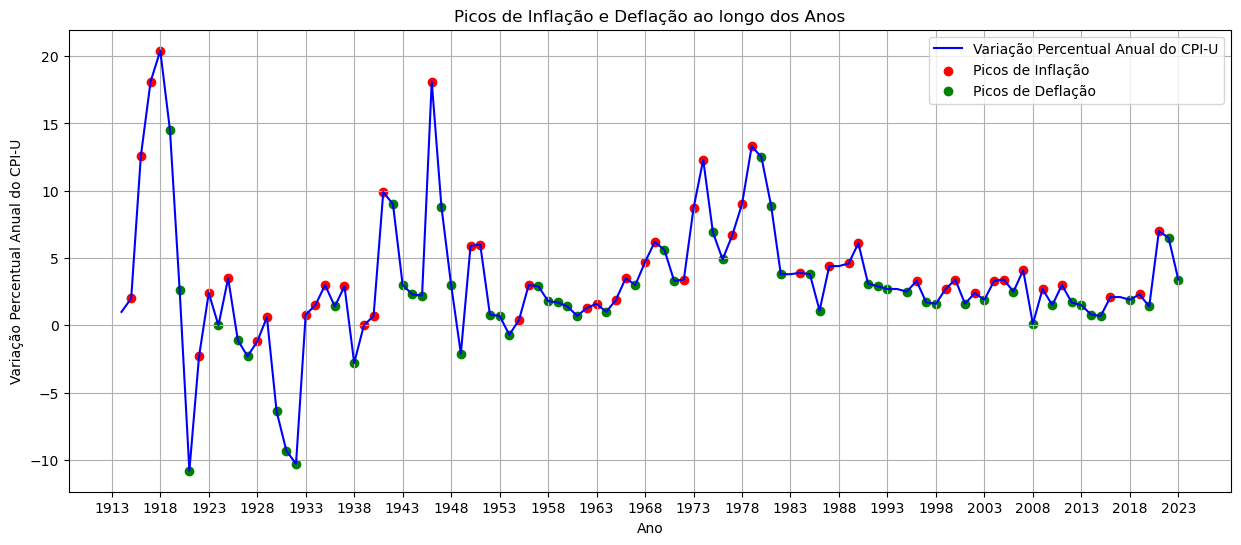

In [32]:
# Substituir '-' por NaN
df_usa_CPI_U['Dec-Dec'] = pd.to_numeric(df_usa_CPI_U['Dec-Dec'], errors='coerce')

# Identificação dos anos com variações percentuais positivas (inflação) e negativas (deflação)
anos_picos_inflacao = df_usa_CPI_U[df_usa_CPI_U['Dec-Dec'].diff() > 0]['Year']
anos_picos_deflacao = df_usa_CPI_U[df_usa_CPI_U['Dec-Dec'].diff() < 0]['Year']
# ráfico
plt.figure(figsize=(15, 6)) 
plt.plot(df_usa_CPI_U['Year'], df_usa_CPI_U['Dec-Dec'], color='blue', label='Variação Percentual Anual do CPI-U')
plt.scatter(anos_picos_inflacao, df_usa_CPI_U.loc[df_usa_CPI_U['Year'].isin(anos_picos_inflacao), 'Dec-Dec'], color='red', label='Picos de Inflação')
plt.scatter(anos_picos_deflacao, df_usa_CPI_U.loc[df_usa_CPI_U['Year'].isin(anos_picos_deflacao), 'Dec-Dec'], color='green', label='Picos de Deflação')
plt.xlabel('Ano')
plt.ylabel('Variação Percentual Anual do CPI-U')
plt.title('Picos de Inflação e Deflação ao longo dos Anos')
plt.xticks(range(min(df_usa_CPI_U['Year']), max(df_usa_CPI_U['Year'])+1, 5))  
plt.legend()
plt.grid(True)
plt.show()

#Cada ponto no gráfico indica a variação percentual do CPI-U em relação ao ano anterior
#Os pontos vermelhos indicam os anos com os maiores picos de inflação, onde os preços aumentaram significativamente em comparação com o ano anterior
#Os pontos verdes indicam os anos com os maiores picos de deflação, onde os preços diminuiram significativamente em comparação com o ano anterior

In [33]:
# Substituir '-' por NaN
#df_usa_CPI_U['Dec-Dec'] = pd.to_numeric(df_usa_CPI_U['Dec-Dec'], errors='coerce')

# Calcular a diferença percentual entre os valores do CPI-U em anos consecutivos
diff_cpi = df_usa_CPI_U['Dec-Dec'].diff()

# Criar listas dos anos com as maiores diferenças positivas (picos de inflação) e negativas (picos de deflação)
picos_inflacao = list(df_usa_CPI_U[diff_cpi > 0]['Year'])
picos_deflacao = list(df_usa_CPI_U[diff_cpi < 0]['Year'])

# Criar tabela com os anos em picos_inflacao e respetivo indice do CPU-I
tabela_inflacao = df_usa_CPI_U.loc[df_usa_CPI_U['Year'].isin(picos_inflacao), ['Year', 'Dec']]
# Renomear a coluna 'Dec' para 'CPI-U'
tabela_inflacao = tabela_inflacao.rename(columns={'Dec': 'CPI-U'})
#tabela_inflacao

# Criar tabela com os anos em picos_deflacao  e respetivo indice do CPU-I
tabela_deflacao = df_usa_CPI_U.loc[df_usa_CPI_U['Year'].isin(picos_deflacao), ['Year', 'Dec']]
# Renomear a coluna 'Dec' para 'CPI-U'
tabela_deflacao = tabela_deflacao.rename(columns={'Dec': 'CPI-U'})
#tabela_deflacao


# Criar um dicionário vazio para armazenar os valores  do CPI-U para os anos de 1913 a 2022 
cpi_u_dict = {}
# Iterar sobre as linhas do DataFrame
for index, row in df_usa_CPI_U.iterrows():
    # Extrair o ano e o valor do CPI-U da linha atual
    ano = row['Year']
    cpi_u = row['Dec']   
    # Verificar se o ano está no intervalo desejado (1913 a 2022)
    if 1913 <= ano <= 2022:
        # Adicionar o ano e o valor do CPI-U ao dicionário
        cpi_u_dict[ano] = cpi_u

# Verificar o dicionário 
#print(cpi_u_dict)


# Converter a coluna 'Year_Begin' em tabela para tipo inteiro
tabela['Year_Begin'] = tabela['Year_Begin'].astype(int)

# Calcular os prémios inflacionados para cada linha da tabela
for index, row in tabela.iterrows():
    # Extrair o ano da linha atual
    ano = row['Year_Begin']
    # Verificar se o CPI-U do ano em questão está disponível no dicionário
    if ano in cpi_u_dict:
        # Calcular o índice de inflação usando o CPI-U do ano em questão e do ano de 2022
        cpi_atual = cpi_u_dict[2022]
        cpi_anterior = cpi_u_dict[ano]
        indice_inflacao = cpi_atual / cpi_anterior
        
        # Calcular o prémio inflacionado multiplicando o prémio original pelo índice de inflação
        premio_inflacionado = row['Prize'] * indice_inflacao

        # Adicionar o prémio inflacionado à coluna 'Prize_Inflation' na tabela
        tabela.at[index, 'Prize_Inflation'] = premio_inflacionado
    else:
        # Se os valores do CPI-U não estiverem disponíveis para o ano em questão ou o ano anterior, definir o prémio inflacionado como nan
        tabela.at[index, 'Prize_Inflation'] = float('nan')
        
# Aplica a formatação a uma coluna inteira do DataFrame
tabela['Prize_Inflation'] = tabela['Prize_Inflation'].apply(lambda x: "{:.0f}".format(x))

# Converter a coluna 'Prize_Inflation' para tipo inteiro
tabela['Prize_Inflation'] = pd.to_numeric(tabela['Prize_Inflation'], errors='coerce')
tabela['Prize_Inflation'] = tabela['Prize_Inflation'].fillna(0)
tabela['Prize_Inflation'] = tabela['Prize_Inflation'].astype('Int64') 

# Arredondar os valores do prémios atualizados para unidades
tabela['Prize_Inflation'] = round(tabela['Prize_Inflation'], -1)

# Substituir os valores 0 por NaN em 'Prize' e 'Prize_Inflation'
tabela['Prize'] = tabela['Prize'].replace(0, pd.NA)
tabela['Prize_Inflation'] = tabela['Prize_Inflation'].replace(0, pd.NA)

#tabela


# Converter a coluna 'Year_Begin' em df_usa para tipo inteiro
df_treated['Year_Begin'] = df_treated['Year_Begin'].astype(int)

# Criar um dicionário mapeando os valores de 'Prize_Inflation' na tabela com base em 'Year_Begin', 'Tournament' e 'Prize'
prize_inflation_dict = tabela.set_index(['Year_Begin', 'Tournament', 'Prize'])['Prize_Inflation'].to_dict()

# Função para adicionar os valores correspondentes de 'Prize_Inflation' ao df_usa, criando esta variável
def add_prize_inflation(row):
    key = (row['Year_Begin'], row['Tournament'], row['Prize'])
    return prize_inflation_dict.get(key, pd.NA) if key in prize_inflation_dict else pd.NA

# Adicionar os valores de 'Prize_Inflation' ao df_usa usando a função
df_treated['Prize_Inflation'] = df_treated.apply(add_prize_inflation, axis=1)

#df_treated

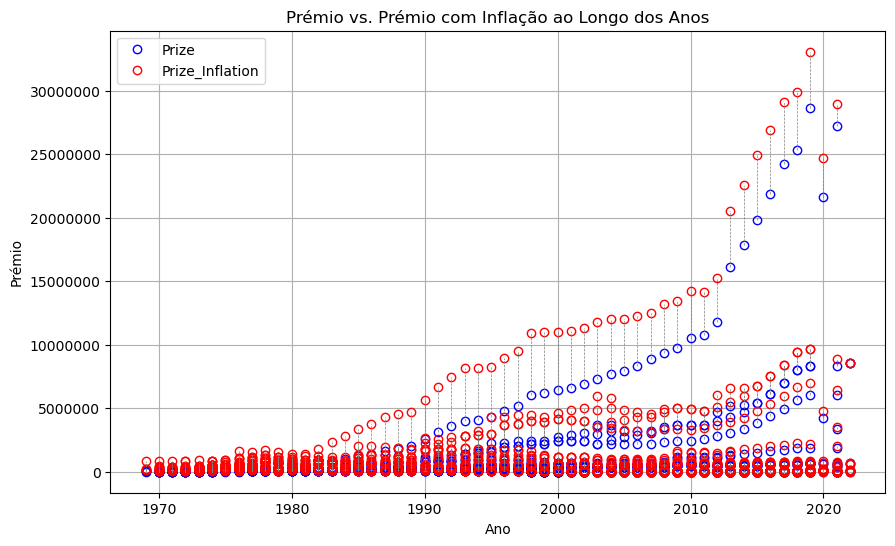

In [34]:
# Gráfico de comparação entre o Prémio e Prémio Inflacionado ao longo dos anos na base de dados

# Verificar se há valores NaN nas colunas relevantes e removê-los
tabela_clean = tabela.dropna(subset=['Year_Begin', 'Prize', 'Prize_Inflation'])

# Definir os dados para o eixo x (anos)
anos = tabela_clean['Year_Begin']

# Definir os dados para o eixo y (Prize e Prize_Inflation)
prize = tabela_clean['Prize']
prize_inflation = tabela_clean['Prize_Inflation']

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotar os pontos para Prize
plt.plot(anos, prize, label='Prize', marker='o', linestyle='None', markerfacecolor='none', markeredgecolor='blue')

# Plotar os pontos para Prize_Inflation
plt.plot(anos, prize_inflation, label='Prize_Inflation', marker='o', linestyle='None', markerfacecolor='none', markeredgecolor='red')

# Plotar linhas tracejadas conectando os pontos correspondentes
for i in range(len(anos)):
    plt.plot([anos.iloc[i], anos.iloc[i]], [prize.iloc[i], prize_inflation.iloc[i]], color='gray', linestyle='--', linewidth=0.5)

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Prémio')
plt.title('Prémio vs. Prémio com Inflação ao Longo dos Anos')

# Ajustar a formatação do eixo y para desativar a notação científica
plt.ticklabel_format(axis='y', style='plain')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()

#### Criação da variável 'nacional_pride'

In [35]:
df_treated['national_pride'] = 0
df_treated.loc[(df_treated['Winner_countryBorn'] == 'United States') & (df_treated['Loser_countryBorn'] != 'United States'), 'national_pride'] = 1

#### Criação da variável 'right_vs_left_hands':

In [36]:
df_treated['right_vs_left_hands'] = 0
df_treated.loc[((df_treated['Winner_mainhand'] == 'Right-Handed') & (df_treated['Loser_mainhand'] == 'Left-Handed')) | 
                ((df_treated['Winner_mainhand'] == 'Left-Handed') & (df_treated['Loser_mainhand'] == 'Right-Handed')), 
                'right_vs_left_hands'] = 1

### Passar algumas variáveis para os seus tipos corretos

In [37]:
df_treated = df_treated.drop(columns=["Date", "Original_wl", 'GameRank', 'Winner_mainhand', 'Winner_backhand', 
                                      'Loser_mainhand', 'Loser_backhand'], axis=1)

df_treated['Tournament'] = df_treated['Tournament'].astype('category')
df_treated['Location'] = df_treated['Location'].astype('category')
df_treated['Ground'] = df_treated['Ground'].astype('category')
df_treated['GameRound'] = df_treated['GameRound'].astype('category')
df_treated['Winner_gamerank'] = df_treated['Winner_gamerank'].replace('-', np.nan).astype('float')
df_treated['Loser_gamerank'] = df_treated['Loser_gamerank'].replace('-', np.nan).astype('float')
df_treated['Winner'] = df_treated['Winner'].astype('category')
df_treated['Loser'] = df_treated['Loser'].astype('category')
df_treated['Nr_sets'] = df_treated['Nr_sets'].astype('category')
df_treated['Loser_height'] = df_treated['Loser_height'].astype('float')
df_treated['Loser_link'] = df_treated['Loser_link'].astype('string')
#df_treated['Loser_mainhand'] = df_treated['Loser_mainhand'].astype('category')
#df_treated['Loser_backhand'] = df_treated['Loser_backhand'].astype('category')
df_treated['Loser_countryBorn'] = df_treated['Loser_countryBorn'].astype('category')
df_treated['Winner_height'] = df_treated['Winner_height'].astype('float')
df_treated['Winner_link'] = df_treated['Winner_link'].astype('string')
#df_treated['Winner_mainhand'] = df_treated['Winner_mainhand'].astype('category')
#df_treated['Winner_backhand'] = df_treated['Winner_backhand'].astype('category')
df_treated['Winner_countryBorn'] = df_treated['Winner_countryBorn'].astype('category')
df_treated['Tournament_Duration'] = df_treated['Tournament_Duration'].astype('float')
df_treated['height_dif'] = df_treated['height_dif'].astype('float')
df_treated['gamerank_dif'] = df_treated['gamerank_dif'].astype('float')
df_treated['is_final'] = df_treated['is_final'].astype('category')  ## TENHO DÚVIDAS SE AQUI PONHO CATEGORICA OU FLOAT
df_treated['is_semi_or_quarter'] = df_treated['is_semi_or_quarter'].astype('category')  ## SAME HERE
df_treated['age_dif'] = df_treated['age_dif'].astype('float')  
df_treated['national_pride'] = df_treated['national_pride'].astype('category')  ## SAME HERE
df_treated['right_vs_left_hands'] = df_treated['right_vs_left_hands'].astype('category')  ## SAME HERE

### Criação da variável "best_of" para dividir os jogos em melhores de 3 e melhores de 5

In [38]:
#df_treated[df_treated["Nr_sets"]
#           df.isna().sum(axis=1)
#print(df_treated.isna().sum(axis=1))
#print(len(df_treated[df_treated["Nr_sets"].isna()]))
df_treated['Score'].replace(to_replace='null', value='', inplace=True)
df_treated['Score'].fillna("", inplace=True)


In [39]:
df_temp = df_treated
df_temp["Best_of"] = None

# Determinar se são best_of_5 ou 3
def determine_best_of_5(data):
    for each in data.index:
        elem = data.loc[each, "Score"]
        elem_list = elem.split()
        
        if len(elem_list) == 2:
            data.loc[each, "Best_of"] = 0
            continue
            
        if len(elem_list) in [4, 5]:
            data.loc[each, "Best_of"] = 1
            continue
            
        if len(elem_list) in [0, 1]:
            continue
            
        if len(elem_list) == 3:
            pointer_left = 0
            pointer_right = 0
            
            for each_score in elem_list:
                if "-" in each_score:
                    split3 = each_score.split("-")
                    if len(split3) == 2 and split3[0].isdigit() and split3[1].isdigit():
                        if int(split3[0]) > int(split3[1]):
                            pointer_left += 1
                        elif int(split3[0]) < int(split3[1]):
                            pointer_right += 1
                else:
                    split2 = list(each_score)
                    if len(split2) == 2 and split2[0].isdigit() and split2[1].isdigit():
                        if int(split2[0]) > int(split2[1]):
                            pointer_left += 1
                        elif int(split2[0]) < int(split2[1]):
                            pointer_right += 1
            
            if pointer_left == 3 or pointer_right == 3:
                data.loc[each, "Best_of"] = 1
            else:
                data.loc[each, "Best_of"] = 0

    return "Feito"

determine_best_of_5(df_temp)


df0 = df_temp.loc[df_temp["Best_of"] == 0]  #77440  (77440 + 5824 = 88217) 4946 (4953 + 7 sets de melhor de 1)
df1 = df_temp.loc[df_temp["Best_of"] == 1]  #5824


df_best_of_3 = df0
df_best_of_5 = df1


print(len(df_best_of_3))
print(len(df_best_of_5))

69383
5816


### Correlações

In [70]:
df_correlations = df_best_of_3

#### Correlações entre variáveis numéricas

Matriz de correlação de Pearson entre variáveis numéricas:
                        Prize  Winner_gamerank  Loser_gamerank  Loser_height  \
Prize                1.000000        -0.173002       -0.171066      0.047259   
Winner_gamerank     -0.173002         1.000000        0.582995      0.012296   
Loser_gamerank      -0.171066         0.582995        1.000000      0.019861   
Loser_height         0.047259         0.012296        0.019861      1.000000   
Winner_height        0.051276        -0.009139       -0.009107      0.036845   
Tournament_Duration  0.564887        -0.136747       -0.128990      0.045407   
height_dif           0.001818        -0.011281       -0.031099     -0.686909   
gamerank_dif         0.046867         0.259646       -0.633239     -0.023971   
age_dif              0.003422         0.040962       -0.095807     -0.057367   
Prize_Inflation      0.993893        -0.200931       -0.198933      0.042484   
right_vs_left_hands  0.026429        -0.074134       -0.07712

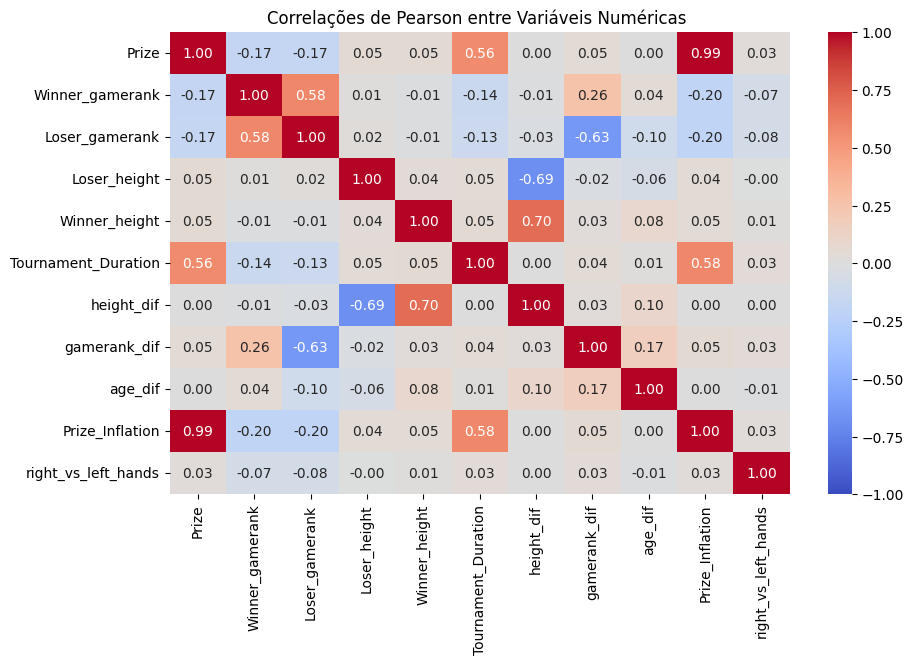

In [71]:
vars_num = df_correlations.loc[:,['Prize','Winner_gamerank','Loser_gamerank','Loser_height','Winner_height',
                          'Tournament_Duration','height_dif','gamerank_dif','age_dif','Prize_Inflation',
                          'right_vs_left_hands']]

correlacoes_entre_num = vars_num.corr(method='pearson')
print("Matriz de correlação de Pearson entre variáveis numéricas:")
print(correlacoes_entre_num)


def cramer_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Visualização
plt.figure(figsize=(10, 6))  
sns.heatmap(correlacoes_entre_num.astype(float), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)  # Plotar o heatmap

# Adicionar rótulos e título
plt.title('Correlações de Pearson entre Variáveis Numéricas ')

# Exibir o heatmap
plt.show()

#### Correlações entre as variáveis nominais

Matriz de correlação com Cramer's V entre variáveis nominais:
             Ground GameRound   Nr_sets
Ground          NaN   0.13262  0.019164
GameRound   0.13262       NaN  0.029328
Nr_sets    0.019164  0.029328       NaN


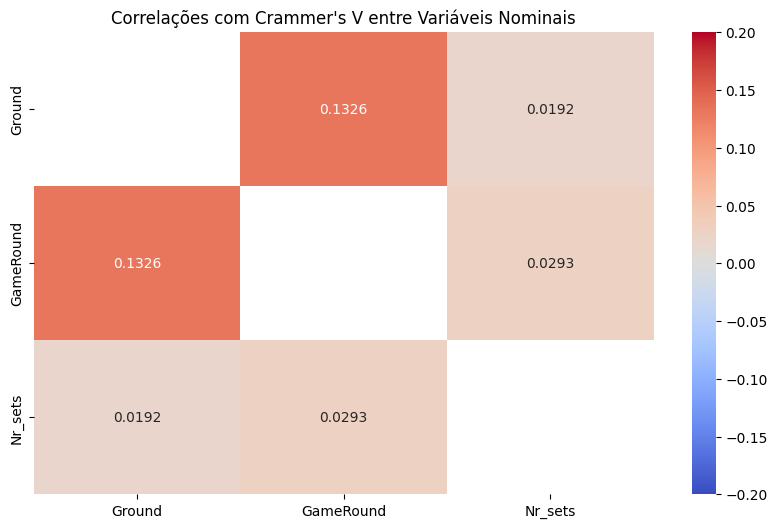

In [72]:
# Lista de variáveis nominais
vars_nomi = ['Ground','GameRound','Nr_sets']


# Inicialização da matriz de correlação
correlacoes_entre_nomi = pd.DataFrame(index=vars_nomi, columns=vars_nomi)


# Calcular o coeficiente de Cramer's V para cada par de variáveis
for i in range(len(vars_nomi)):
    for j in range(len(vars_nomi)):
        # Verifica se as variáveis são diferentes antes de calcular
        if i != j:
            tabela_contingencia = pd.crosstab(df_correlations[vars_nomi[i]], df_correlations[vars_nomi[j]])
            correlacoes_entre_nomi.loc[vars_nomi[i], vars_nomi[j]] = cramer_v(tabela_contingencia)

print("Matriz de correlação com Cramer's V entre variáveis nominais:")
print(correlacoes_entre_nomi)


# Visualização
plt.figure(figsize=(10, 6))  
sns.heatmap(correlacoes_entre_nomi.astype(float), annot=True, cmap='coolwarm', fmt=".4f", vmin=-0.200, vmax=0.200)  # Plotar o heatmap

# Adicionar rótulos e título
plt.title("Correlações com Crammer's V entre Variáveis Nominais")

# Exibir o heatmap
plt.show()

#### Correlações entre variáveis numéricas e nominais

Matriz de correlação Eta (η):
                       Ground GameRound   Nr_sets
Prize                 0.02474  0.179143  0.000343
Winner_gamerank      0.042444  0.047666  0.000027
Loser_gamerank       0.038654  0.057387  0.003655
Loser_height         0.006248  0.001706  0.000645
Winner_height        0.010822  0.000601  0.000003
Tournament_Duration  0.049887  0.211738  0.000278
height_dif           0.000124  0.000616  0.000541
gamerank_dif         0.001572  0.008228  0.007206
age_dif              0.000389  0.000633  0.000173
Prize_Inflation      0.025647   0.18722  0.000367


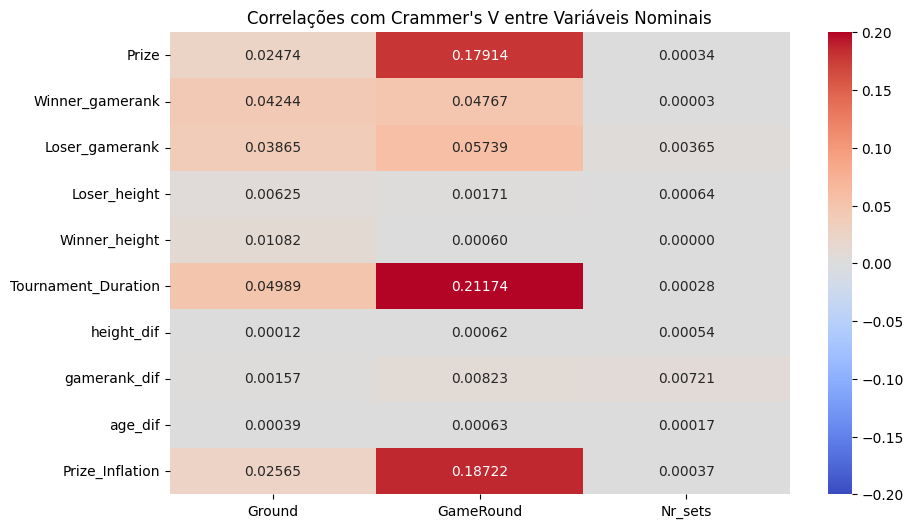

In [73]:
vars_nume = ['Prize','Winner_gamerank','Loser_gamerank','Loser_height','Winner_height',
             'Tournament_Duration','height_dif','gamerank_dif','age_dif','Prize_Inflation']

# Calcular a correlação eta
correlacoes_num_e_nomi = pd.DataFrame(index=vars_nume, columns=vars_nomi)


#Calcular a correlação eta para cada par de variáveis
for num_var in vars_nume:
    for nom_var in vars_nomi:
        result = pg.anova(dv=num_var, between=nom_var, data=df_correlations, detailed=True)
        eta_squared = result.loc[result['Source'] == nom_var, 'np2'].values[0]        
        correlacoes_num_e_nomi.loc[num_var, nom_var] = eta_squared


print("Matriz de correlação Eta (η):")
print(correlacoes_num_e_nomi)


# Visualização
plt.figure(figsize=(10, 6))  
sns.heatmap(correlacoes_num_e_nomi.astype(float), annot=True, cmap='coolwarm', fmt=".5f", vmin=-0.200, vmax=0.200)  # Plotar o heatmap

# Adicionar rótulos e título
plt.title("Correlações com Crammer's V entre Variáveis Nominais")

# Exibir o heatmap
plt.show()

## Modelação

In [74]:
df_modeling = df_correlations

#### Remover variáveis categóricas com demasiadas categorias:

In [75]:
target_variable = df_modeling['Nr_sets']
df_modeling = df_modeling.drop(columns=['Tournament', 'Location', 'GameRound', 'Score',
                                'Winner', 'Loser', 'Loser_countryBorn', 'Winner_link',
                                'Loser_link', 'Winner_countryBorn', 'Date_Begin',
                                'Date_End', 'Winner_birthDate', 'Loser_birthDate'], axis=1)

#### Remoção de observações com demasiados NA's:

In [76]:
def missing_values_table(df):
    #contagem de valores em falta
    missing_counts = df.isna().sum(axis=1)
    
    #organizar a informação numa tabela
    missing_values_count_table = missing_counts.value_counts().reset_index()
    missing_values_count_table.columns = ['Number of Missing Values', 'Number of Rows']
    
    #organizar os valores por ordem ascendente para facilitar a compreensão
    missing_values_count_table = missing_values_count_table.sort_values(by='Number of Missing Values')

    #percentagem acumulativa de valores omissos
    total_observations = len(df)
    missing_values_count_table['Cumulative Percentage'] = (missing_values_count_table['Number of Rows'].cumsum() / total_observations) * 100
    
    return missing_values_count_table

def process_dataframe(df, nr_missings):
    # Count the number of missing values in each row
    missing_counts = df.isna().sum(axis=1)
    
    # Find rows with exactly n missing values
    rows_with_n_missing = df[missing_counts == nr_missings]
    
    # Remove rows with exactly n missing from the dataframe
    df_cleaned = df[missing_counts != nr_missings]
    
    return rows_with_n_missing, df_cleaned

def count_missing_values_column(df):
    missing_values = df.isna().sum()
    
    missing_values_df = missing_values.reset_index()
    missing_values_df.columns = ['Column', 'Number of Missing Values']
    
    return missing_values_df

In [77]:
missing_values_table_df = missing_values_table(df_modeling)
missing_values_table_df.style.set_caption('Missing Values Table')

In [78]:
print("before removal:", len(df_modeling))
for i in range(5,9):
    _, df_modeling = process_dataframe(df_modeling, i)
print("after removal:", len(df_modeling))

before removal: 69383
after removal: 58522


#### Imputação dos restantes valores omissos:

In [79]:
model_df_encoded = df_modeling
print("Winner height: ",len(model_df_encoded[pd.isna(model_df_encoded['Winner_height'])])/len(model_df_encoded['Winner_height'])) # 4%
print("Loser height: ",len(model_df_encoded[pd.isna(model_df_encoded['Loser_height'])])/len(model_df_encoded['Loser_height'])) # 10%
print("Winner gamerank: ",len(model_df_encoded[pd.isna(model_df_encoded['Winner_gamerank'])])/len(model_df_encoded['Winner_gamerank'])) #1%
print("Loser gamerank: ",len(model_df_encoded[pd.isna(model_df_encoded['Loser_gamerank'])])/len(model_df_encoded['Loser_gamerank'])) #3%
print("Age difference: ",len(model_df_encoded[pd.isna(model_df_encoded['age_dif'])])/len(model_df_encoded['age_dif'])) #14%
print("Prize: ",len(model_df_encoded[pd.isna(model_df_encoded['Prize'])])/len(model_df_encoded['Prize'])) #0.2%

Winner height:  0.042684802296572226
Loser height:  0.09152113735005639
Winner gamerank:  0.012901131198523631
Loser gamerank:  0.027801510543043643
Age difference:  0.13974231912784935
Prize:  0.002289737192850552


In [80]:
#print(model_df_encoded['Winner_height'].mean())
#print(model_df_encoded['Loser_height'].mean())
#print(model_df_encoded['Winner_height'].unique())
model_df_encoded.loc[pd.isna(model_df_encoded['Winner_height']), 'Winner_height'] = 185
model_df_encoded.loc[pd.isna(model_df_encoded['Loser_height']), 'Loser_height'] = 185

#print(model_df_encoded['Winner_gamerank'].mean()) #272
#print(model_df_encoded['Loser_gamerank'].mean()) #362
model_df_encoded.loc[pd.isna(model_df_encoded['Winner_gamerank']), 'Winner_gamerank'] = 272
model_df_encoded.loc[pd.isna(model_df_encoded['Loser_gamerank']), 'Loser_gamerank'] = 362

#print(model_df_encoded['age_dif'].mean()) #essencialmente zero
model_df_encoded.loc[pd.isna(model_df_encoded['age_dif']), 'age_dif'] = 0

#print(model_df_encoded['Prize'].mean())
model_df_encoded.loc[pd.isna(model_df_encoded['Prize']), 'Prize'] = 1081045

#print(model_df_encoded['Prize_Inflation'].mean())
model_df_encoded.loc[pd.isna(model_df_encoded['Prize_Inflation']), 'Prize_Inflation'] = 1459974


1497512.1422210042


#### Recalcular a diferença de alturas e de ranks para evitar incongruências:

In [81]:
model_df_encoded['height_dif'] = None
height_list = []

for row in model_df_encoded.iterrows():
    height_list.append(int(row[1][5]) - int(row[1][4]))


#the difference is the height of the winner minus the height of the loser
model_df_encoded['height_dif'] = height_list


model_df_encoded['gamerank_dif'] = None
gamerank_list = []

for row in model_df_encoded.iterrows():
    gamerank_list.append(int(row[1][2]) - int(row[1][3]))


#the difference is the height of the winner minus the height of the loser
model_df_encoded['gamerank_dif'] = gamerank_list

df_modeling = model_df_encoded

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_7632\1841783107.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  height_list.append(int(row[1][5]) - int(row[1][4]))
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_7632\1841783107.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamerank_list.append(int(row[1][2]) - int(row[1][3]))


#### Categorização de ground: (one-hot encoding)

In [82]:
model_df_encoded = pd.get_dummies(df_modeling, 
                                  columns=['Ground'])

# Mudar o nome das variáveis dummy
model_df_encoded.columns = ['Prize', 'Winner_gamerank', 'Loser_gamerank', 'Loser_height',
       'Winner_height', 'Duration_Days', 'height_dif', 'Nr_sets', 
       'gamerank_dif', 'is_final', 'is_semi_or_quarter', 'age_dif', 
       'Year_Begin', 'Prize_Inflation', 'national_pride', 
       'right_vs_left_hands', 'Best_of', 'Ground_Carpet', 'Ground_Clay', 
       'Ground_Grass', 'Ground_Hard']


#### Remoção de variáveis que não vão ser usadas na modelação

In [83]:
new_model_df = model_df_encoded.drop(columns=['Winner_gamerank', 'Loser_gamerank', 'Loser_height',
       'Winner_height', 'Ground_Carpet',  'Ground_Hard', 'Ground_Clay', 'Prize', 'Best_of', 'Year_Begin'], axis=1)

In [84]:
print(new_model_df.columns)
temp_df = new_model_df

Index(['Duration_Days', 'height_dif', 'Nr_sets', 'gamerank_dif', 'is_final',
       'is_semi_or_quarter', 'age_dif', 'Prize_Inflation', 'national_pride',
       'right_vs_left_hands', 'Ground_Grass'],
      dtype='object')


### 1º modelo de aprendizagem supervisionada (arvore de decisão):

0.6575
DecisionTreeClassifier(max_depth=3)
Accuracy: 0.6599743699273815
Classification Report:
              precision    recall  f1-score   support

           2       0.66      1.00      0.80      7725
           3       0.00      0.00      0.00      3980

    accuracy                           0.66     11705
   macro avg       0.33      0.50      0.40     11705
weighted avg       0.44      0.66      0.52     11705

3
['2', '3']


c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

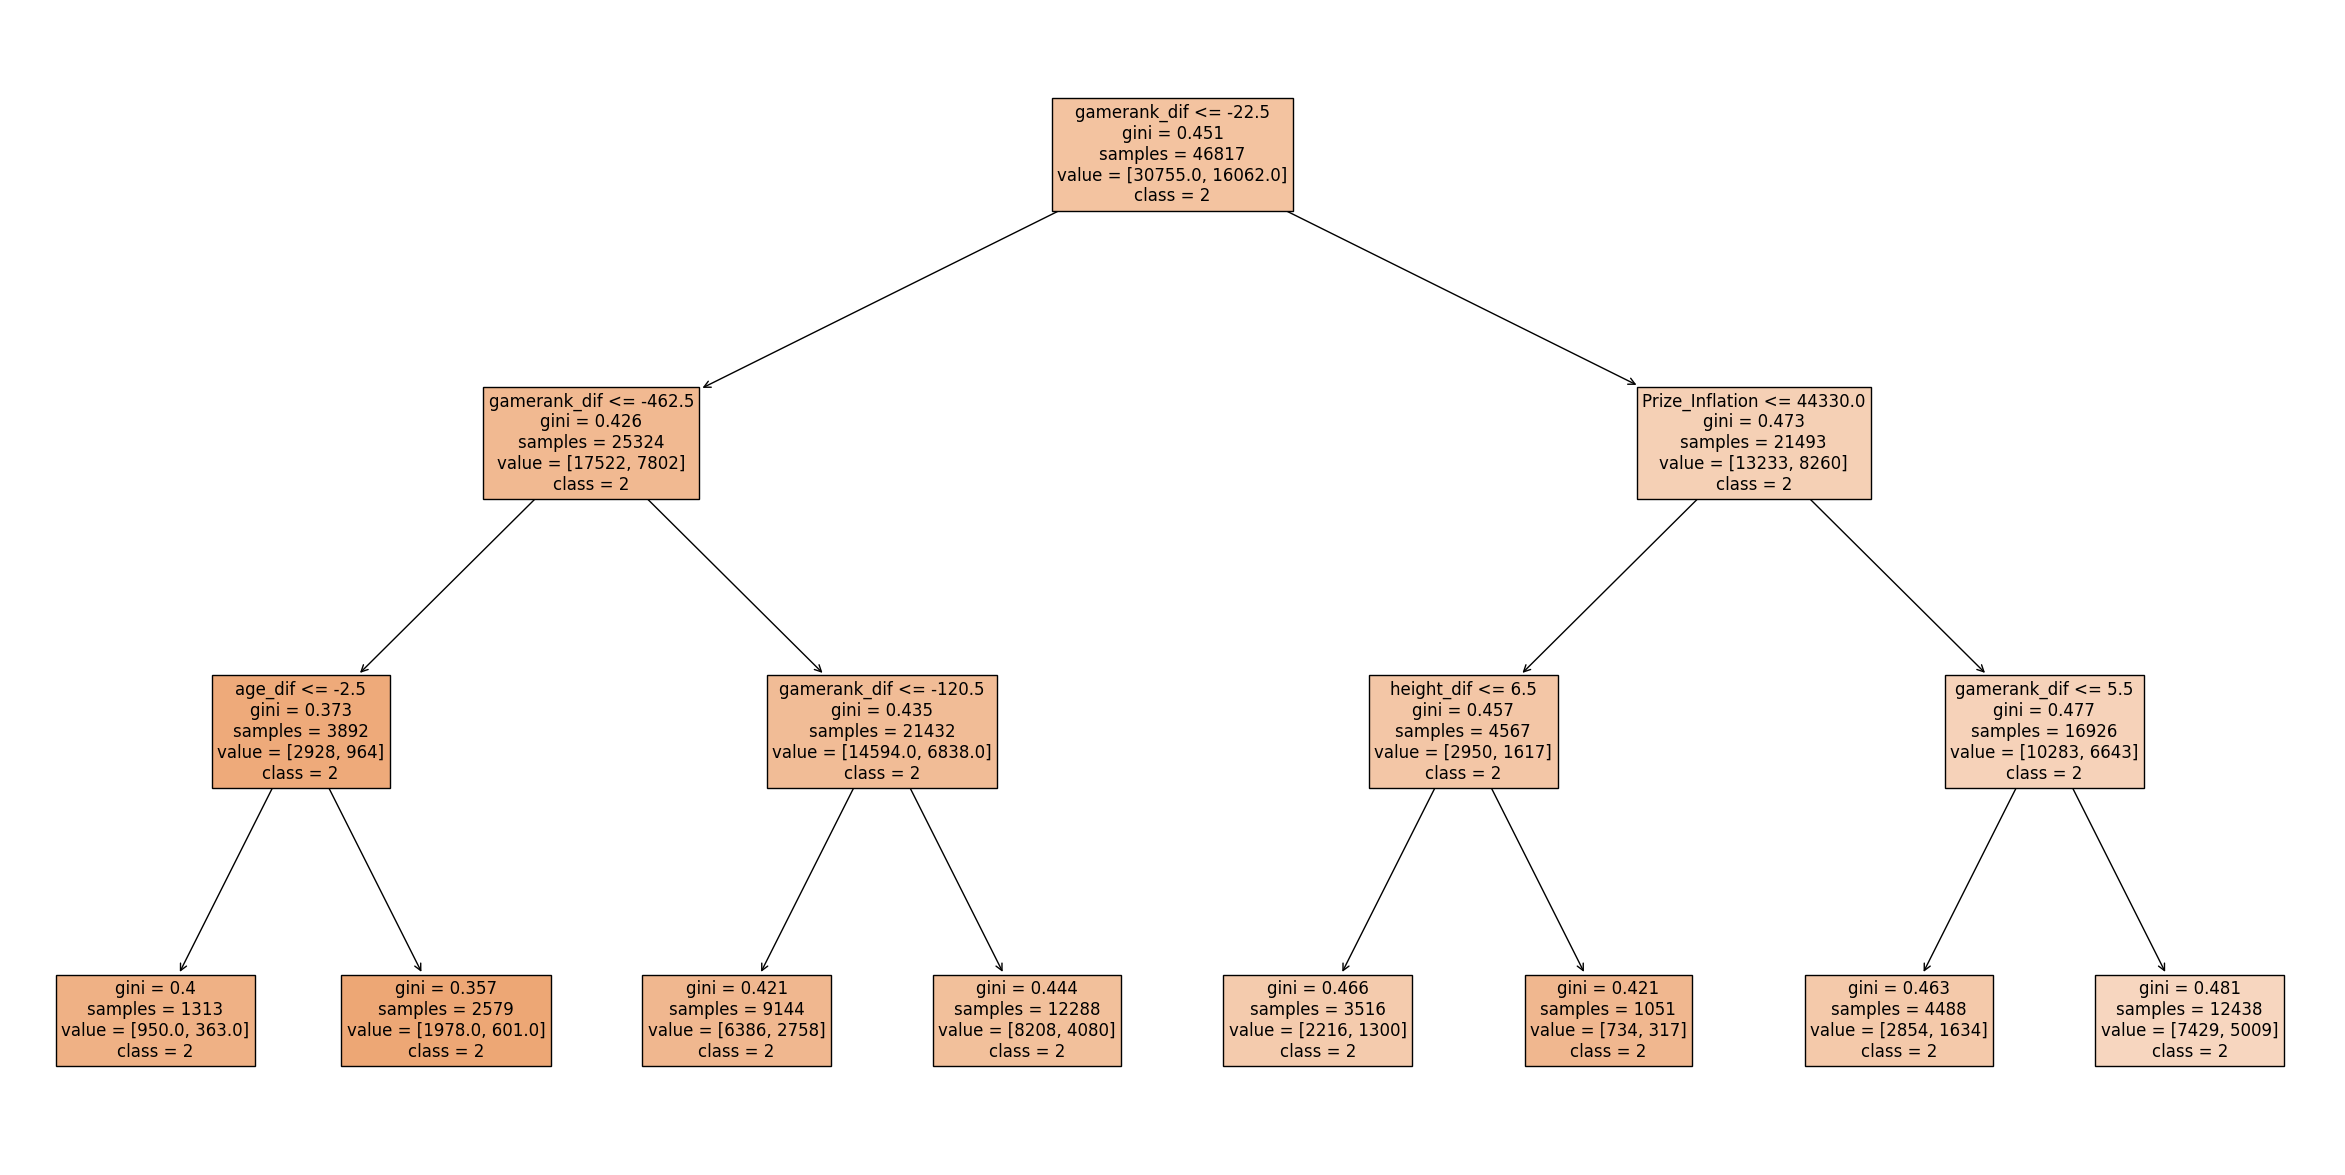

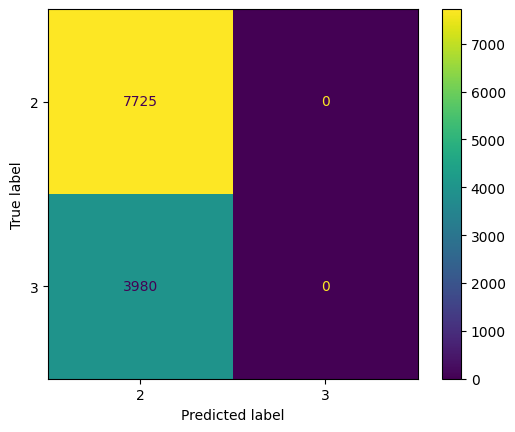

[0.         0.24530744 0.3192233  0.41255663 0.68194175 0.8789644
 0.90239482 0.93436893 1.        ] [0.         0.29949749 0.3821608  0.48341709 0.73944724 0.91884422
 0.94045226 0.95778894 1.        ] 0.5467672342293994


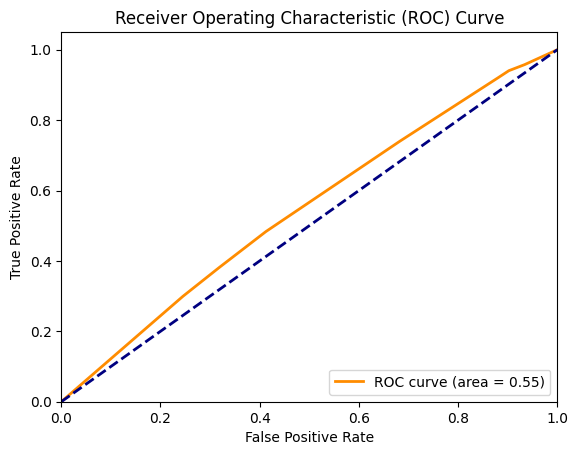

In [85]:
target_variable = new_model_df['Nr_sets']
freq_set2 = len(target_variable[target_variable == 2])/(len(target_variable[target_variable == 3])+len(target_variable[target_variable == 2]))
print(round(freq_set2, 4))
new_model_df = new_model_df.drop(columns=list(['Nr_sets']), axis=1)


# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(new_model_df, target_variable, test_size=0.2, random_state=222)


# Creating and training the decision tree classifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(features_train, target_train)
print(model)


# Making predictions on the testing data
predictions = model.predict(features_test)


# Evaluating the model
accuracy = accuracy_score(target_test, predictions)
print("Accuracy:", accuracy)


# Additional evaluation metrics (optional)
print("Classification Report:")
print(classification_report(target_test, predictions))


# Visualize the decision tree
print(model.get_depth())
model_classes = [str(class_) for class_ in model.classes_]
print(model_classes)
plt.figure(figsize=(30,15))
plot_tree(model, filled=True, feature_names=new_model_df.columns, class_names=model_classes,
          fontsize=12)
plt.show()


# Confusion Matrix
cm = confusion_matrix(target_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


# Calculate the probabilities for ROC curve
probs = model.predict_proba(features_test)[:, 1]


#calcular a curva de roc e o seu valor
fpr, tpr, thresholds = roc_curve(target_test, probs, pos_label=model.classes_[1])
roc_auc = roc_auc_score(target_test, probs)
print(fpr, tpr, roc_auc) #0.55, um bocado melhor que random guessing


# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Modelo de arvore de decisão, mas com balanceamento:

DecisionTreeClassifier(class_weight='balanced', max_depth=5)
Accuracy: 0.5542076035882102
Classification Report:
              precision    recall  f1-score   support

           2       0.69      0.60      0.64      7725
           3       0.38      0.47      0.42      3980

    accuracy                           0.55     11705
   macro avg       0.53      0.53      0.53     11705
weighted avg       0.58      0.55      0.56     11705

5
['2', '3']


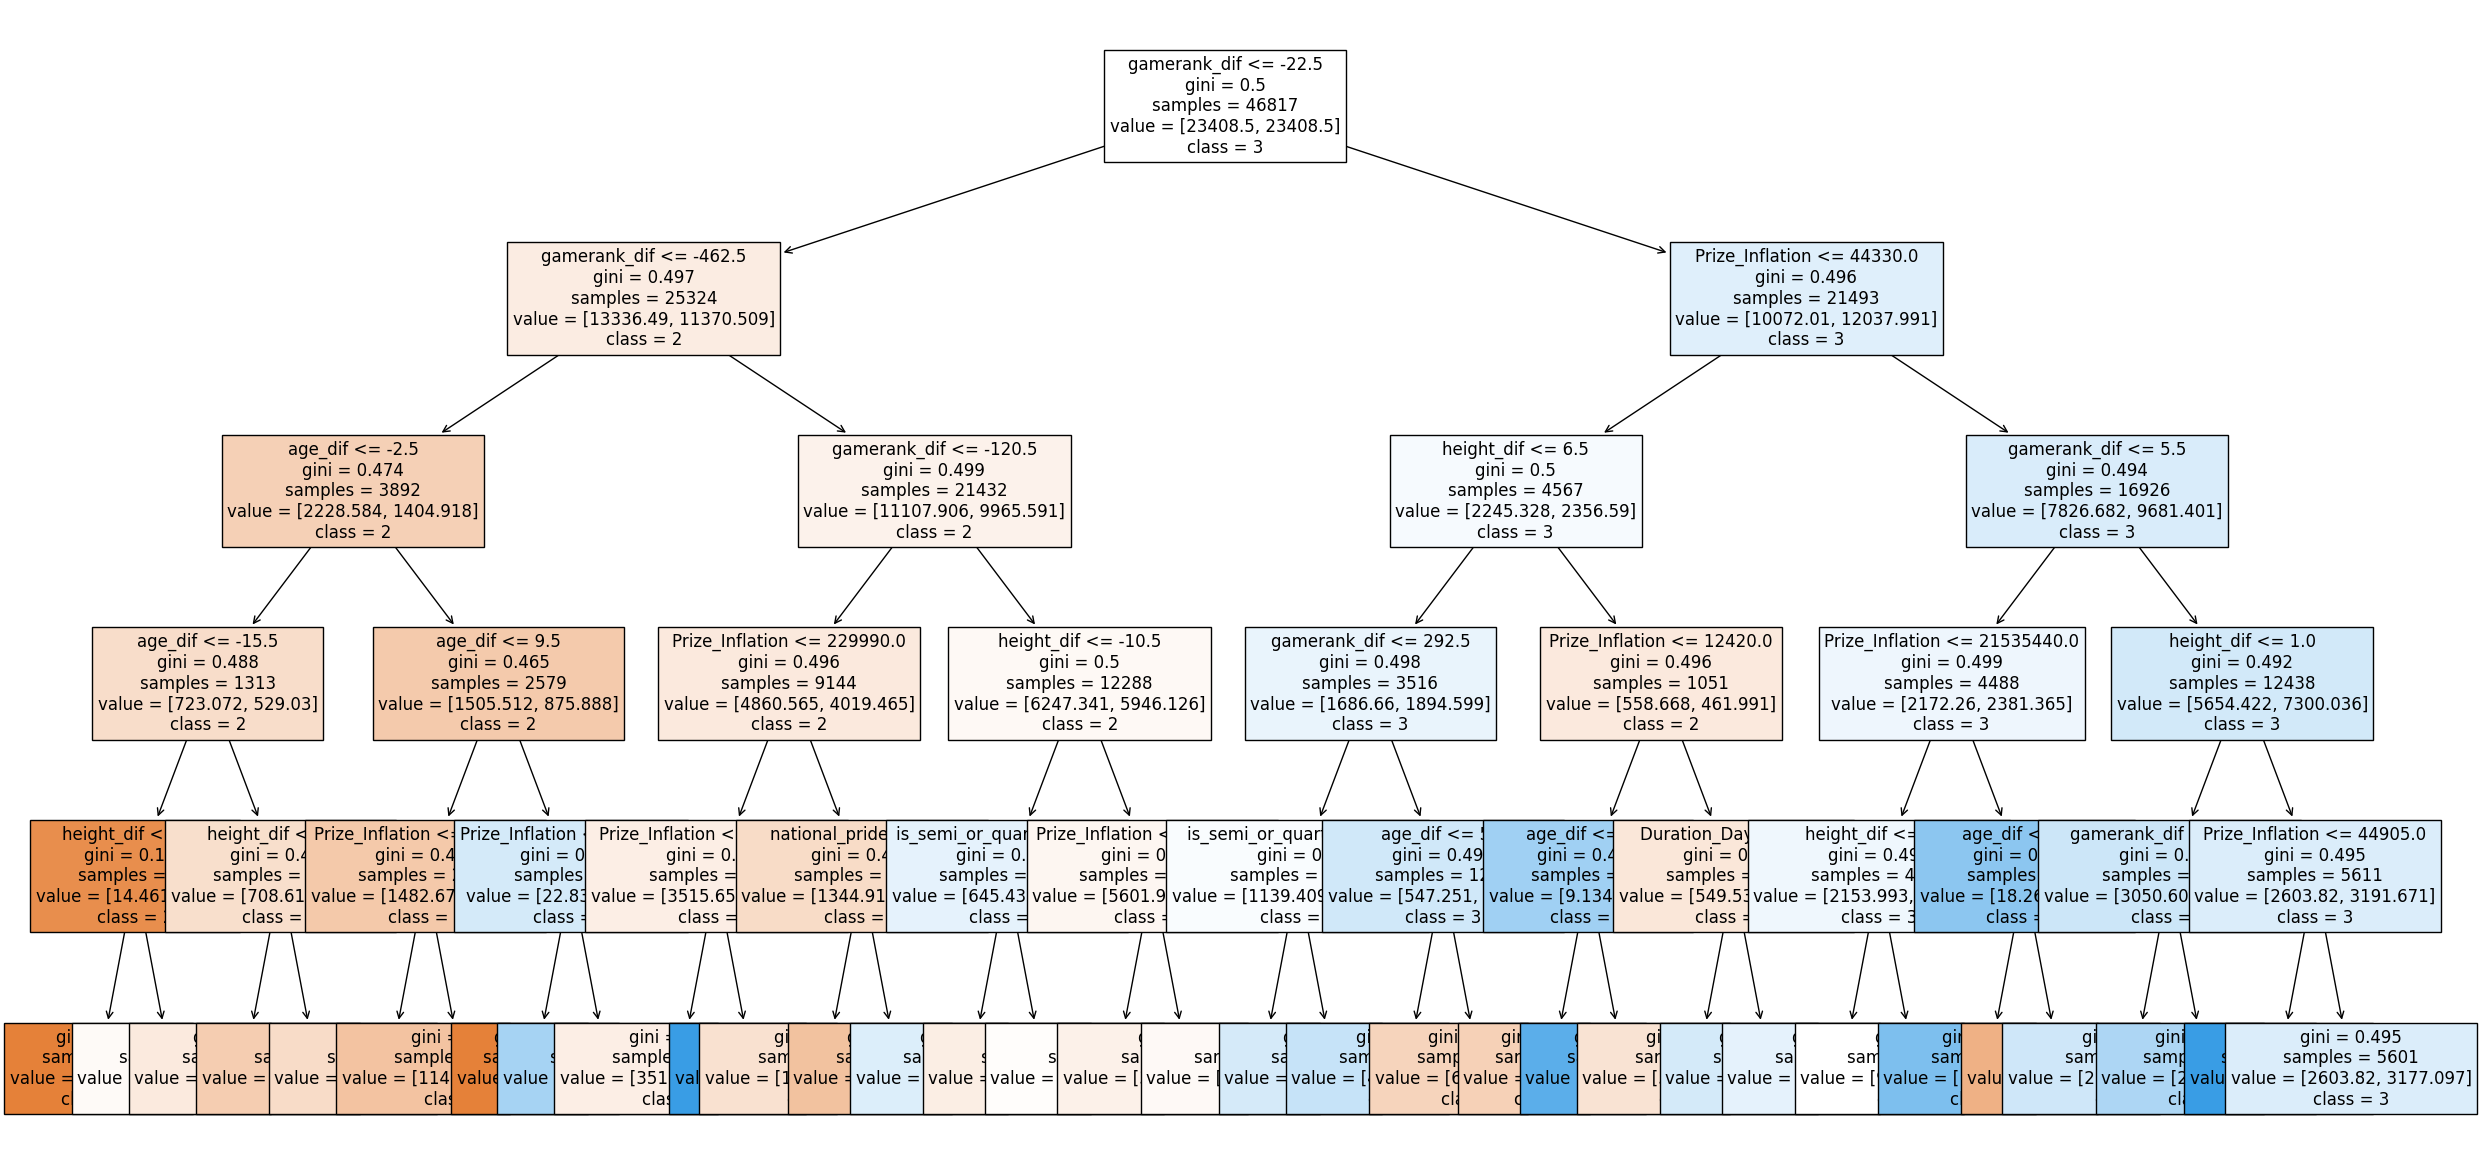

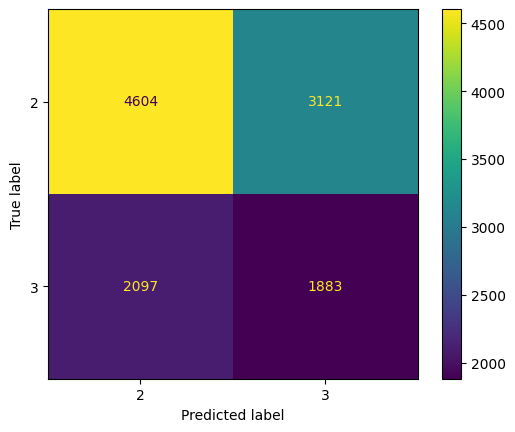

[0.00000000e+00 2.58899676e-04 7.76699029e-04 1.81229773e-03
 2.71844660e-03 1.38511327e-02 3.61165049e-02 1.56375405e-01
 1.57799353e-01 1.70873786e-01 2.84789644e-01 3.11844660e-01
 3.67637540e-01 4.04012945e-01 5.07831715e-01 5.07961165e-01
 5.44595469e-01 6.78576052e-01 8.20323625e-01 8.24854369e-01
 8.44789644e-01 8.66148867e-01 9.13009709e-01 9.25177994e-01
 9.27119741e-01 9.27249191e-01 9.38511327e-01 9.90679612e-01
 9.98834951e-01 9.98964401e-01 1.00000000e+00] [0.00000000e+00 2.51256281e-04 2.51256281e-04 1.75879397e-03
 2.51256281e-03 1.88442211e-02 4.87437186e-02 2.01758794e-01
 2.03517588e-01 2.18090452e-01 3.47989950e-01 3.73618090e-01
 4.31155779e-01 4.73115578e-01 5.70603015e-01 5.70603015e-01
 6.05025126e-01 7.31909548e-01 8.65326633e-01 8.71356784e-01
 8.82160804e-01 9.01507538e-01 9.42462312e-01 9.53015075e-01
 9.56783920e-01 9.57286432e-01 9.63567839e-01 9.94472362e-01
 9.99497487e-01 9.99748744e-01 1.00000000e+00] 0.5467964580182466


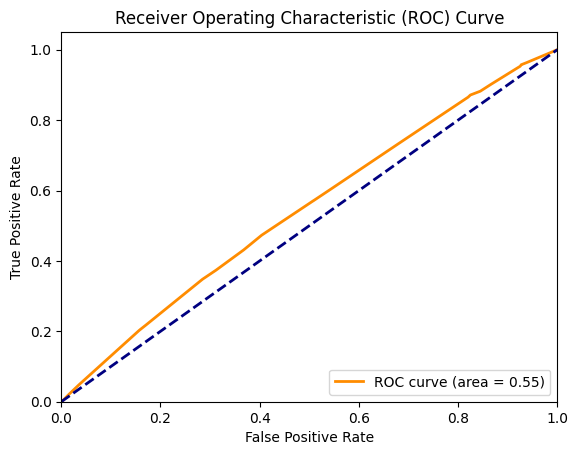

In [86]:
# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(new_model_df, target_variable, test_size=0.2, random_state=222)

# Creating and training the decision tree classifier
model = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)
print(model)


# Making predictions on the testing data
predictions = model.predict(features_test)


# Evaluating the model
accuracy = accuracy_score(target_test, predictions)
print("Accuracy:", accuracy)


# Additional evaluation metrics (optional)
print("Classification Report:")
print(classification_report(target_test, predictions))


# Visualize the decision tree
print(model.get_depth())
model_classes = [str(class_) for class_ in model.classes_]
print(model_classes)
plt.figure(figsize=(30,15))
plot_tree(model, filled=True, feature_names=new_model_df.columns, class_names=model_classes,
          fontsize=12)
plt.show()


cm = confusion_matrix(target_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


# Calculate the probabilities for ROC curve
probs = model.predict_proba(features_test)[:, 1]


# Calcular a curva de roc e o seu valor
fpr, tpr, thresholds = roc_curve(target_test, probs, pos_label=model.classes_[1])
roc_auc = roc_auc_score(target_test, probs)
print(fpr, tpr, roc_auc) #0.56, muito mas mesmo muito pouco acima do modelo anterior


# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Avaliar quais as variáveis do dataframe que podem ser removidas sem prejudicar o modelo (decision tree):

In [87]:
# método 1, feature importances built in no modelo, com base no primeiro modelo criado (àrvore de regressão)
importances = model.feature_importances_

feature_importances = pd.DataFrame({
    'feature': features_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importances)

               feature  importance
2         gamerank_dif    0.682275
6      Prize_Inflation    0.134410
1           height_dif    0.075295
5              age_dif    0.067207
4   is_semi_or_quarter    0.020536
7       national_pride    0.014653
0        Duration_Days    0.005625
3             is_final    0.000000
8  right_vs_left_hands    0.000000
9         Ground_Grass    0.000000


### Modelo de arvore de decisão, reduzindo o número de variáveis com base na importância:

DecisionTreeClassifier(class_weight='balanced', max_depth=5)
Accuracy: 0.5484835540367364
Classification Report:
              precision    recall  f1-score   support

           2       0.69      0.57      0.63      7725
           3       0.38      0.50      0.43      3980

    accuracy                           0.55     11705
   macro avg       0.53      0.54      0.53     11705
weighted avg       0.58      0.55      0.56     11705

5
['2', '3']


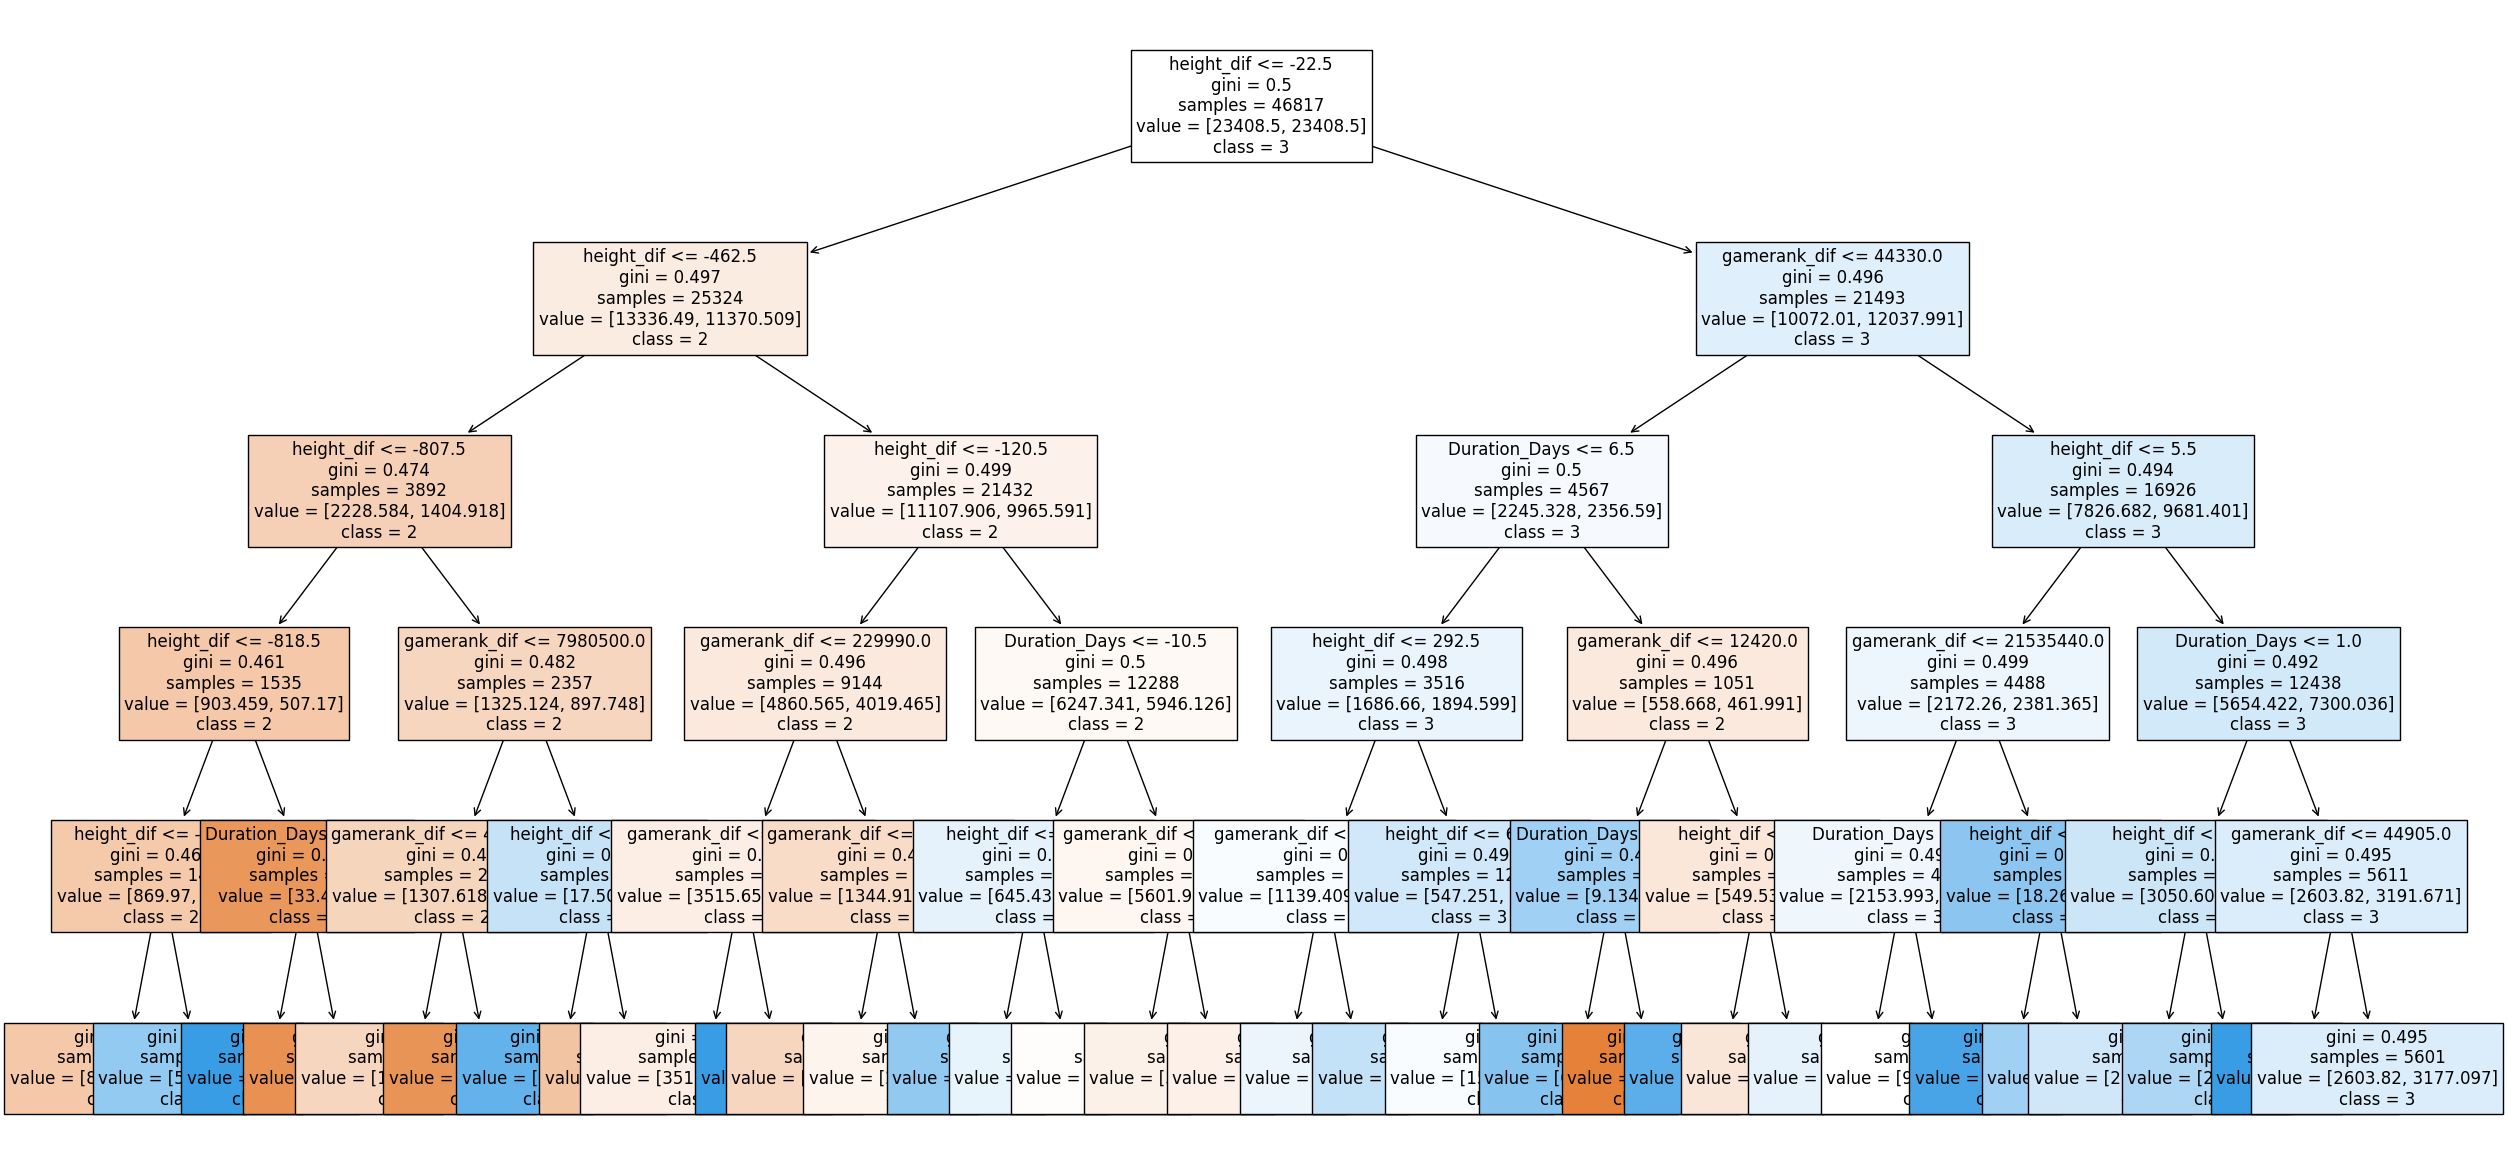

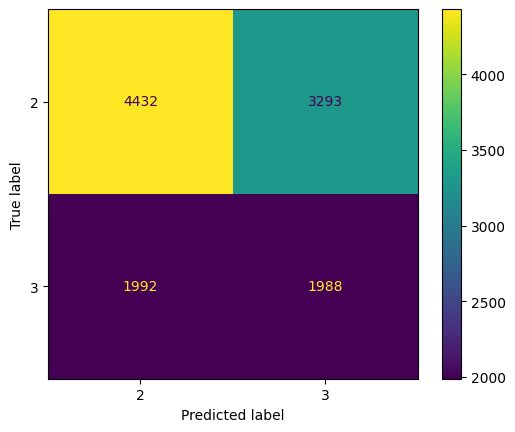

[0.00000000e+00 2.58899676e-04 3.88349515e-04 1.03559871e-03
 2.45954693e-03 2.71844660e-03 3.75404531e-03 1.48867314e-02
 3.17152104e-02 1.51974110e-01 2.65889968e-01 3.21682848e-01
 3.51844660e-01 3.82524272e-01 3.89902913e-01 4.26278317e-01
 5.30097087e-01 5.39546926e-01 6.73527508e-01 6.92556634e-01
 8.34304207e-01 8.57087379e-01 9.02653722e-01 9.60517799e-01
 9.97540453e-01 9.97669903e-01 9.98705502e-01 1.00000000e+00] [0.00000000e+00 2.51256281e-04 2.51256281e-04 7.53768844e-04
 1.50753769e-03 1.75879397e-03 3.51758794e-03 1.98492462e-02
 4.27135678e-02 1.95728643e-01 3.25628141e-01 3.83165829e-01
 4.14070352e-01 4.46733668e-01 4.57537688e-01 4.99497487e-01
 5.96984925e-01 6.04522613e-01 7.31407035e-01 7.47738693e-01
 8.81155779e-01 9.02261307e-01 9.40703518e-01 9.76633166e-01
 9.98994975e-01 9.98994975e-01 9.99497487e-01 1.00000000e+00] 0.5488525150021955


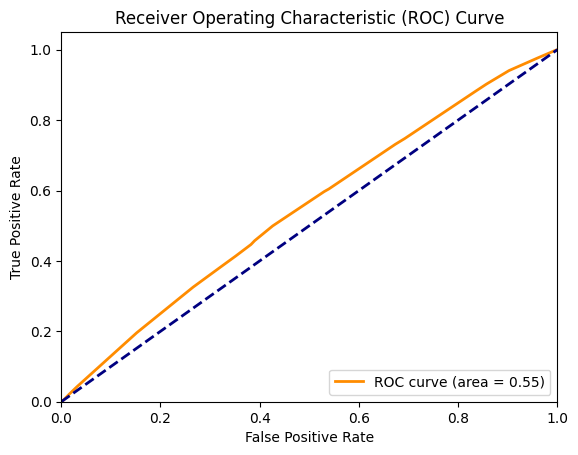

In [89]:
model_df_v2 = new_model_df.drop(columns=['Duration_Days', 'age_dif', 'Ground_Grass',
                                         'is_final', 'national_pride',
                                         'is_semi_or_quarter', 'right_vs_left_hands'], axis=1)

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(model_df_v2, target_variable, test_size=0.2, random_state=222)


# Creating and training the decision tree classifier
model = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)
print(model)


# Making predictions on the testing data
predictions = model.predict(features_test)


# Evaluating the model
accuracy = accuracy_score(target_test, predictions)
print("Accuracy:", accuracy)


# Additional evaluation metrics (optional)
print("Classification Report:")
print(classification_report(target_test, predictions))


# Visualize the decision tree
print(model.get_depth())
model_classes = [str(class_) for class_ in model.classes_]
print(model_classes)
plt.figure(figsize=(30,15))
plot_tree(model, filled=True, feature_names=new_model_df.columns, class_names=model_classes,
          fontsize=12)
plt.show()


cm = confusion_matrix(target_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


# Calculate the probabilities for ROC curve
probs = model.predict_proba(features_test)[:, 1]


# Calcular a curva de roc e o seu valor
fpr, tpr, thresholds = roc_curve(target_test, probs, pos_label=model.classes_[1])
roc_auc = roc_auc_score(target_test, probs)
print(fpr, tpr, roc_auc) #0.56, again

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 2º modelo de aprendizagem supervisionada (regressão logística), com balanceamento:

Logistic Regression Accuracy: 0.5340452797949594


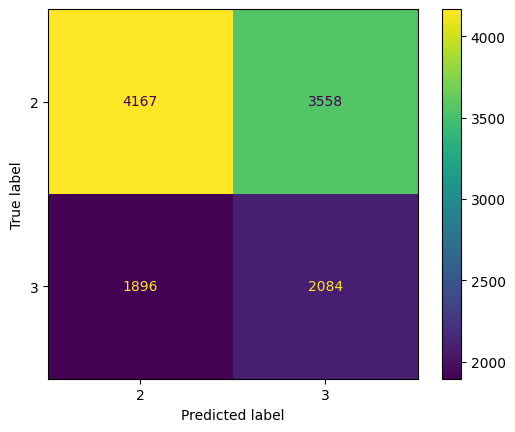

[0.00000000e+00 0.00000000e+00 1.29449838e-04 ... 9.99093851e-01
 9.99093851e-01 1.00000000e+00] [0.00000000e+00 2.51256281e-04 2.51256281e-04 ... 9.99748744e-01
 1.00000000e+00 1.00000000e+00] 0.5474216552015743


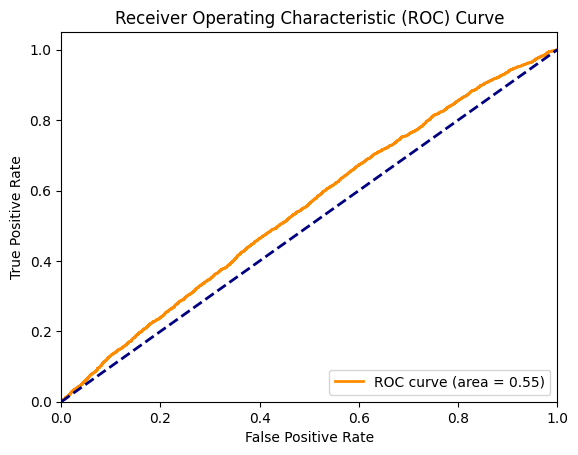

In [90]:
# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(new_model_df, target_variable, test_size=0.2, random_state=222)

log_reg_model = LogisticRegression(class_weight='balanced')
log_reg_model.fit(features_train, target_train)
log_reg_pred = log_reg_model.predict(features_test)
log_reg_accuracy = accuracy_score(target_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)


cm = confusion_matrix(target_test, log_reg_pred, labels=log_reg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_model.classes_)
disp.plot()
plt.show()


# Calculate the probabilities for ROC curve
probs = log_reg_model.predict_proba(features_test)[:, 1]


# Calcular a curva de roc e o seu valor
fpr, tpr, thresholds = roc_curve(target_test, probs, pos_label=log_reg_model.classes_[1])
roc_auc = roc_auc_score(target_test, probs)
print(fpr, tpr, roc_auc) #0.55


# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Analisar a feature importance do modelo

In [91]:
#ver os coeficientes de regressão logistica
coefficients = log_reg_model.coef_[0]
feature_importance = pd.Series(coefficients, index=features_test.columns)

# Displaying feature importance
print("Feature Importances (coefficients):")
print(feature_importance.abs().sort_values(ascending=False))

Feature Importances (coefficients):
gamerank_dif           5.436652e-04
height_dif             4.830427e-06
age_dif                1.171220e-06
Duration_Days          4.950640e-07
national_pride         1.481092e-07
is_semi_or_quarter     5.425634e-08
Ground_Grass           3.275752e-08
is_final               2.964044e-08
right_vs_left_hands    1.374371e-08
Prize_Inflation        1.012287e-08
dtype: float64


### Modelo de regressão logistica, reduzindo o número de variáveis com base na importância:

Logistic Regression Accuracy: 0.5136266552755233


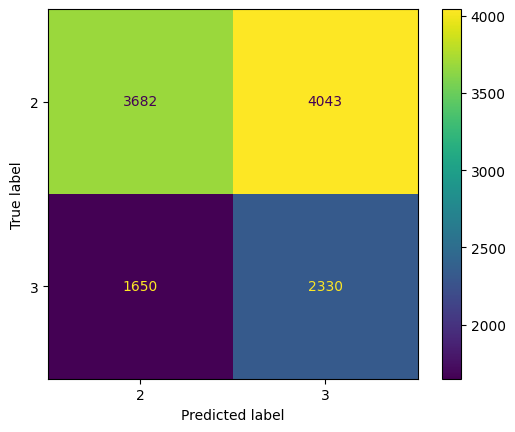

[0.00000000e+00 1.29449838e-04 1.29449838e-04 ... 9.99741100e-01
 9.99741100e-01 1.00000000e+00] [0.00000000e+00 0.00000000e+00 5.02512563e-04 ... 9.99748744e-01
 1.00000000e+00 1.00000000e+00] 0.5482013302759754


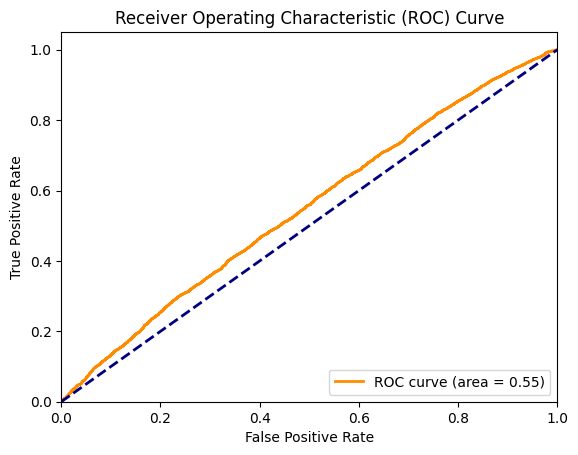

In [94]:
model_df_v3 = new_model_df.drop(columns=['Prize_Inflation', 'right_vs_left_hands', 'Ground_Grass',
                                        'is_final', 'is_semi_or_quarter'], axis=1)

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(model_df_v3, target_variable, test_size=0.2, random_state=222)

log_reg_model = LogisticRegression(class_weight='balanced')
log_reg_model.fit(features_train, target_train)
log_reg_pred = log_reg_model.predict(features_test)
log_reg_accuracy = accuracy_score(target_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

cm = confusion_matrix(target_test, log_reg_pred, labels=log_reg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_model.classes_)
disp.plot()
plt.show()

# Calculate the probabilities for ROC curve
probs = log_reg_model.predict_proba(features_test)[:, 1]

# Calcular a curva de roc e o seu valor
fpr, tpr, thresholds = roc_curve(target_test, probs, pos_label=log_reg_model.classes_[1])
roc_auc = roc_auc_score(target_test, probs)
print(fpr, tpr, roc_auc) #0.56, aumento ligeiro

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 3º modelo de aprendizagem supervisionada (random forest), com balanceamento:

Random Forest Accuracy: 0.6275950448526271


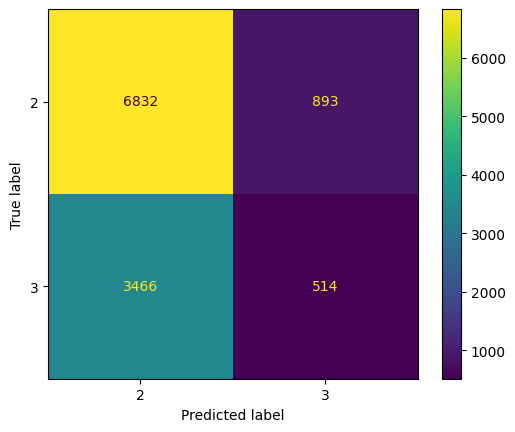

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.58899676e-04
 5.17799353e-04 9.06148867e-04 1.16504854e-03 1.29449838e-03
 1.68284790e-03 2.07119741e-03 2.58899676e-03 2.84789644e-03
 2.84789644e-03 3.75404531e-03 4.78964401e-03 5.43689320e-03
 6.08414239e-03 6.86084142e-03 8.67313916e-03 9.83818770e-03
 9.96763754e-03 1.19093851e-02 1.42394822e-02 1.61812298e-02
 1.61812298e-02 1.90291262e-02 2.27831715e-02 2.29126214e-02
 2.86084142e-02 3.18446602e-02 3.19741100e-02 3.75404531e-02
 4.32362460e-02 4.33656958e-02 4.33656958e-02 4.89320388e-02
 5.70873786e-02 5.70873786e-02 6.38187702e-02 6.38187702e-02
 6.40776699e-02 7.41747573e-02 7.43042071e-02 8.09061489e-02
 8.12944984e-02 9.19093851e-02 9.21682848e-02 1.04595469e-01
 1.04724919e-01 1.15598706e-01 1.15598706e-01 1.29320388e-01
 1.29449838e-01 1.29449838e-01 1.43300971e-01 1.43300971e-01
 1.43430421e-01 1.55469256e-01 1.55598706e-01 1.56116505e-01
 1.72168285e-01 1.72427184e-01 1.88867314e-01 1.88867314e-01
 1.88996764e-01 2.056957

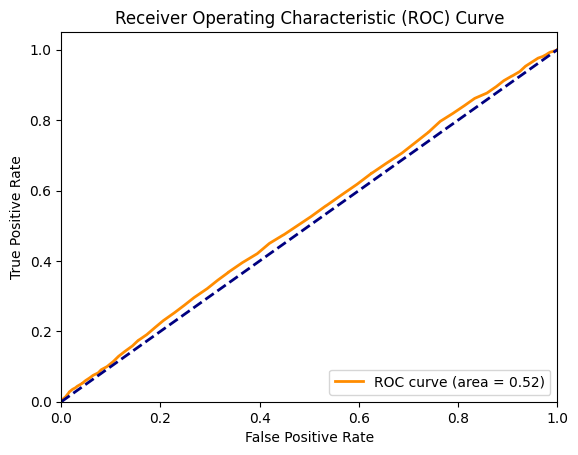

In [95]:
# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(new_model_df, target_variable, test_size=0.2, random_state=222)

rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(features_train, target_train)
rf_pred = rf_model.predict(features_test)
rf_accuracy = accuracy_score(target_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


cm = confusion_matrix(target_test, rf_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()
plt.show()


# Calculate the probabilities for ROC curve
probs = rf_model.predict_proba(features_test)[:, 1]


# Calcular a curva de roc e o seu valor
fpr, tpr, thresholds = roc_curve(target_test, probs, pos_label=rf_model.classes_[1])
roc_auc = roc_auc_score(target_test, probs)
print(fpr, tpr, roc_auc) #0.54, diminuição ligeira


# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Avaliar quais as variáveis do dataframe que podem ser removidas sem prejudicar o modelo (random forest):

In [96]:
# método 1, feature importances built in no modelo, com base no primeiro modelo criado (random forest)
importances = rf_model.feature_importances_

feature_importances = pd.DataFrame({
    'feature': features_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importances)

               feature  importance
2         gamerank_dif    0.320662
6      Prize_Inflation    0.277118
1           height_dif    0.164305
5              age_dif    0.155598
8  right_vs_left_hands    0.020529
0        Duration_Days    0.019562
4   is_semi_or_quarter    0.016109
7       national_pride    0.015791
3             is_final    0.006042
9         Ground_Grass    0.004285


### Modelo de random forest, reduzindo o número de variáveis com base na importância:

Random Forest Accuracy: 0.6190516873131141


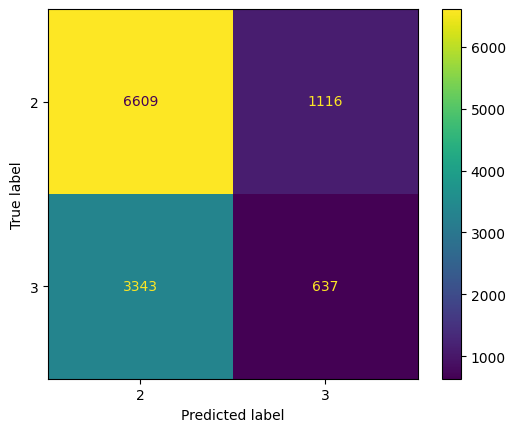

[0.00000000e+00 1.29449838e-04 1.29449838e-04 3.88349515e-04
 3.88349515e-04 6.47249191e-04 7.76699029e-04 1.16504854e-03
 1.55339806e-03 1.68284790e-03 2.20064725e-03 2.84789644e-03
 3.49514563e-03 4.14239482e-03 5.04854369e-03 6.34304207e-03
 6.47249191e-03 7.76699029e-03 8.41423948e-03 8.41423948e-03
 1.12621359e-02 1.30744337e-02 1.46278317e-02 1.47572816e-02
 1.66990291e-02 1.66990291e-02 1.95469256e-02 1.95469256e-02
 2.31715210e-02 2.60194175e-02 3.05501618e-02 3.05501618e-02
 3.55987055e-02 4.06472492e-02 4.06472492e-02 4.51779935e-02
 4.99676375e-02 5.00970874e-02 5.61812298e-02 5.63106796e-02
 6.34304207e-02 6.34304207e-02 6.96440129e-02 6.97734628e-02
 7.87055016e-02 7.87055016e-02 7.88349515e-02 8.90614887e-02
 8.91909385e-02 8.91909385e-02 9.73462783e-02 9.73462783e-02
 9.74757282e-02 1.07831715e-01 1.07961165e-01 1.19223301e-01
 1.19611650e-01 1.33074434e-01 1.33333333e-01 1.33462783e-01
 1.44336570e-01 1.44466019e-01 1.44466019e-01 1.57540453e-01
 1.57540453e-01 1.576699

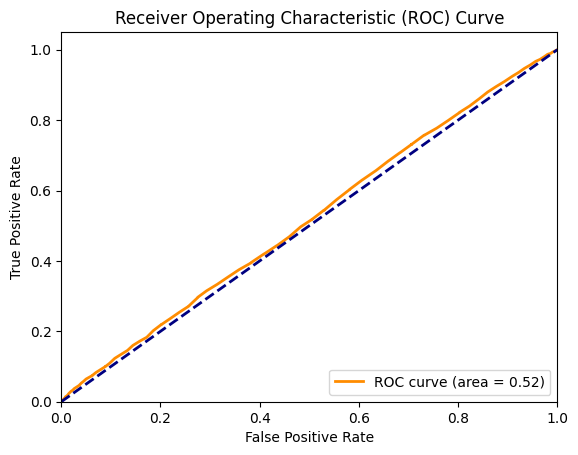

In [98]:
model_df_v4 = new_model_df.drop(columns=['Ground_Grass', 'is_final', 'right_vs_left_hands',
                                         'is_semi_or_quarter', 'national_pride', 'Duration_Days'], axis=1)


# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(model_df_v4, target_variable, test_size=0.2, random_state=222)


rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(features_train, target_train)
rf_pred = rf_model.predict(features_test)
rf_accuracy = accuracy_score(target_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


cm = confusion_matrix(target_test, rf_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()
plt.show()


# Calculate the probabilities for ROC curve
probs = rf_model.predict_proba(features_test)[:, 1]


# Calcular a curva de roc e o seu valor
fpr, tpr, thresholds = roc_curve(target_test, probs, pos_label=rf_model.classes_[1])
roc_auc = roc_auc_score(target_test, probs)
print(fpr, tpr, roc_auc) #0.53/0.54 na mesma


# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()